In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD004.csv")


# Understanding the dataset

In [3]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (61249, 27)


In [4]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  42.0049   0.8400    100.0   445.00   549.68  1343.43   
1       1       2  20.0020   0.7002    100.0   491.19   606.07  1477.61   
2       1       3  42.0038   0.8409    100.0   445.00   548.95  1343.12   
3       1       4  42.0000   0.8400    100.0   445.00   548.70  1341.24   
4       1       5  25.0063   0.6207     60.0   462.54   536.10  1255.23   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1112.93     3.91  ...   2387.99   8074.83    9.3335      0.02       330   
1  1237.50     9.35  ...   2387.73   8046.13    9.1913      0.02       361   
2  1117.05     3.91  ...   2387.97   8066.62    9.4007      0.02       329   
3  1118.03     3.91  ...   2388.02   8076.05    9.3369      0.02       328   
4  1033.59     7.05  ...   2028.08   7865.80   10.8366      0.02       305   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [5]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [6]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            61249 non-null  int64  
 1   Cycles            61249 non-null  int64  
 2   Sensor1           61249 non-null  float64
 3   Sensor2           61249 non-null  float64
 4   Sensor3           61249 non-null  float64
 5   Sensor4           61249 non-null  float64
 6   Sensor5           61249 non-null  float64
 7   Sensor6           61249 non-null  float64
 8   Sensor7           61249 non-null  float64
 9   Sensor8           61249 non-null  float64
 10  Sensor9           61249 non-null  float64
 11  Sensor10          61249 non-null  float64
 12  Sensor11          61249 non-null  float64
 13  Sensor12          61249 non-null  float64
 14  Sensor13          61249 non-null  float64
 15  Sensor14          61249 non-null  float64
 16  Sensor15          61249 non-null  float6

In [7]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2       Sensor3  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181    134.311417     23.999823      0.571347     94.031576   
std       71.995350     89.783389     14.780722      0.310703     14.251954   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       60.000000     62.000000     10.004600      0.250700    100.000000   
50%      126.000000    123.000000     25.001400      0.700000    100.000000   
75%      185.000000    191.000000     41.998100      0.840000    100.000000   
max      249.000000    543.000000     42.008000      0.842000    100.000000   

            Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.

# Data visualization

In [8]:
# Remove constant sensors
constant_sensors = [col for col in data.columns[2:-1] if data[col].nunique() == 1]
print(f"Constant sensors: {constant_sensors}")
data = data.drop(columns=constant_sensors)


Constant sensors: []


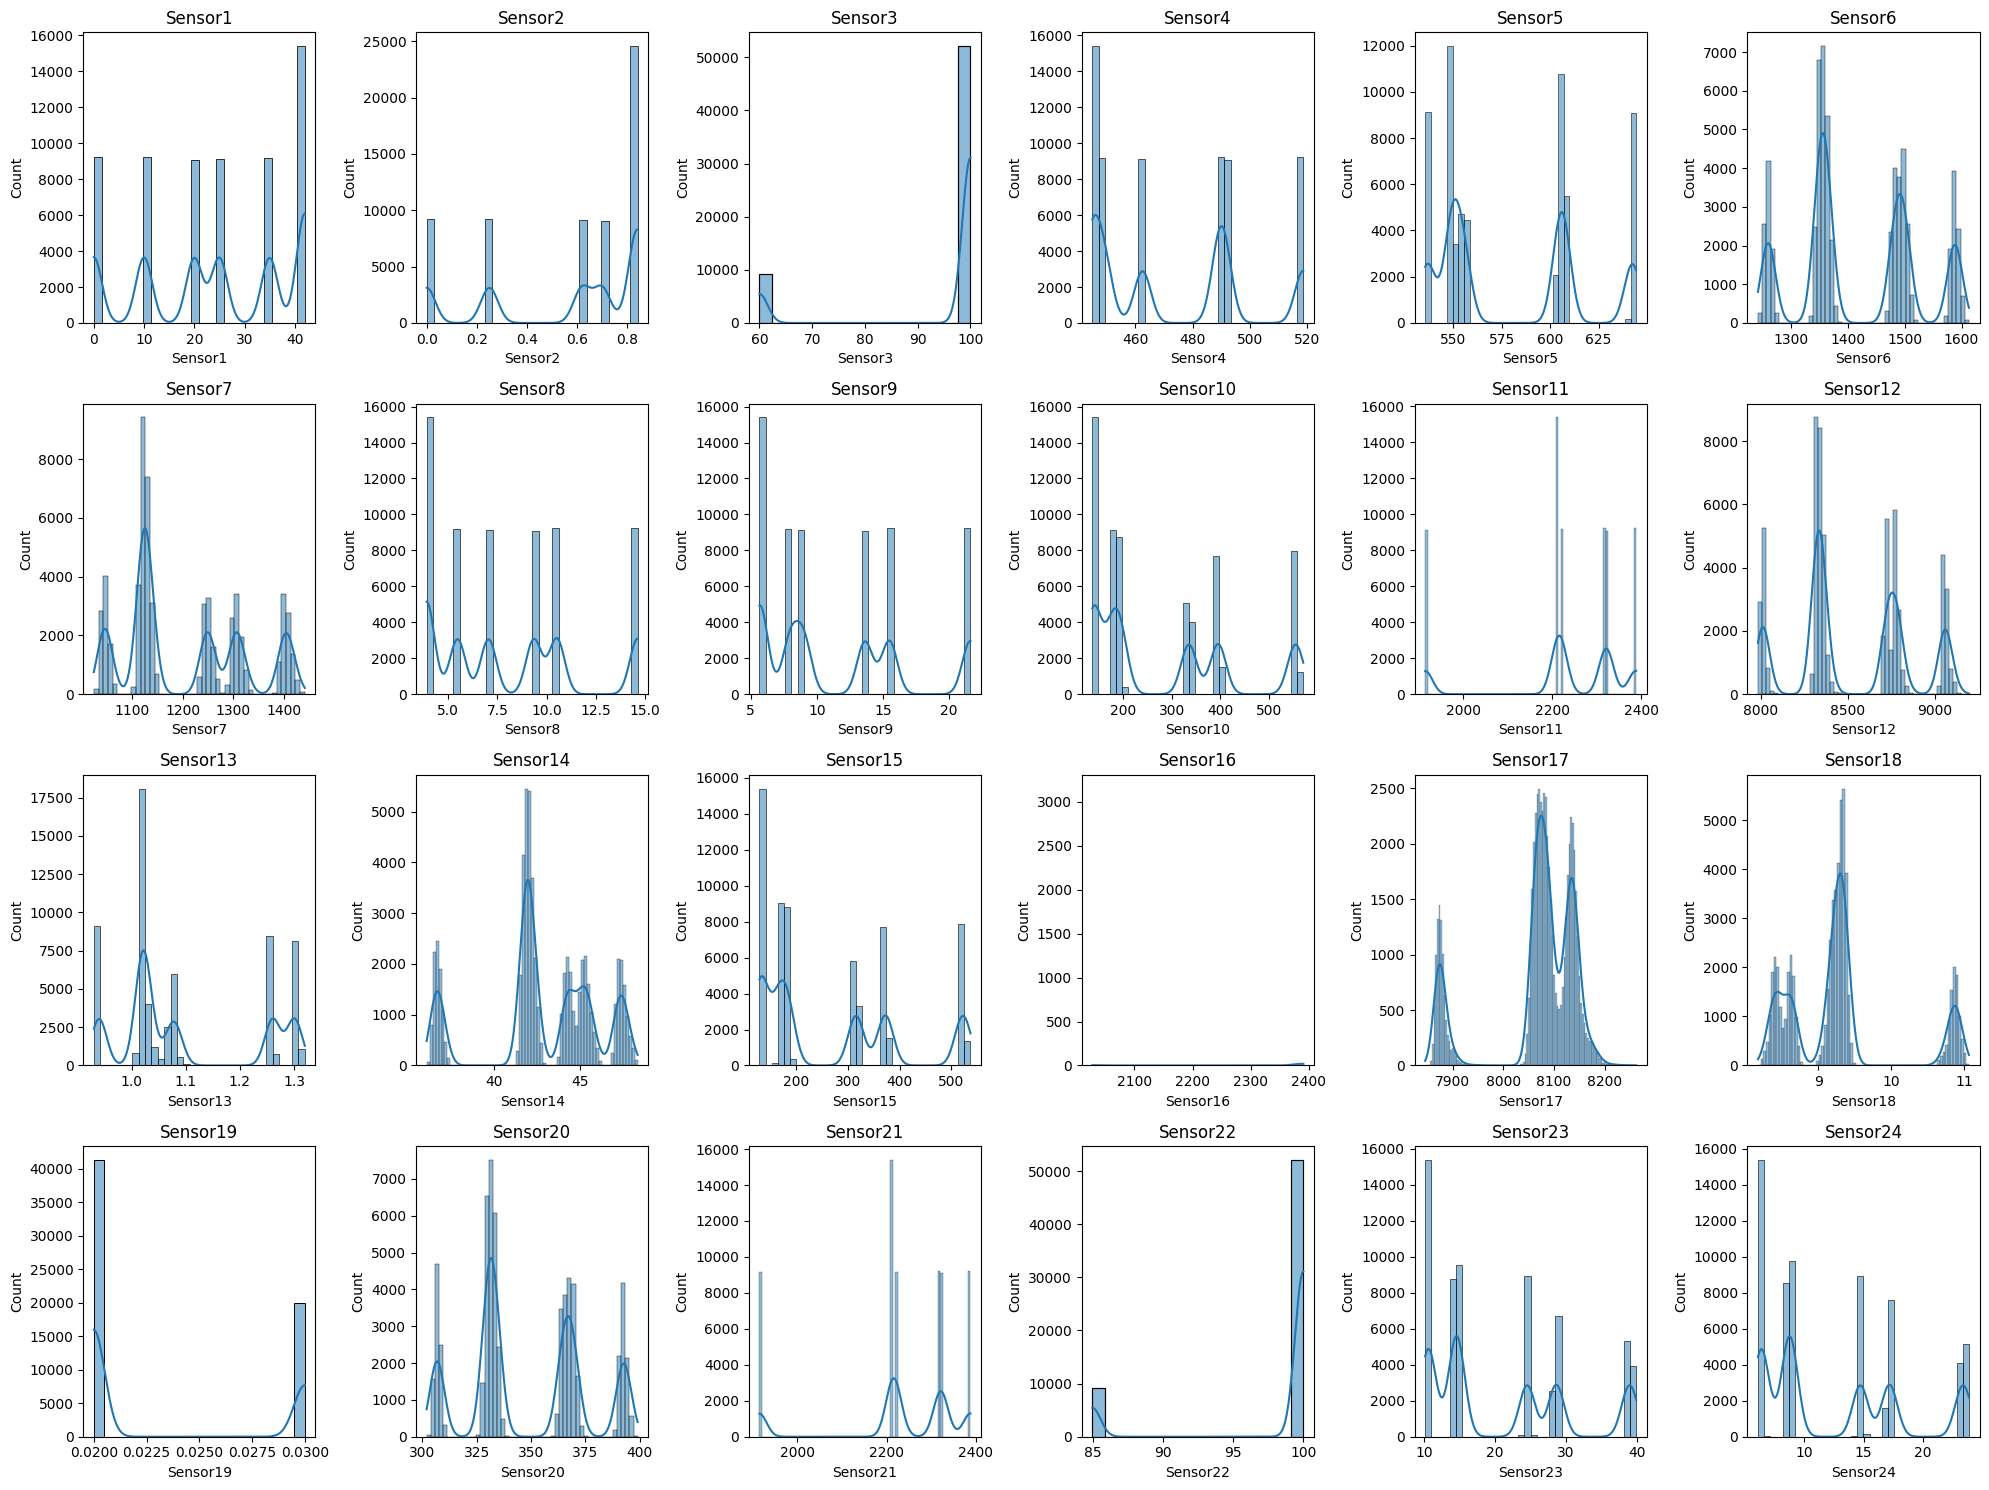

In [9]:
# Histograms for sensors
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[2:-1]):
    plt.subplot(4, 6, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

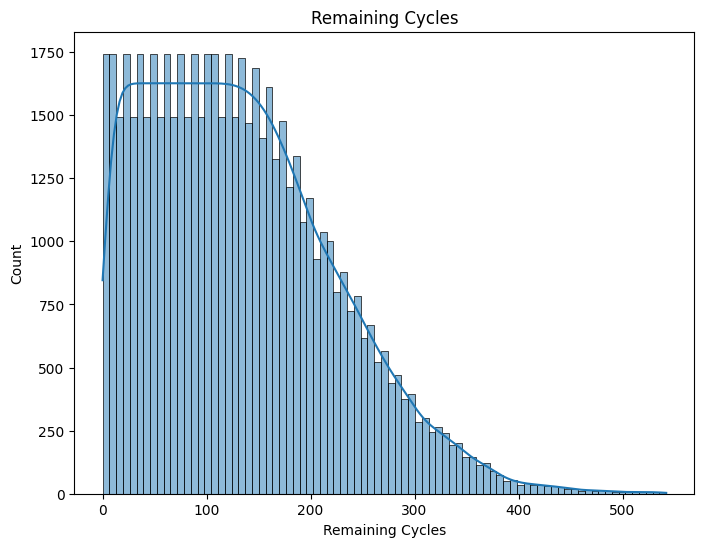

In [10]:
# Histogram for Remainig Cycles
plt.figure(figsize=(8, 6))
sns.histplot(data['Remaining Cycles'], kde=True)
plt.title('Remaining Cycles')
plt.show()

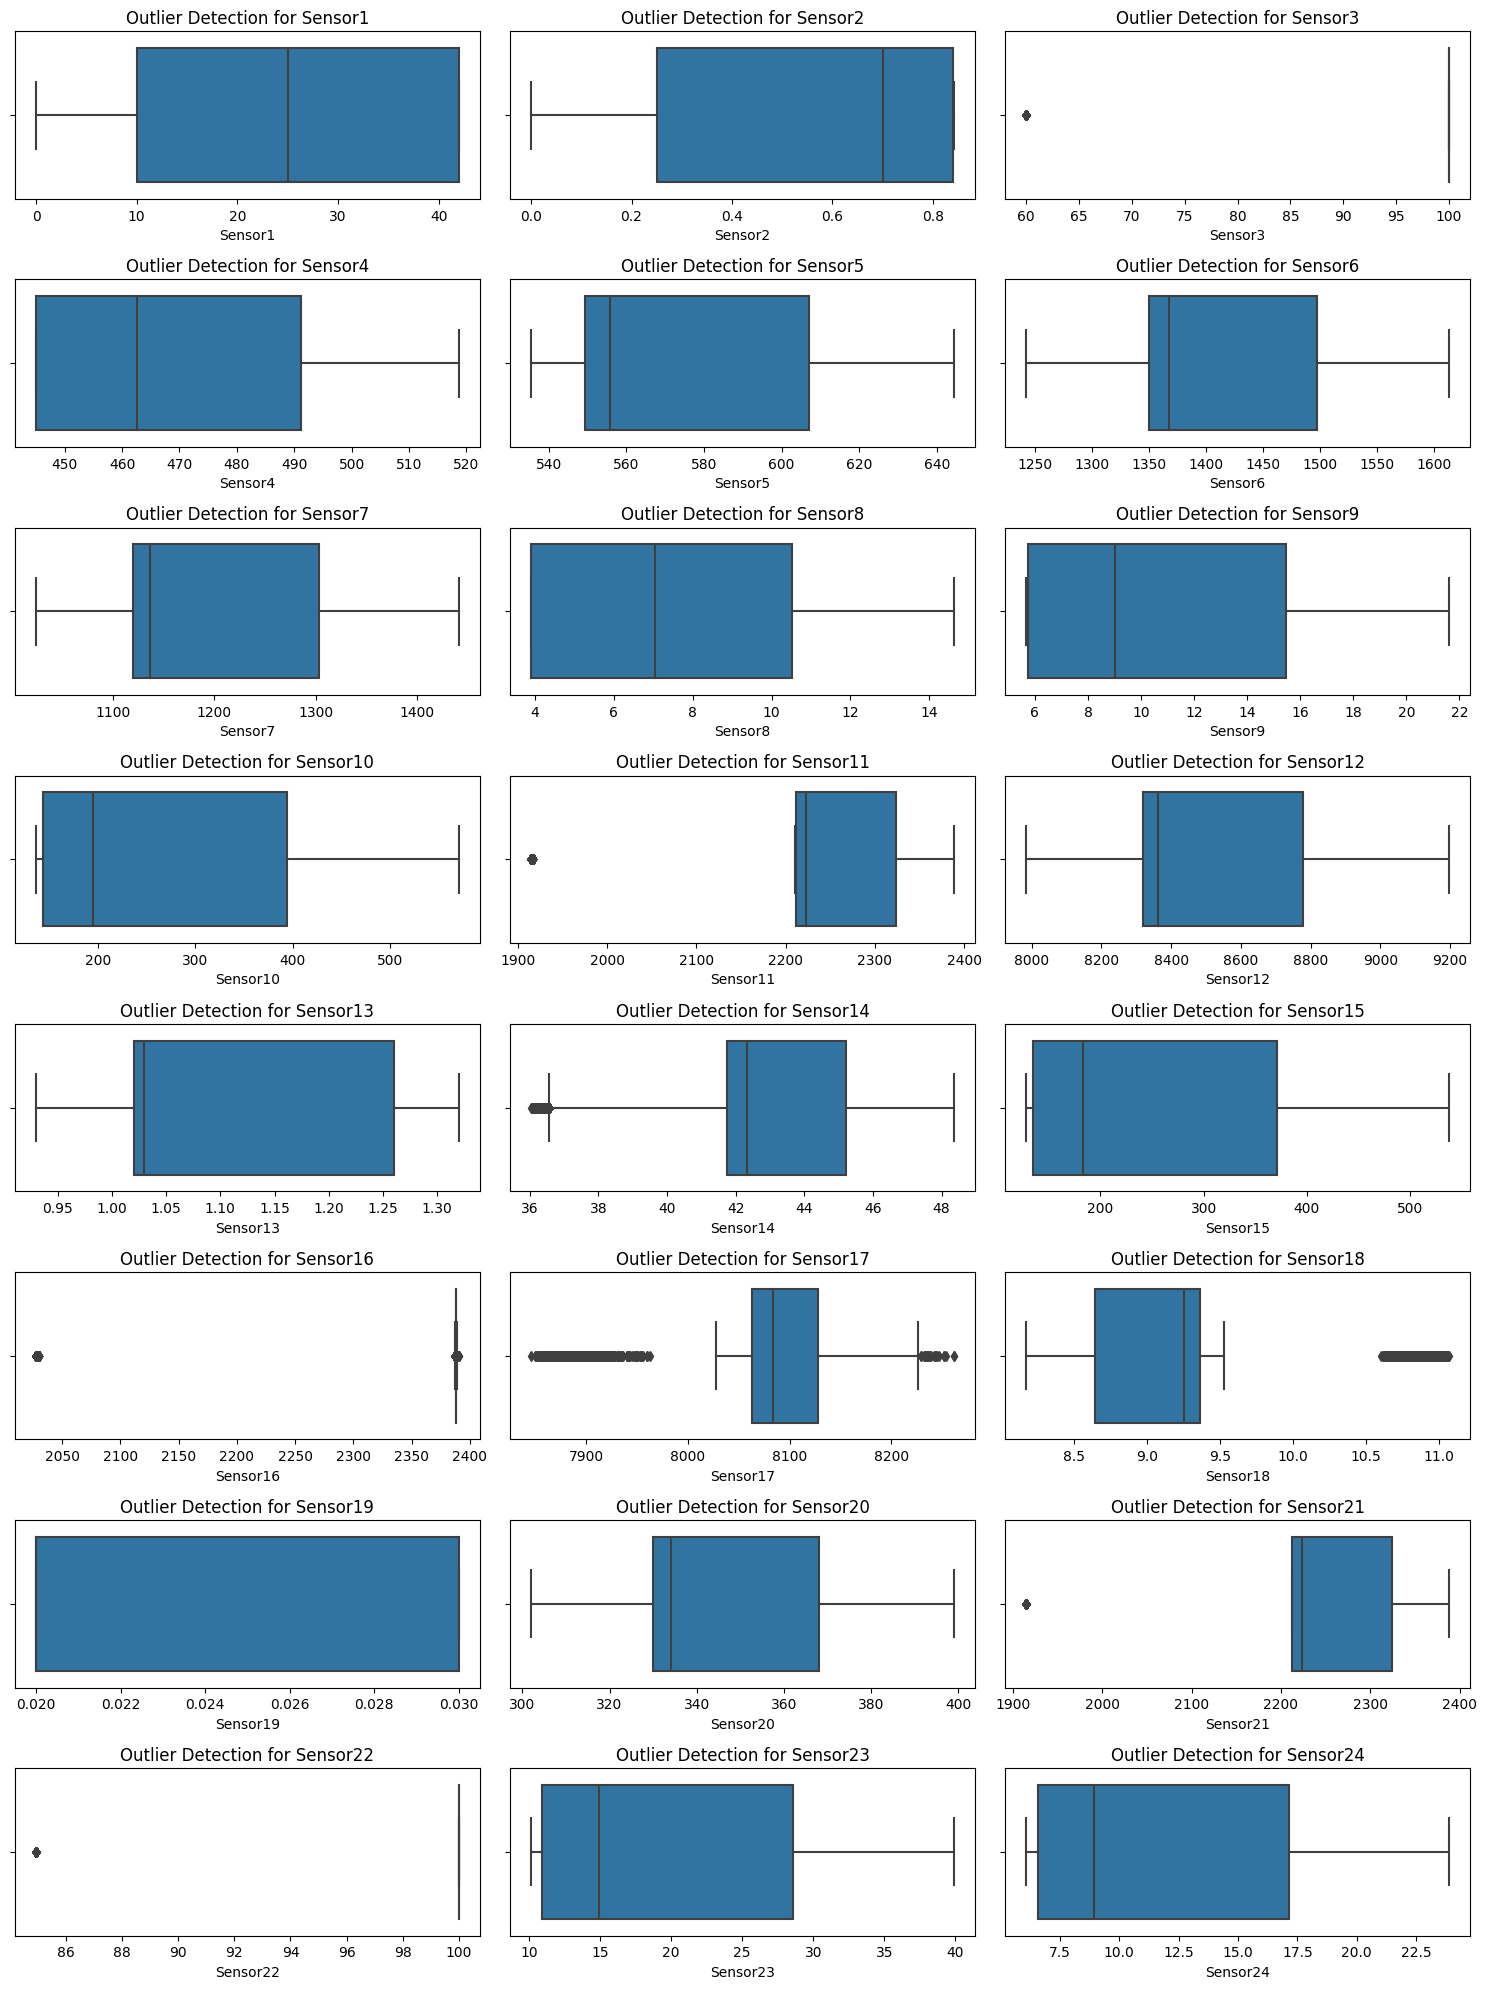

In [12]:
# Boxplots for sensors
fig, axs = plt.subplots(8, 3, figsize=(15, 20))
axs = axs.ravel()
for i, col in enumerate(data.columns[2:-1]):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")
plt.tight_layout()
plt.show()

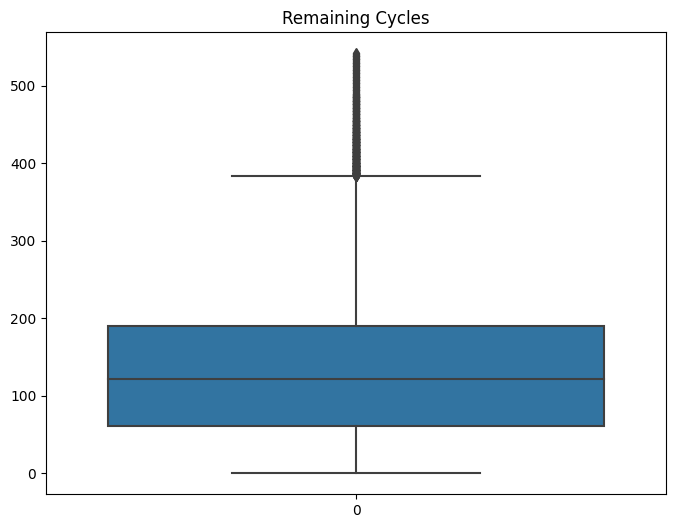

In [13]:
# Boxplot for Remaining Cycles
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Remaining Cycles'])
plt.title('Remaining Cycles')
plt.show()

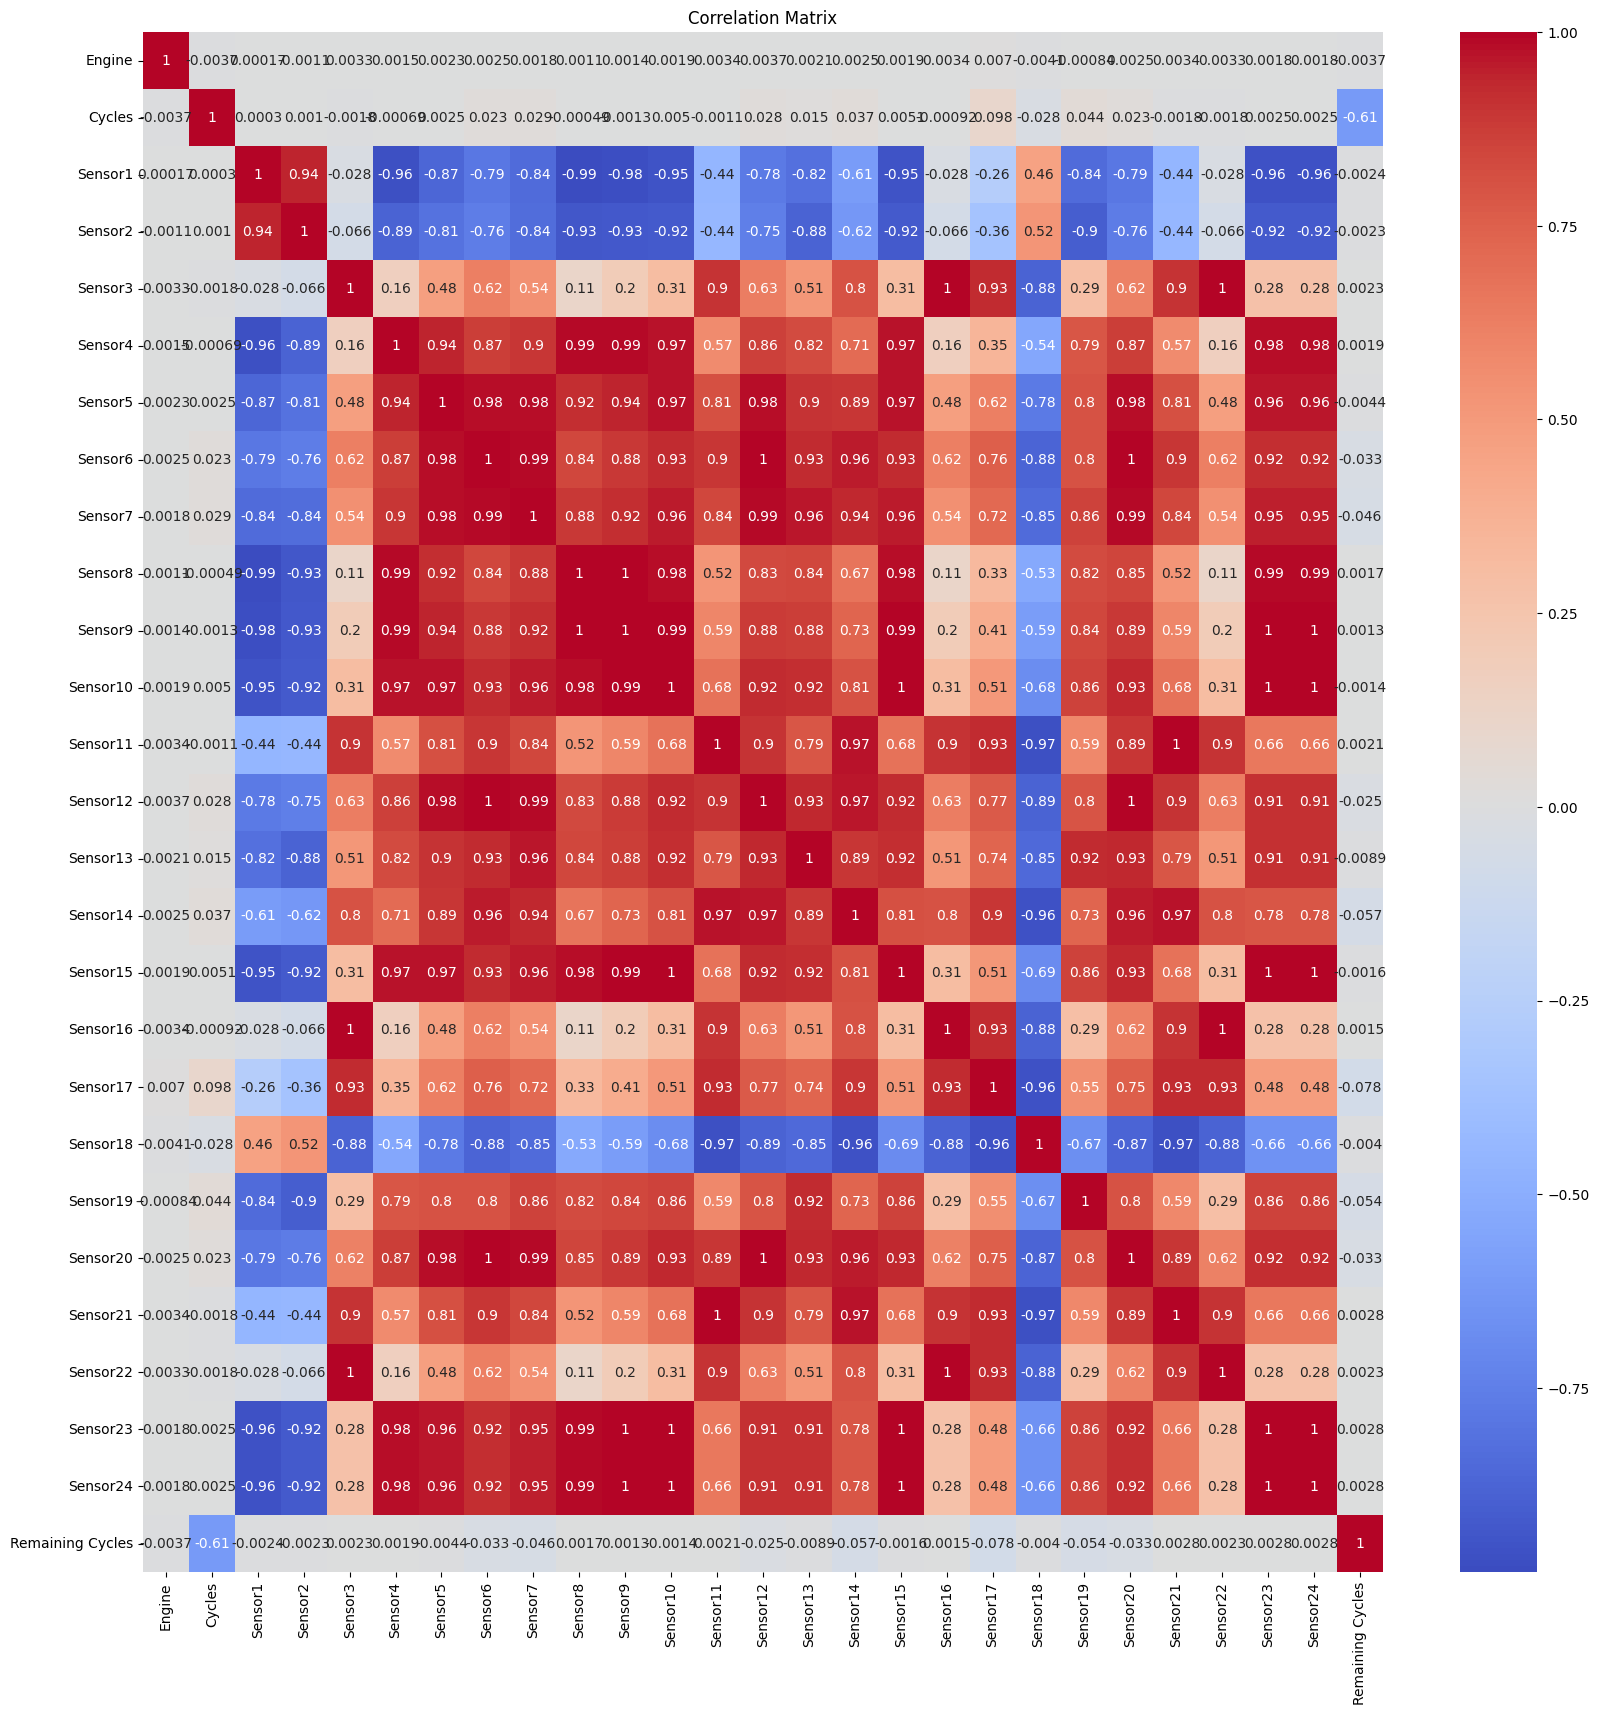

In [14]:
# Correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

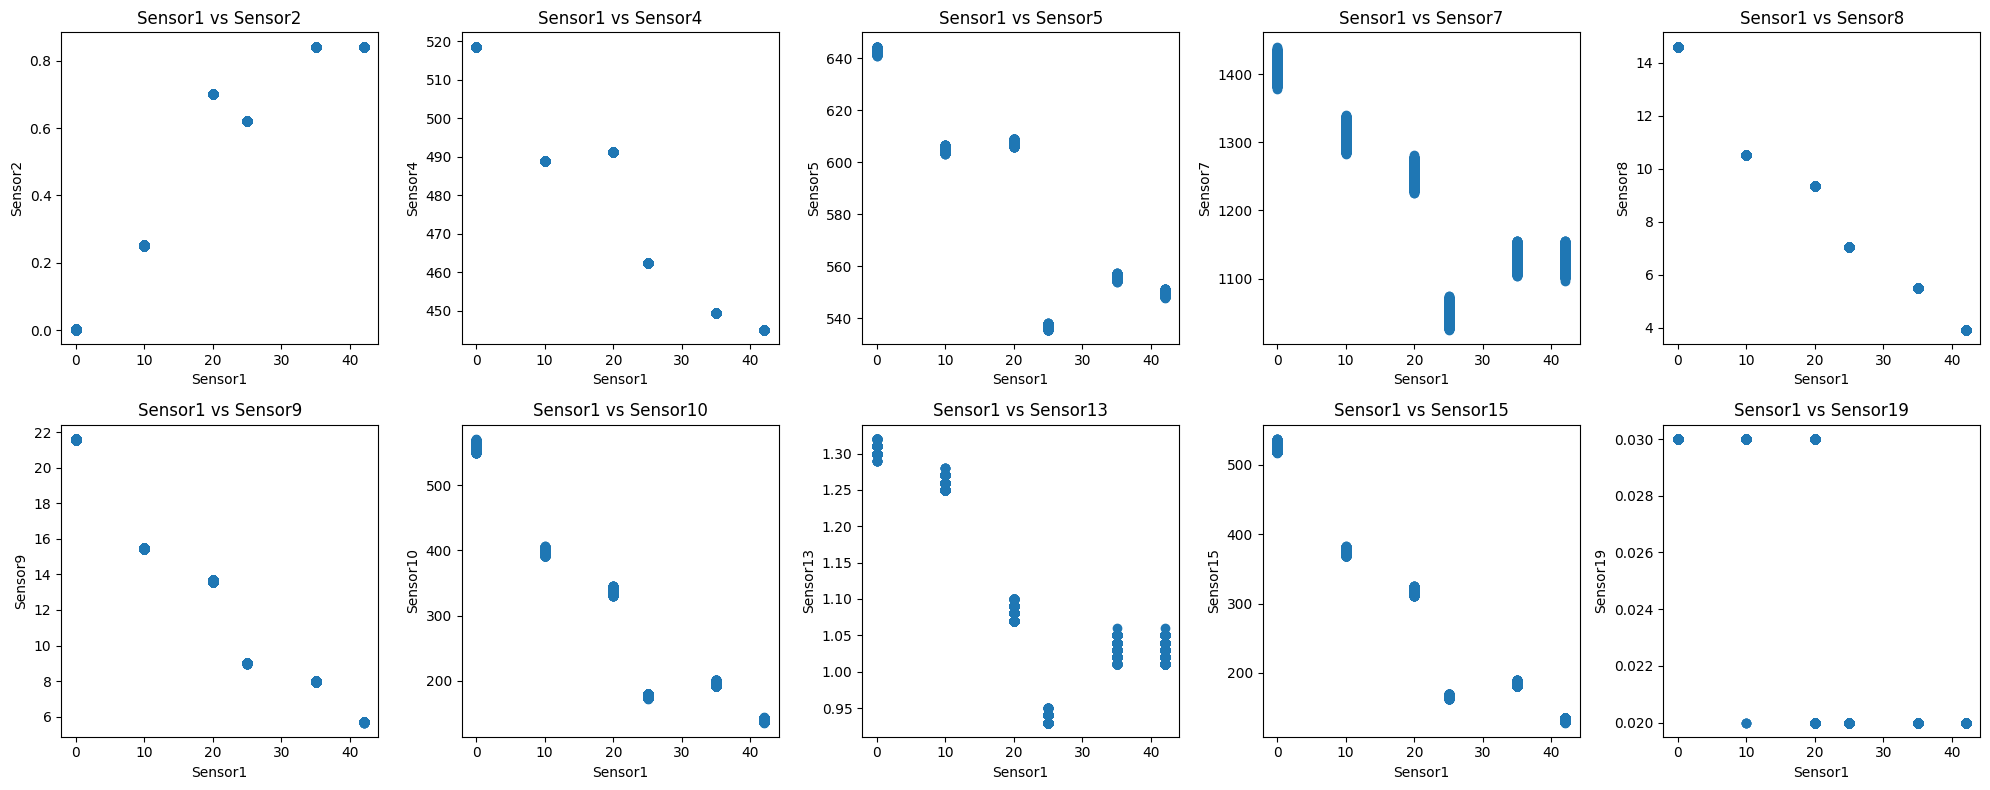

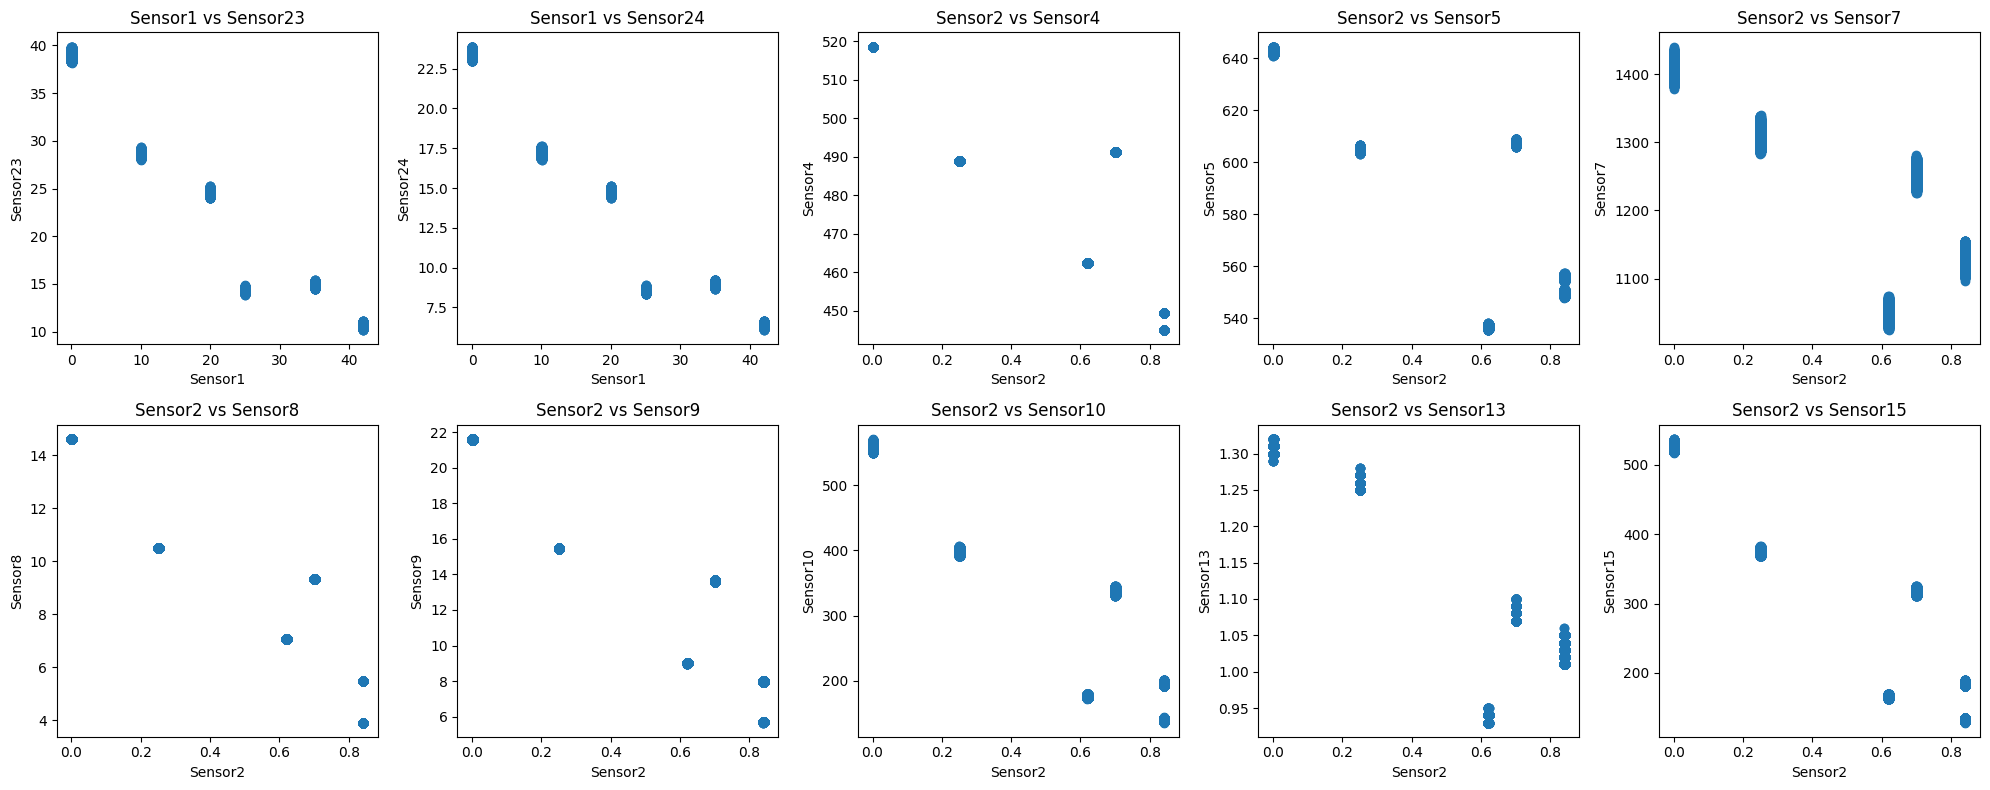

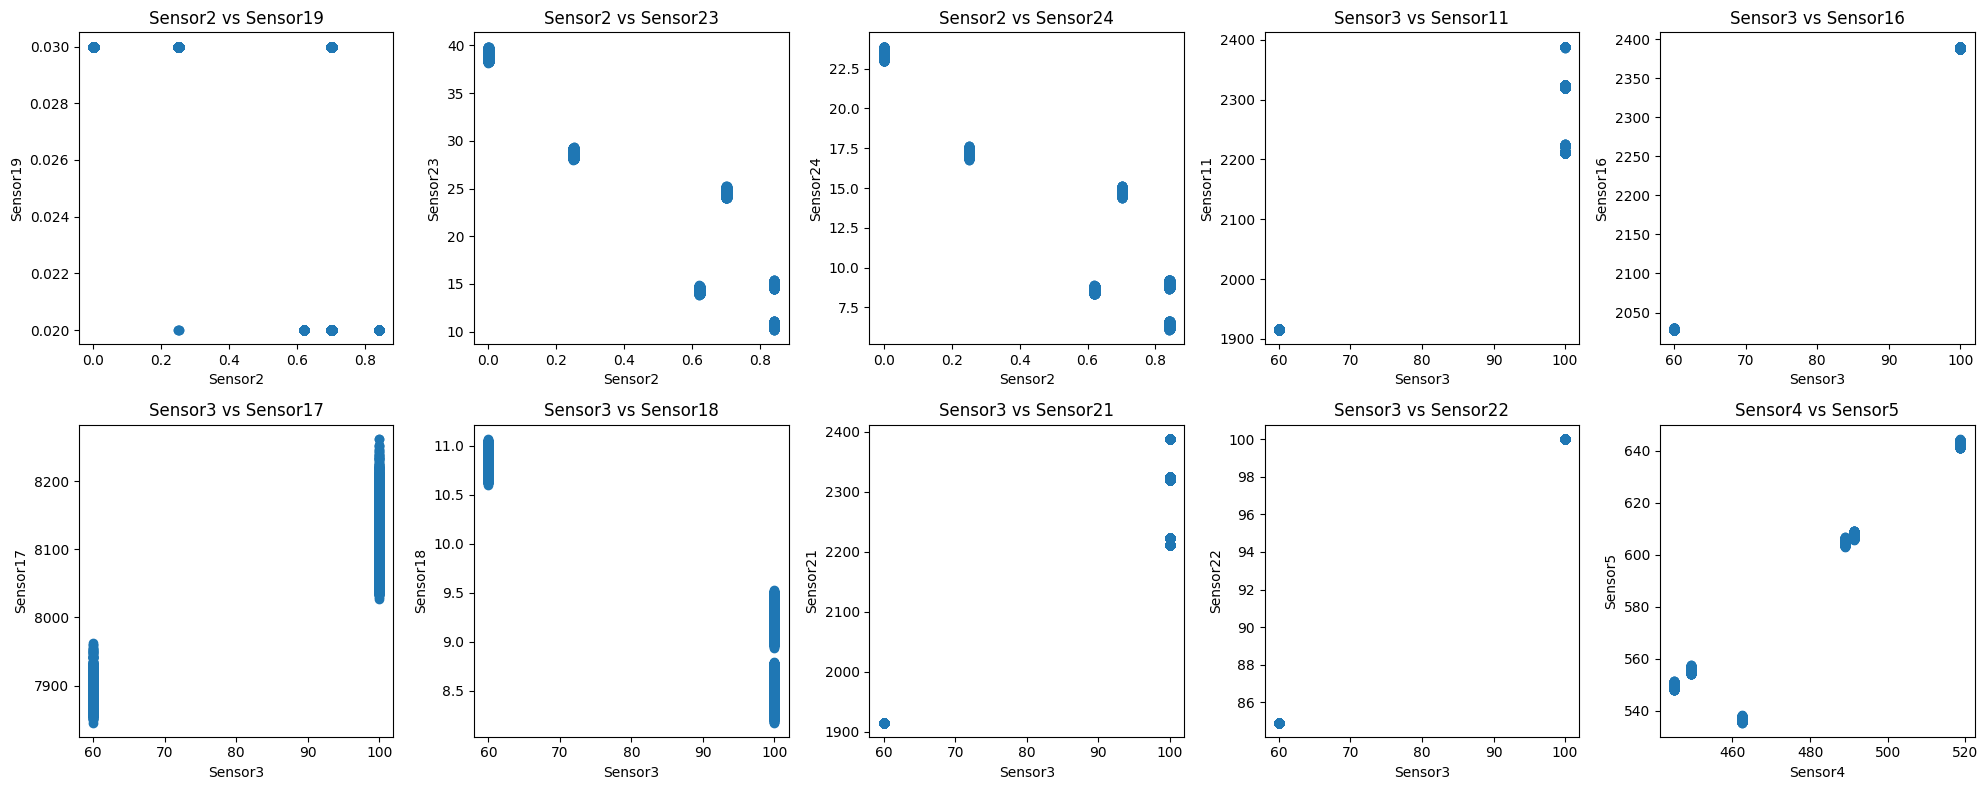

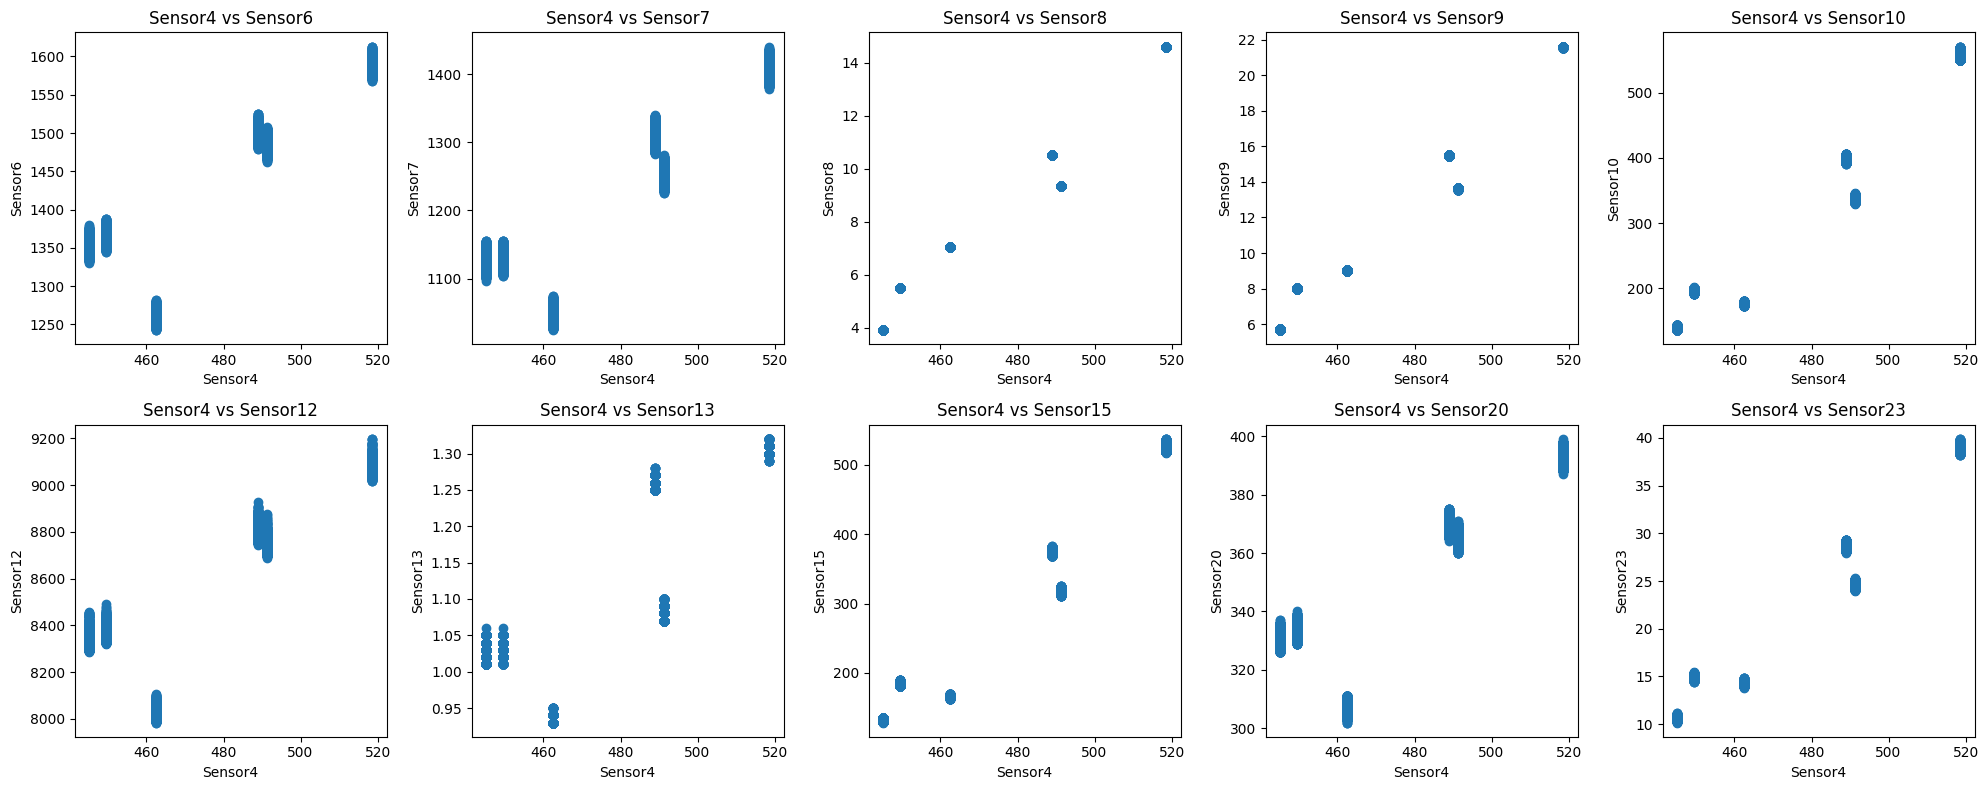

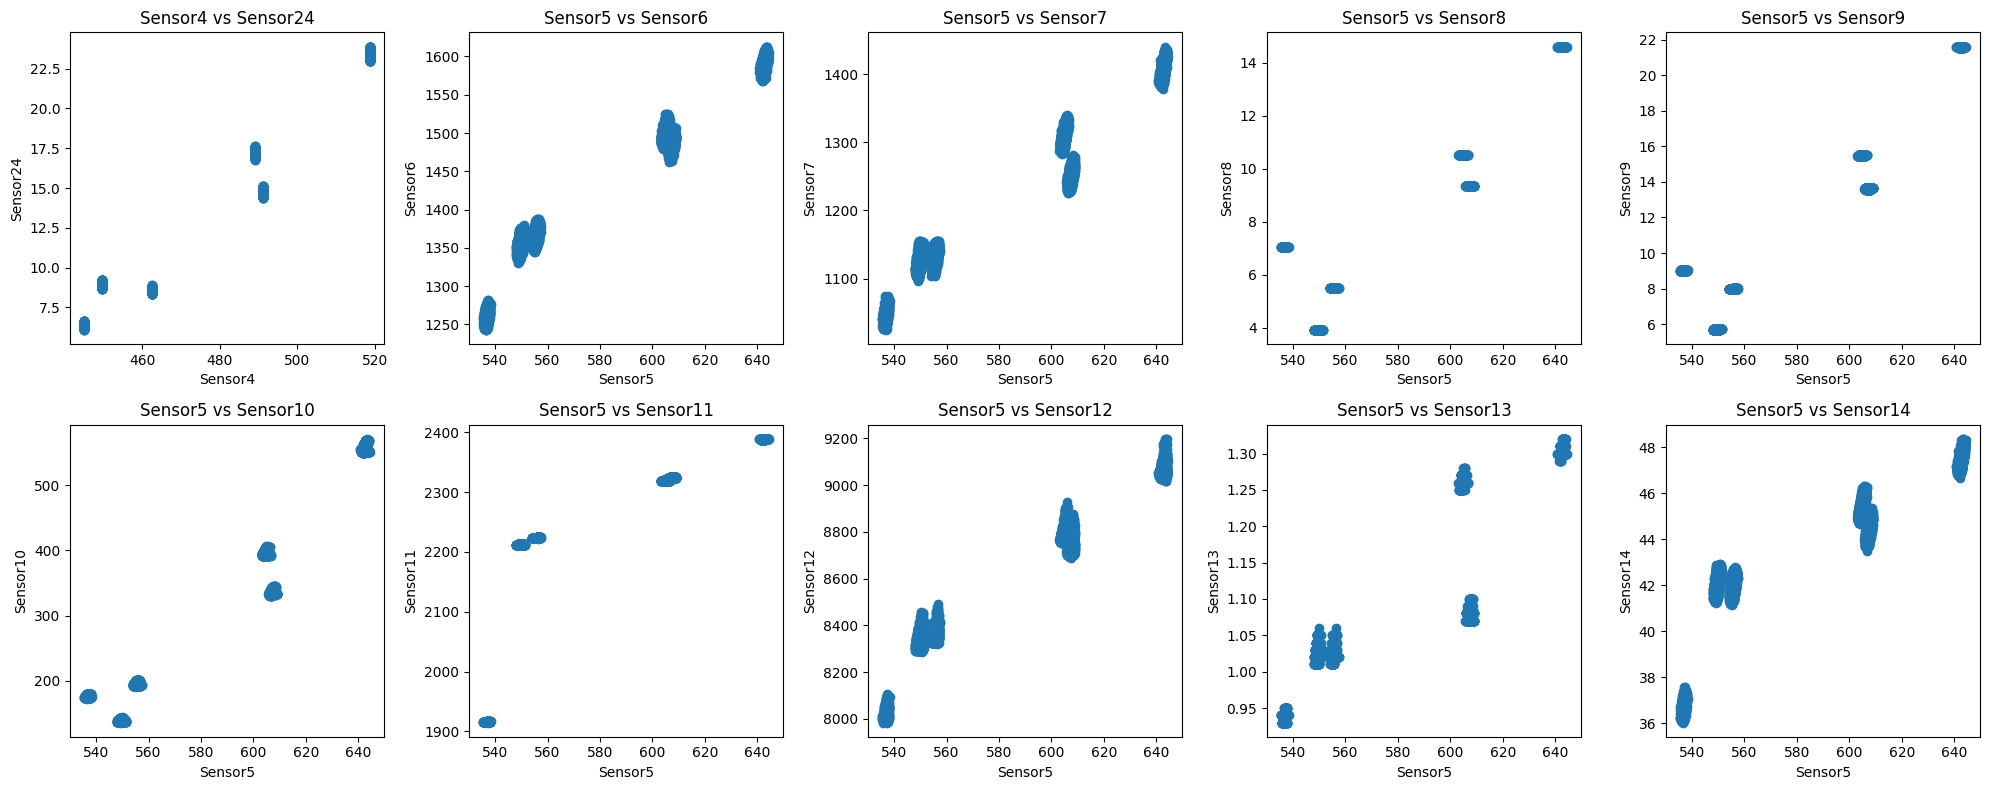

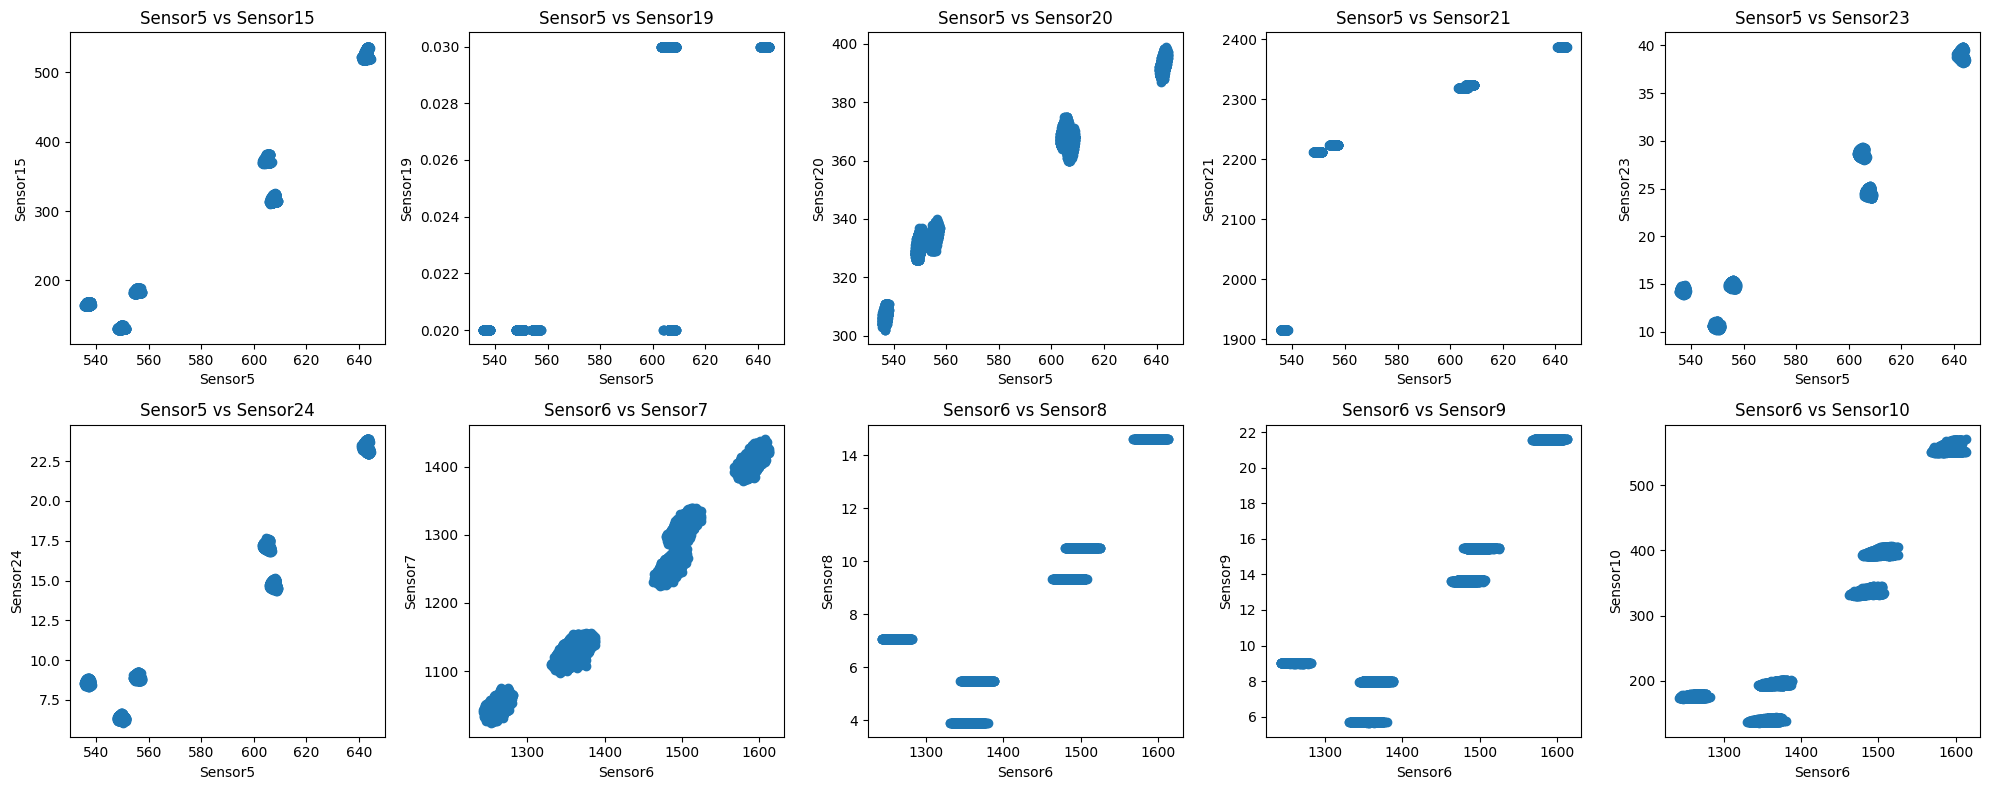

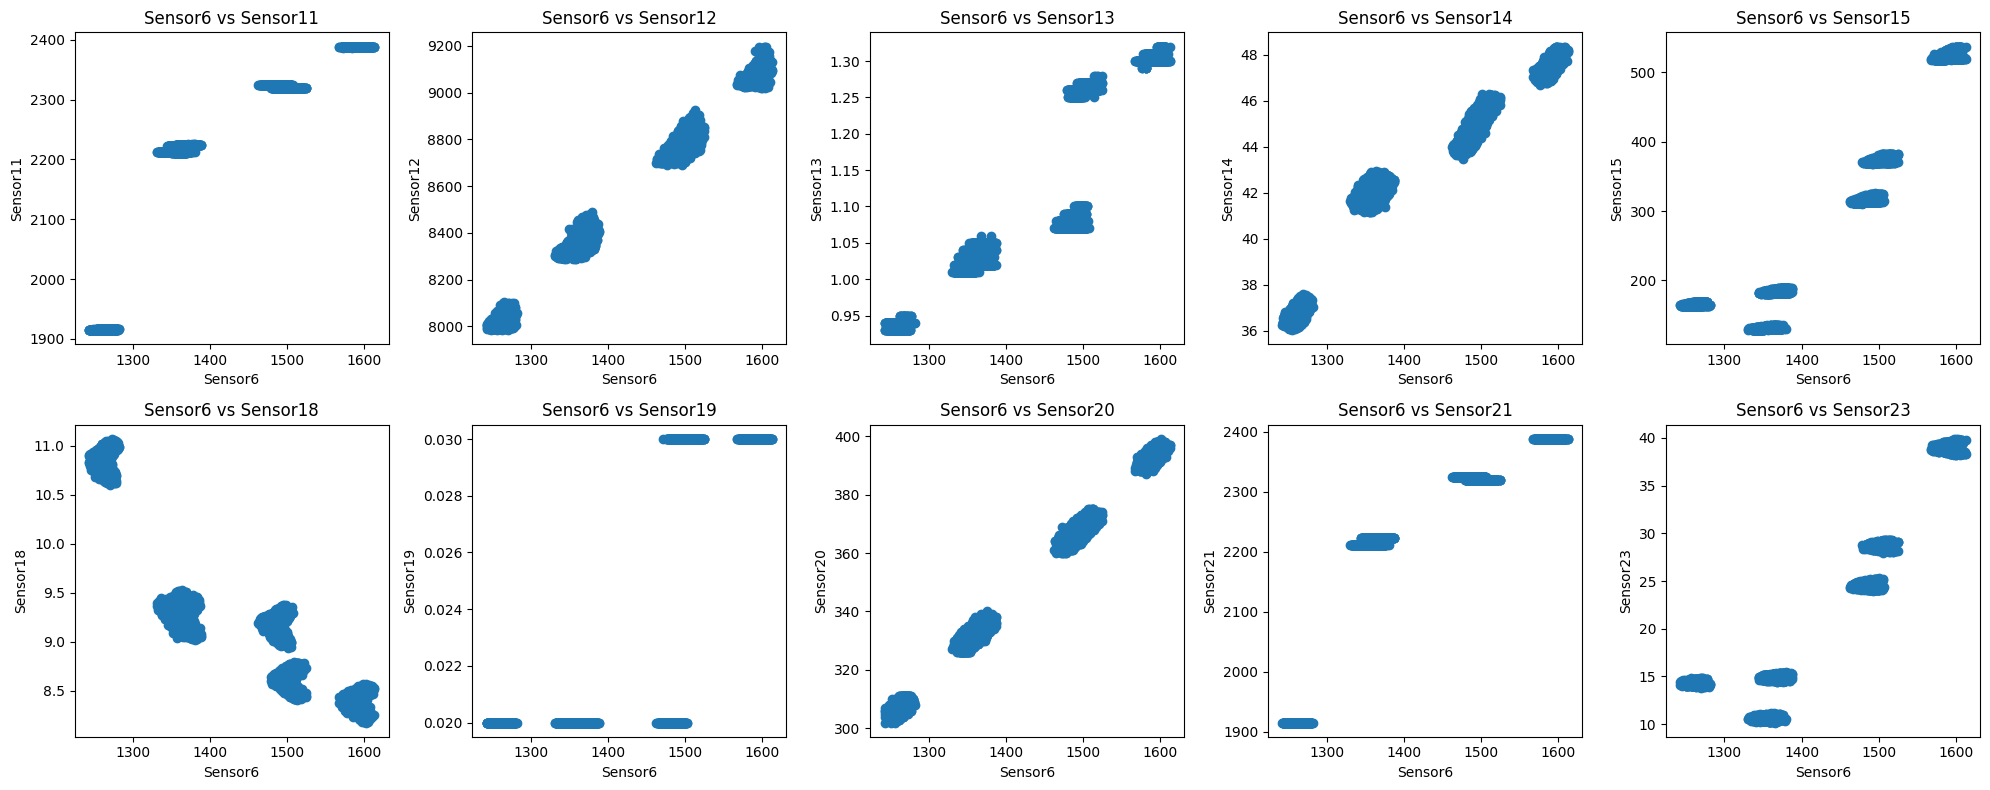

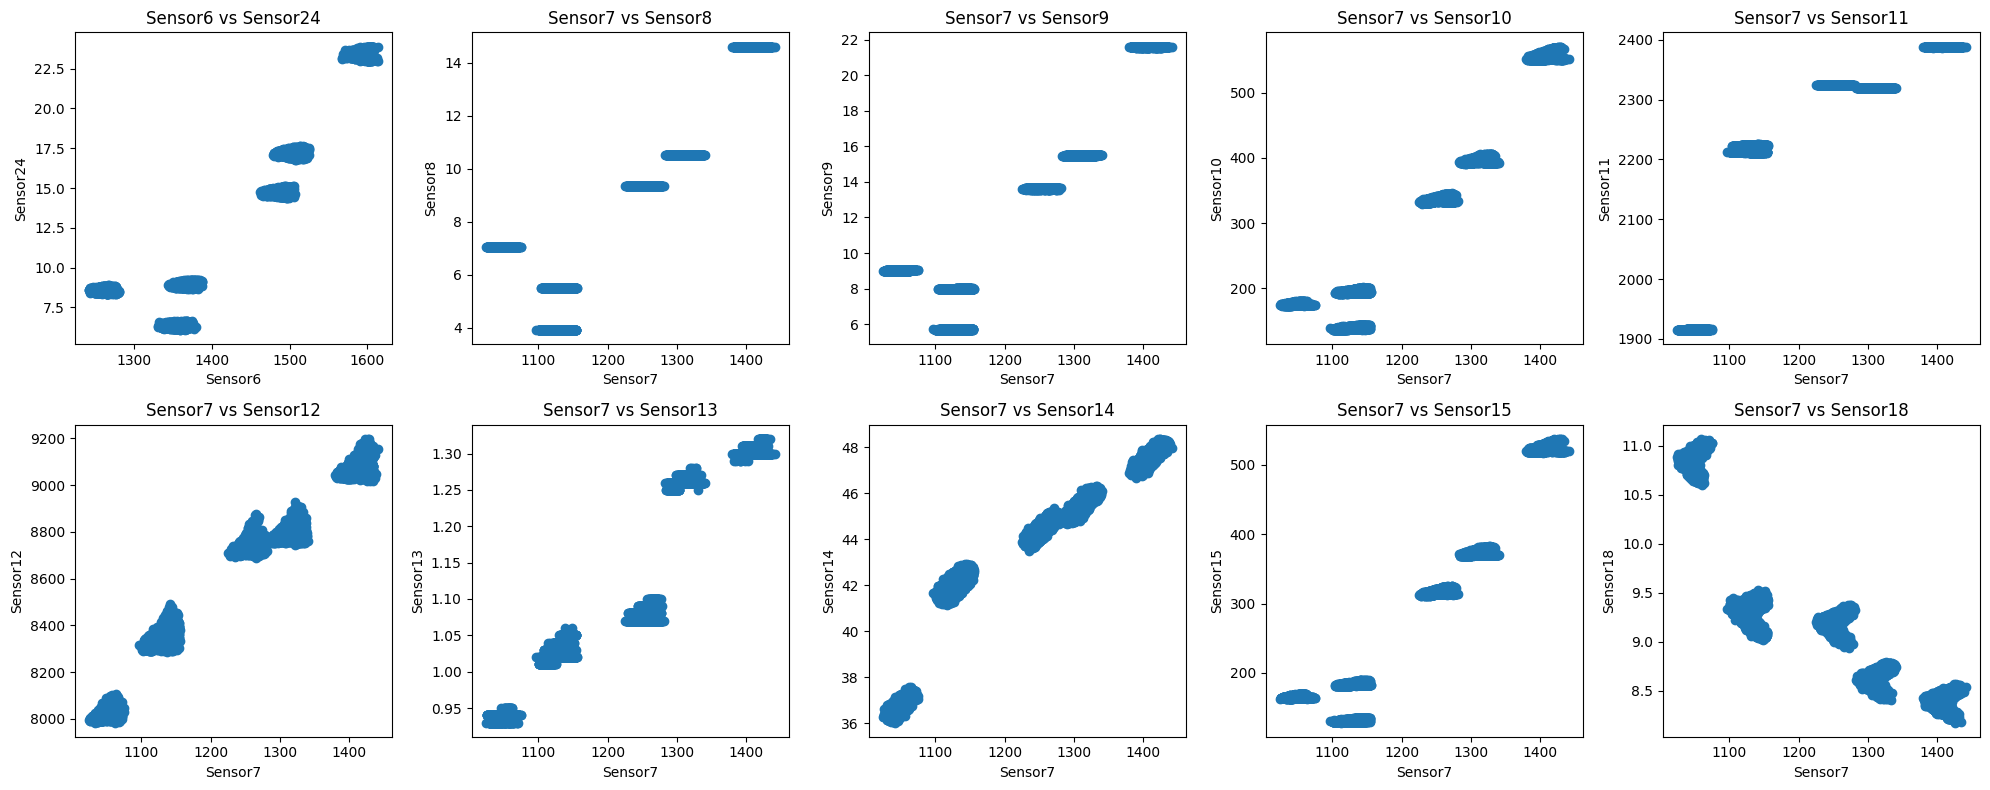

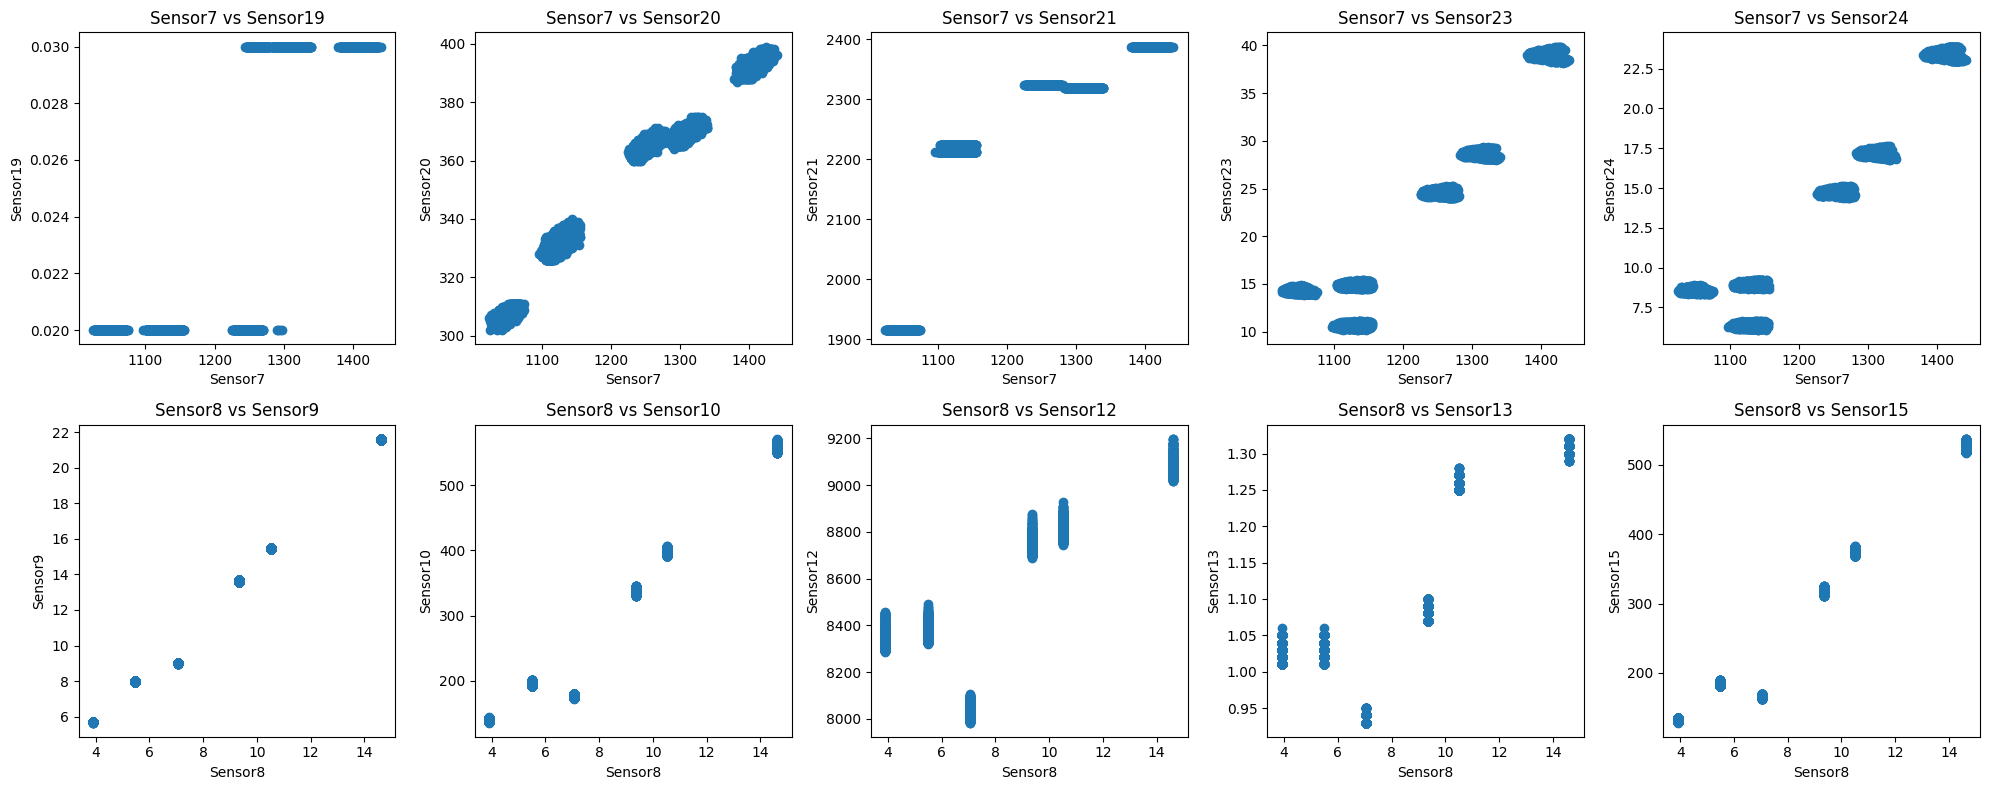

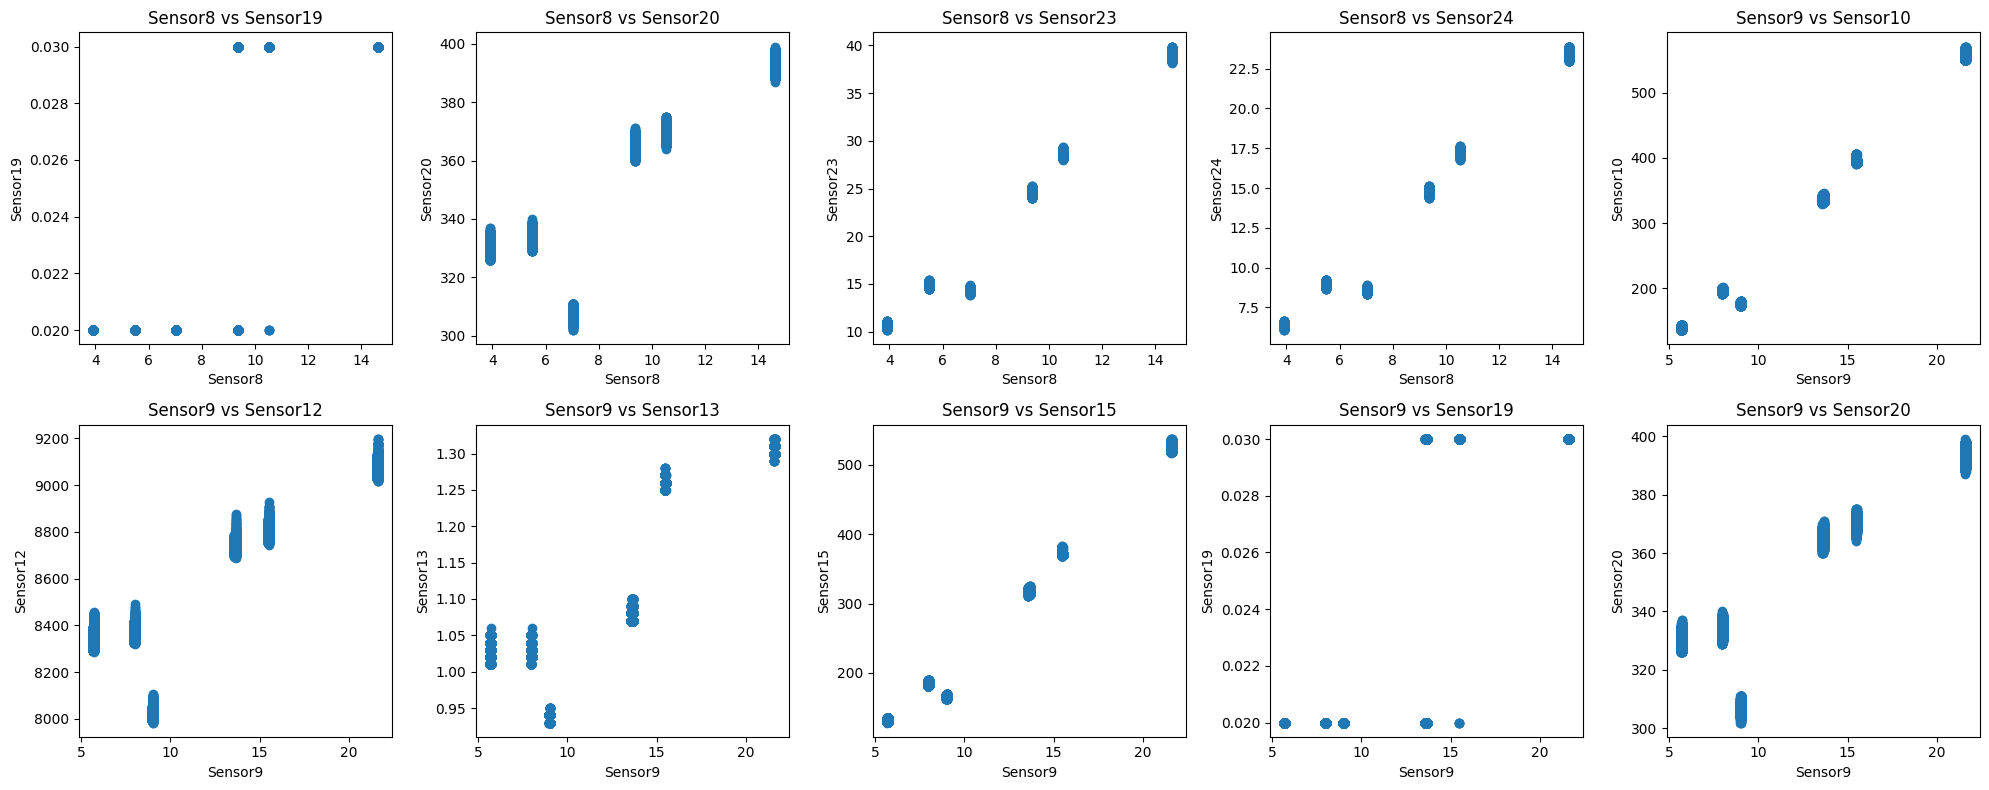

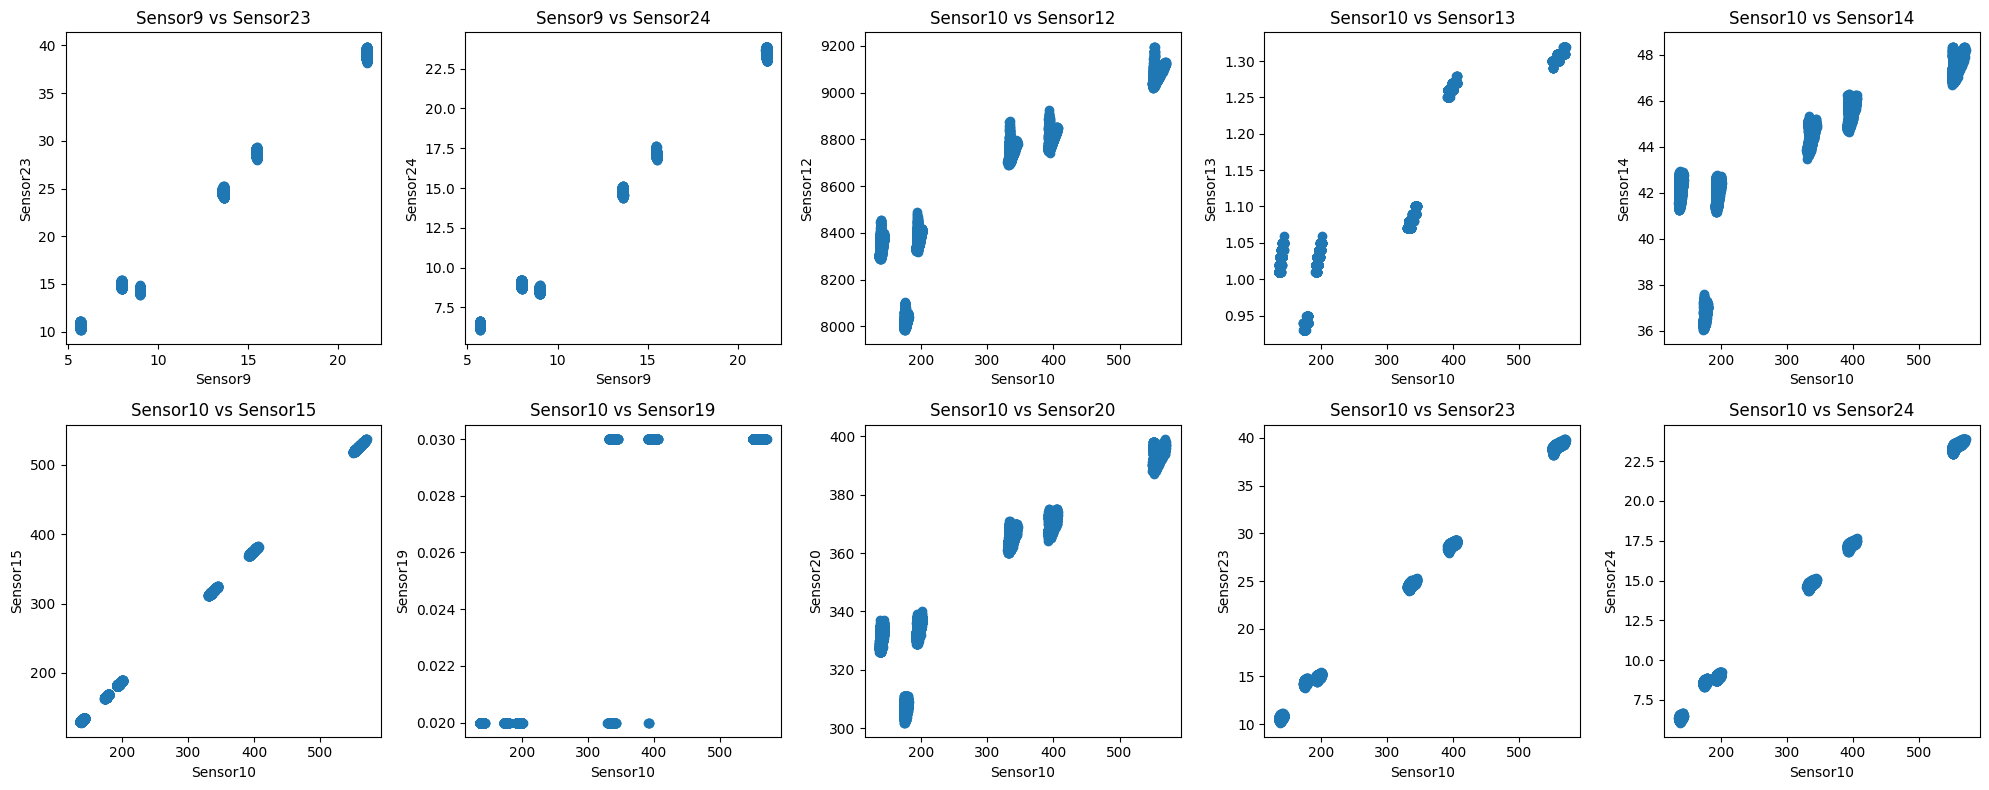

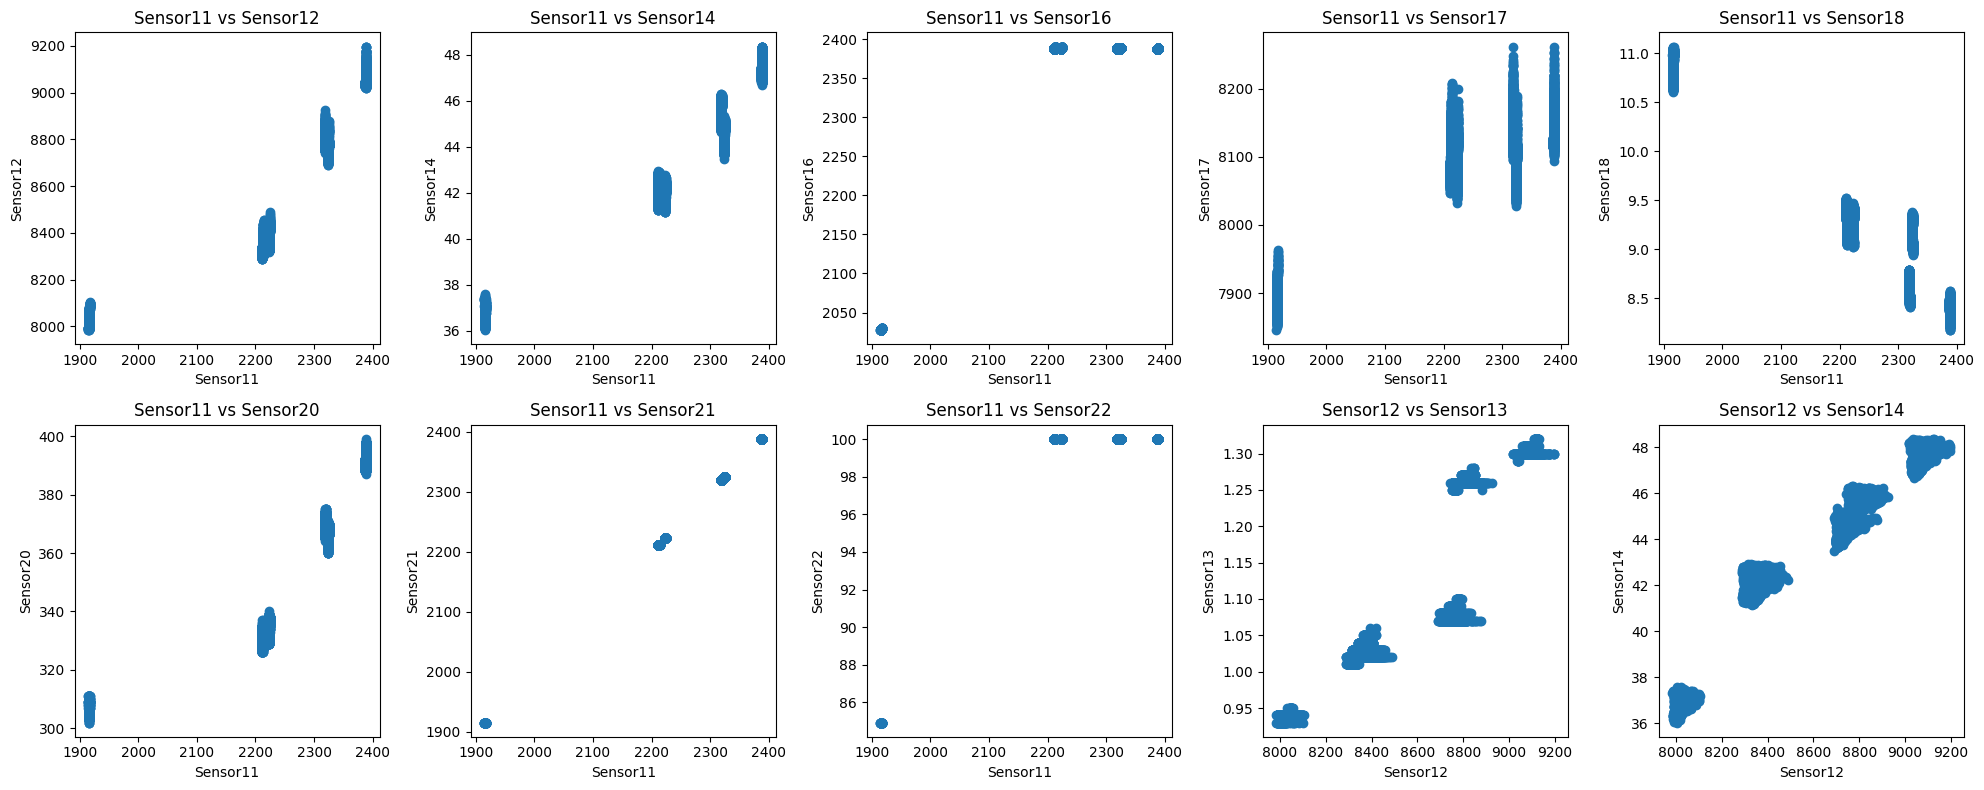

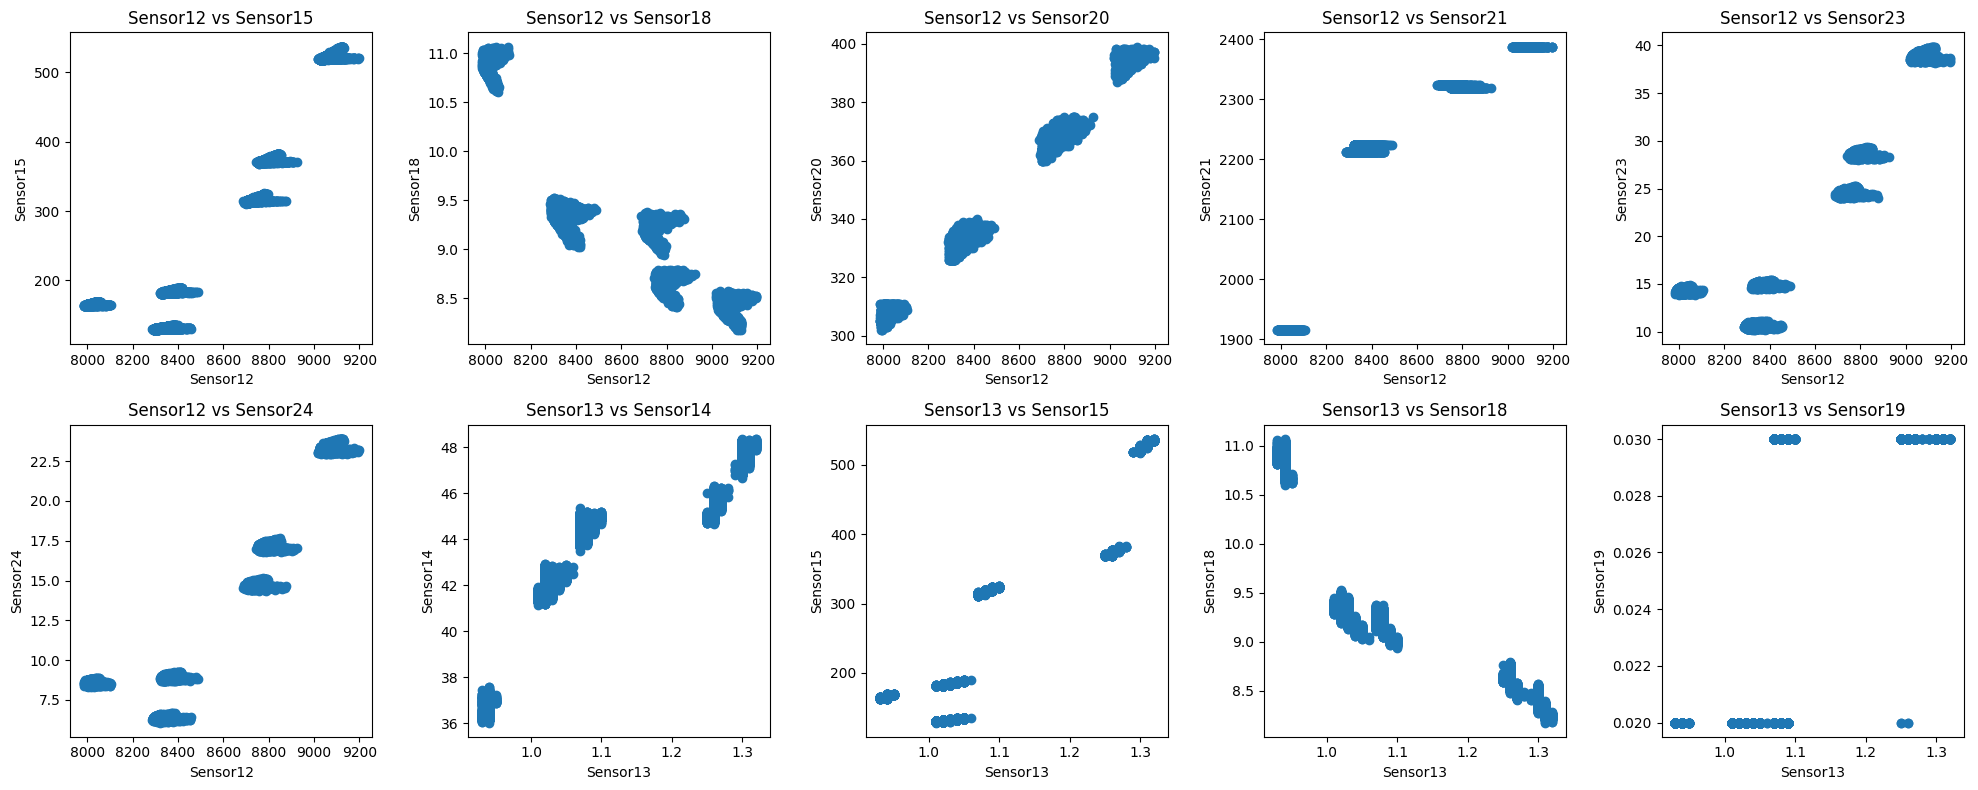

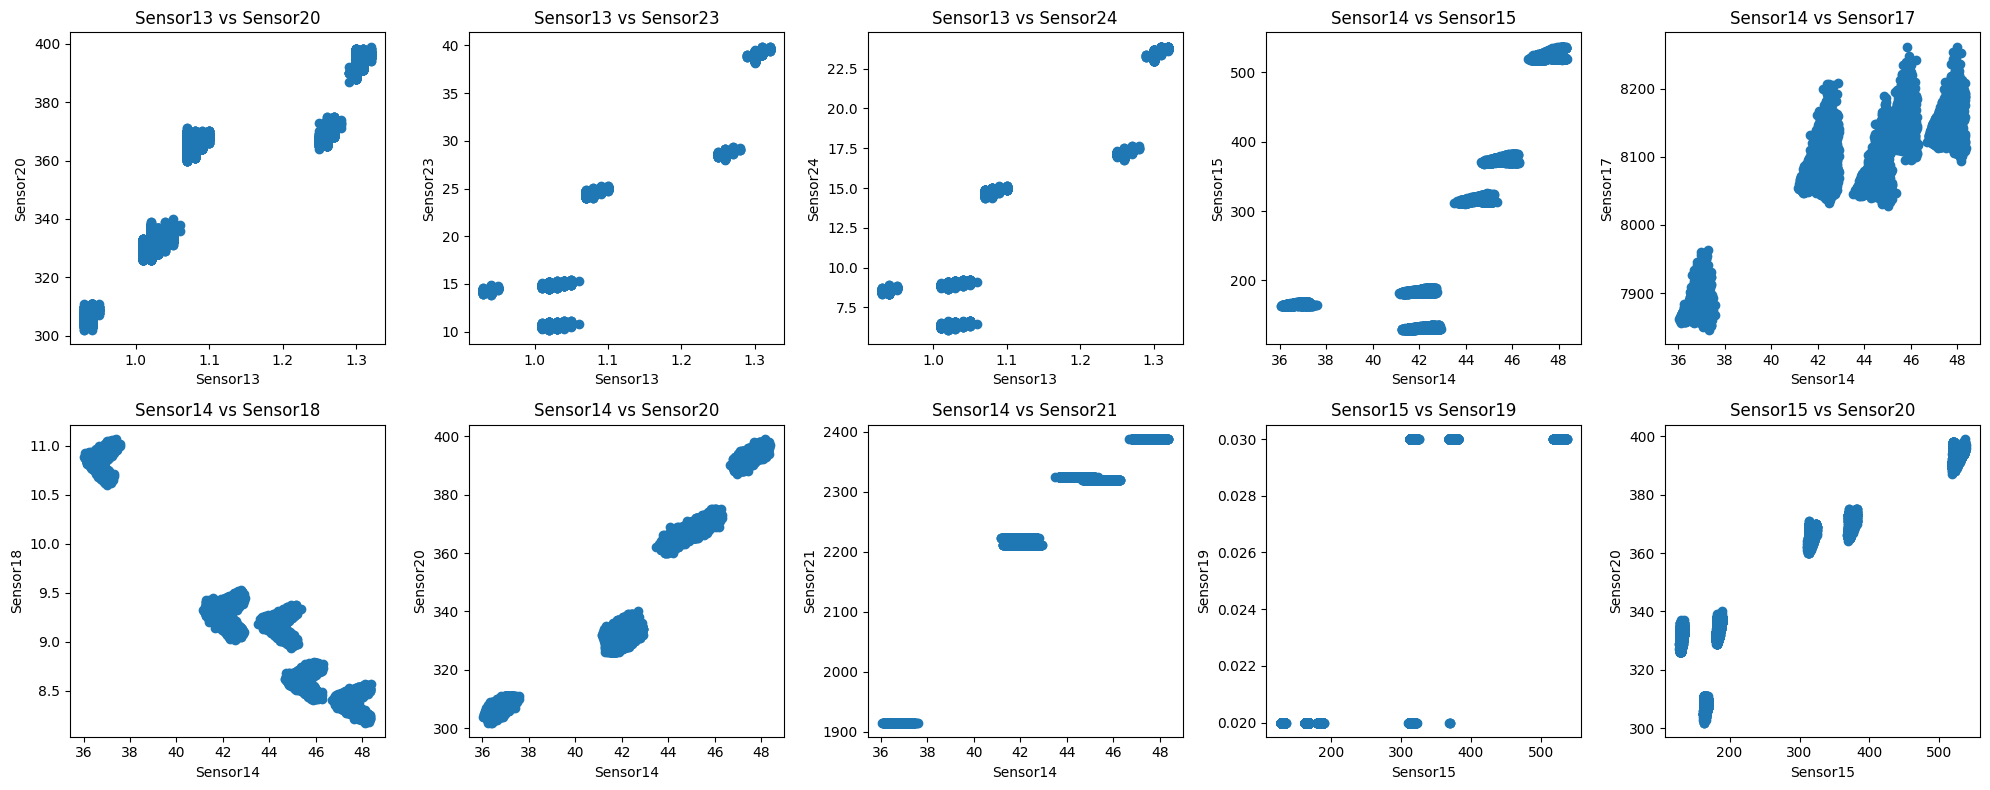

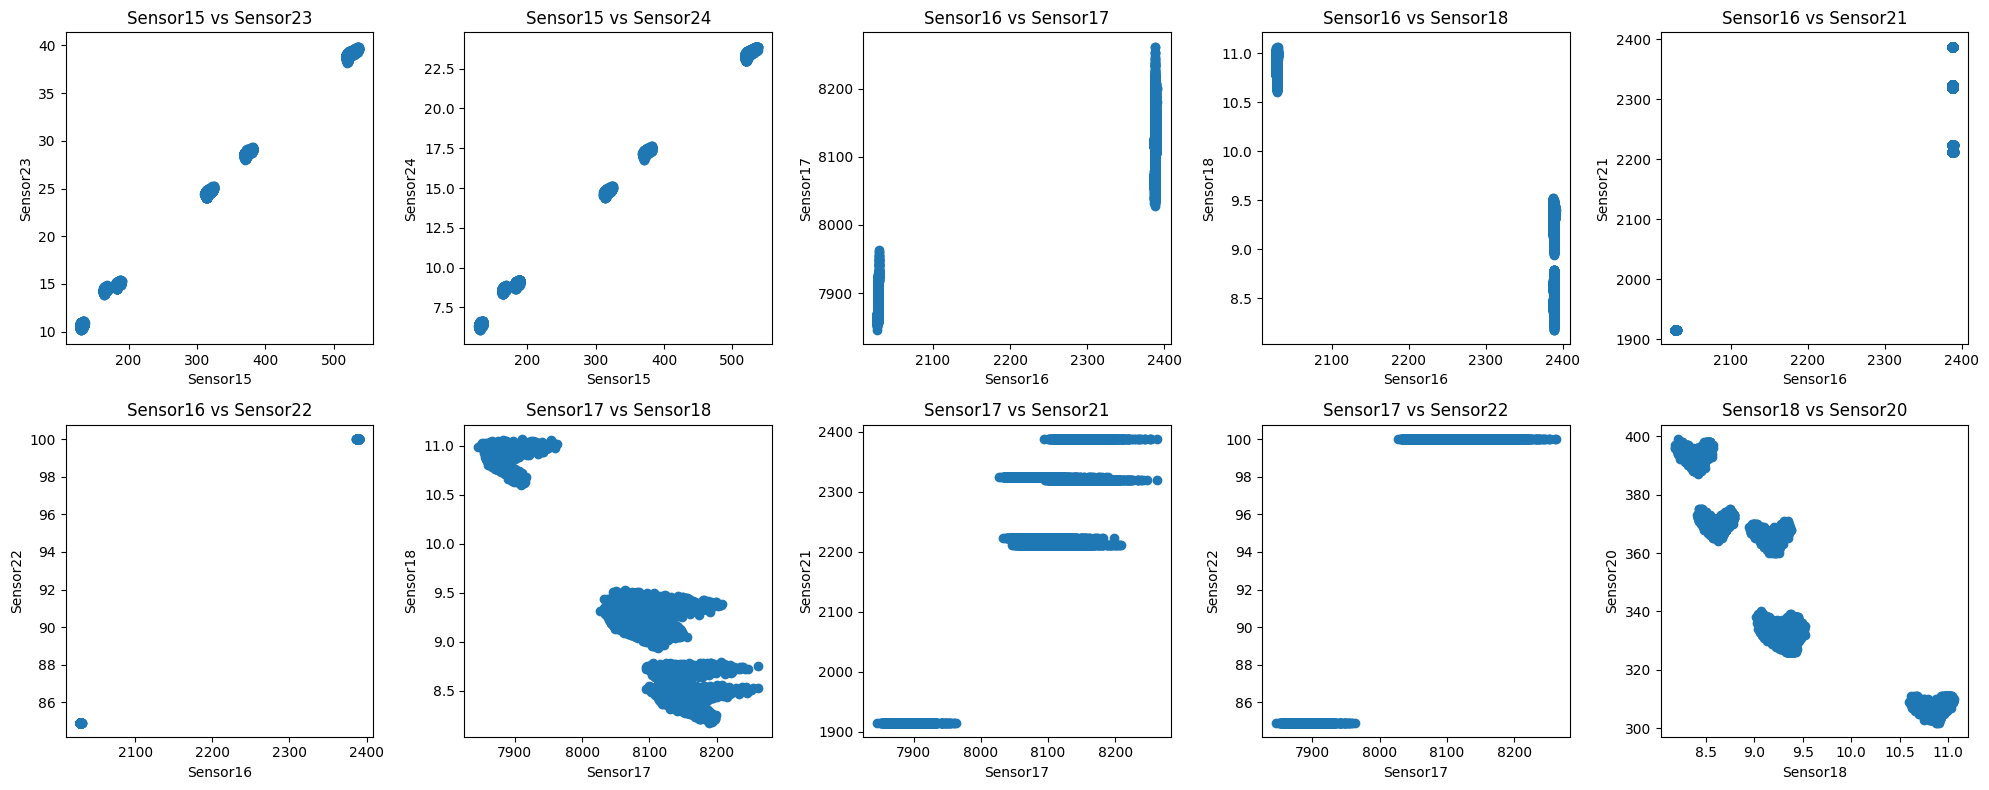

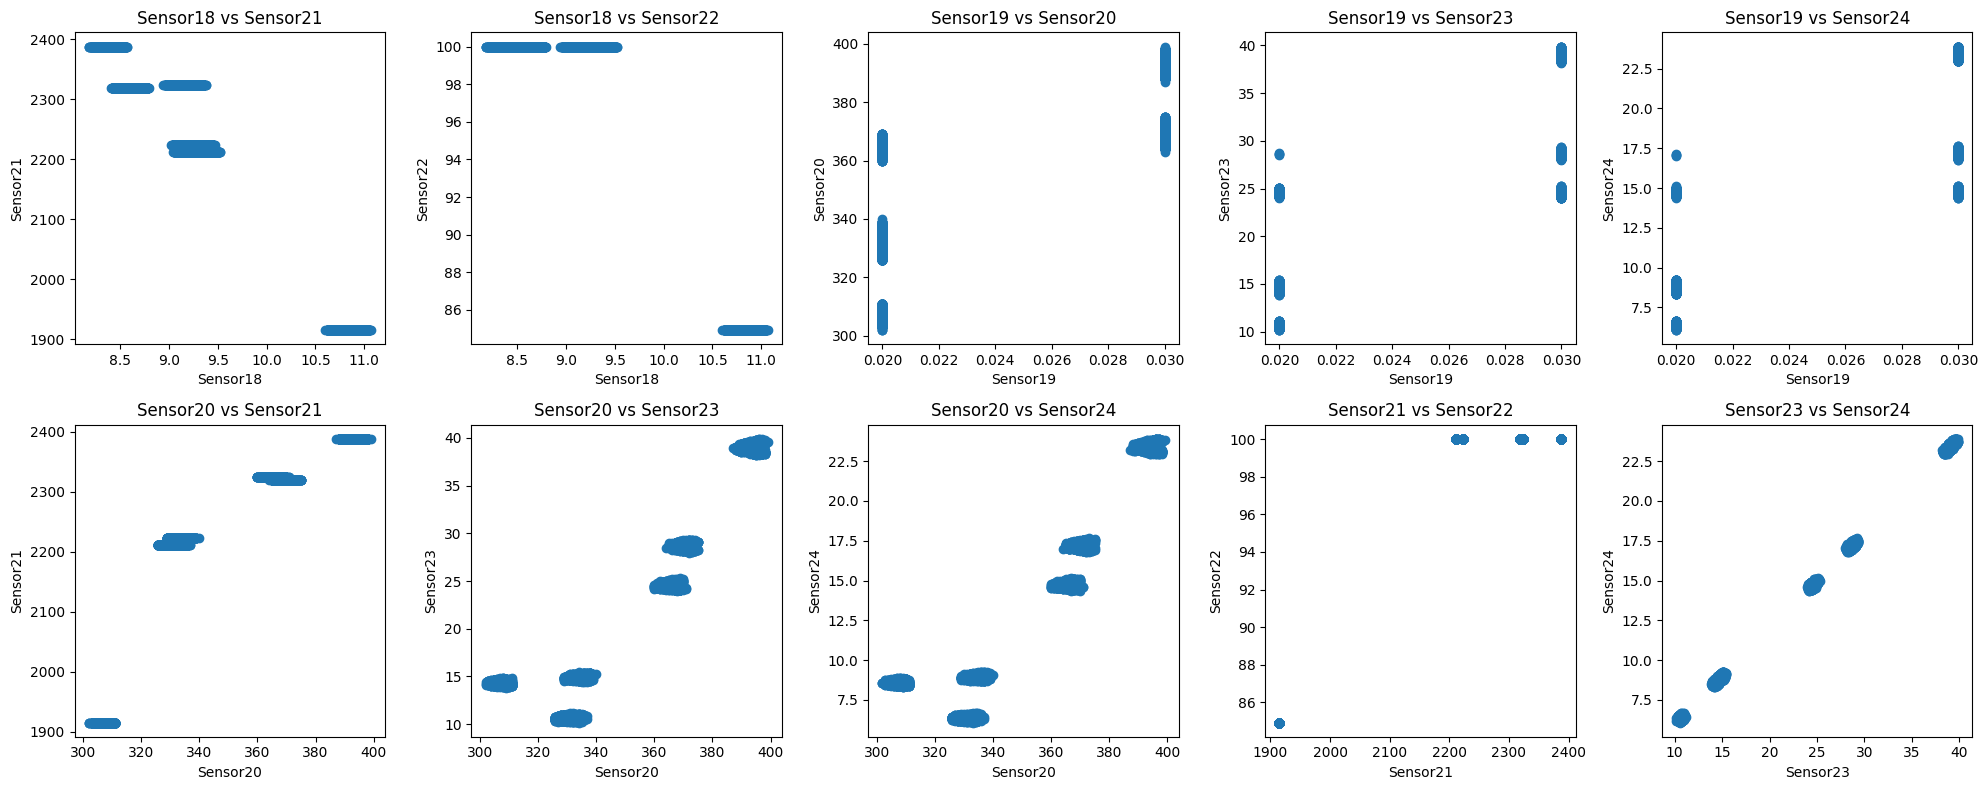

In [15]:
# Scatter plots for bivariate analysis based on Correlation Matrix Value.
corr_matrix = data.corr()
threshold = 0.8
sensors = data.columns[2:-1]  

# Pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = []
for pair in pairs:
    if pair[::-1] not in selected_pairs:
        selected_pairs.append(pair)

# Scatter plots for sensor pairs
for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)
    plt.tight_layout()
    plt.show()

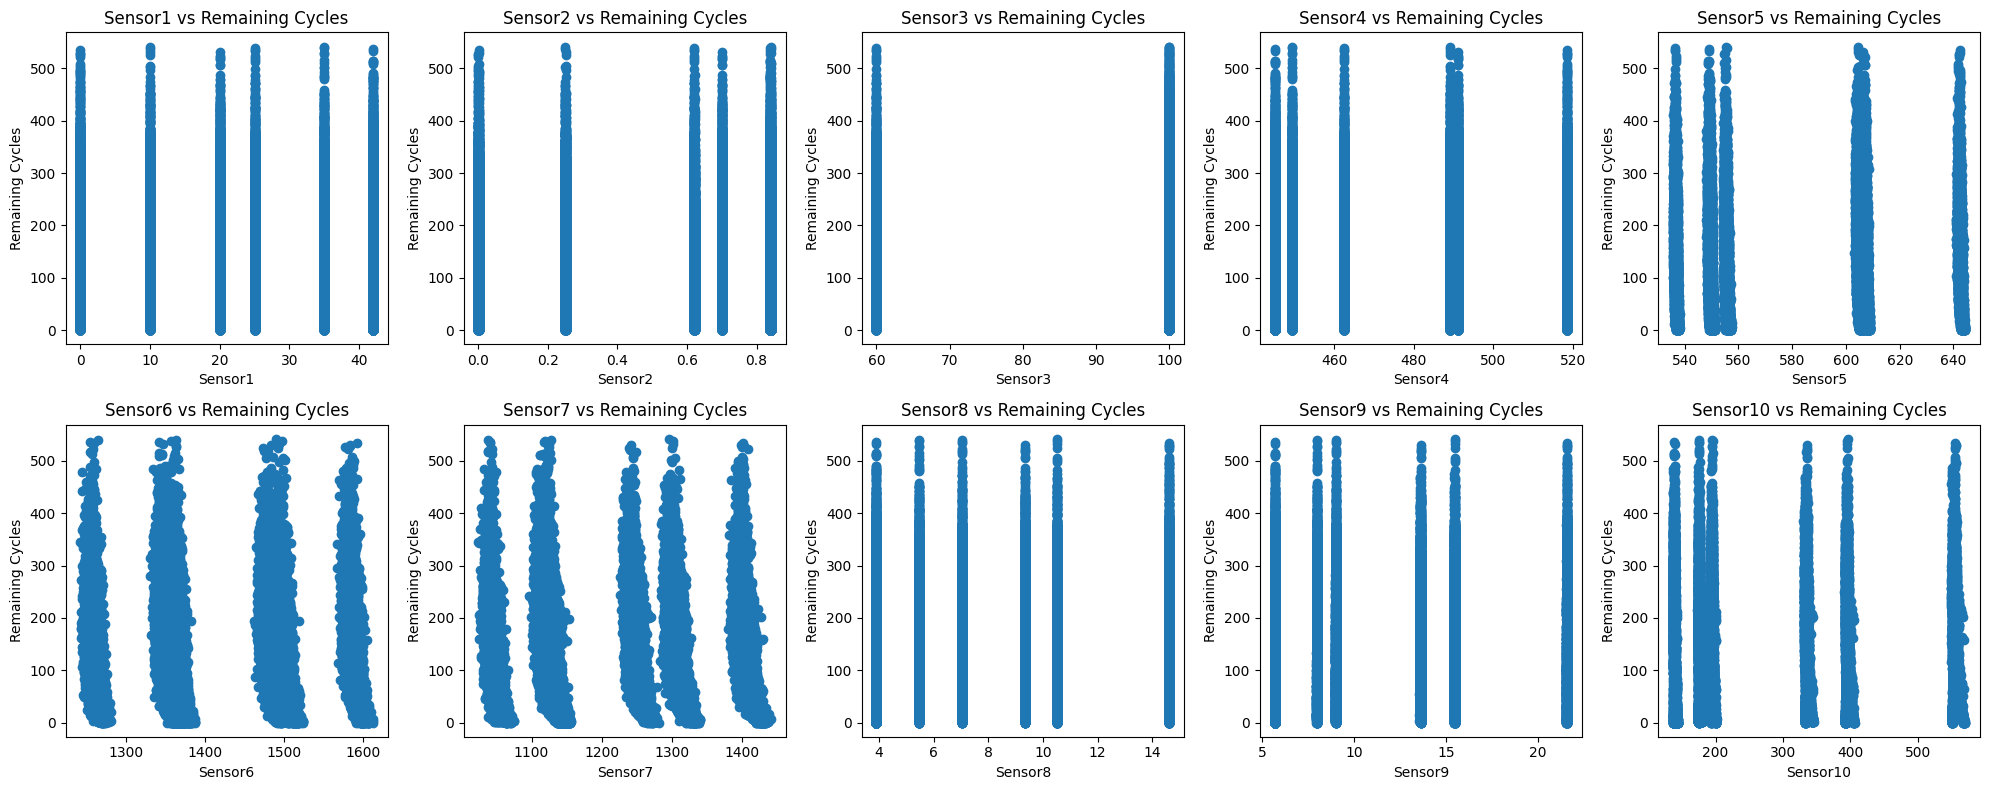

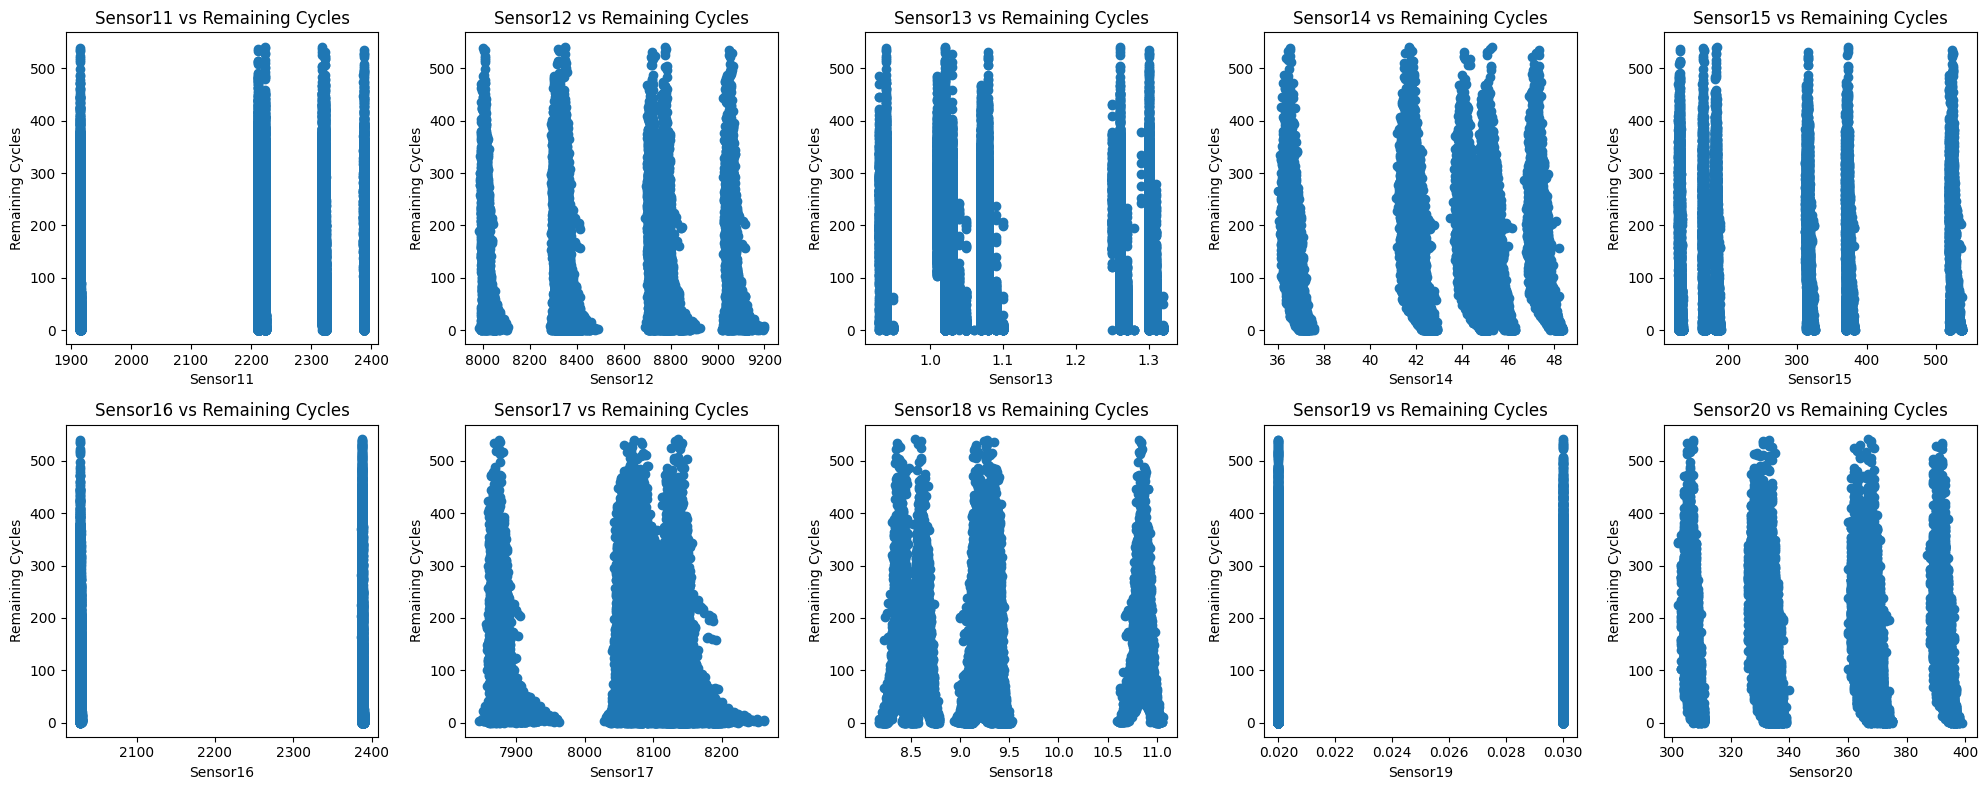

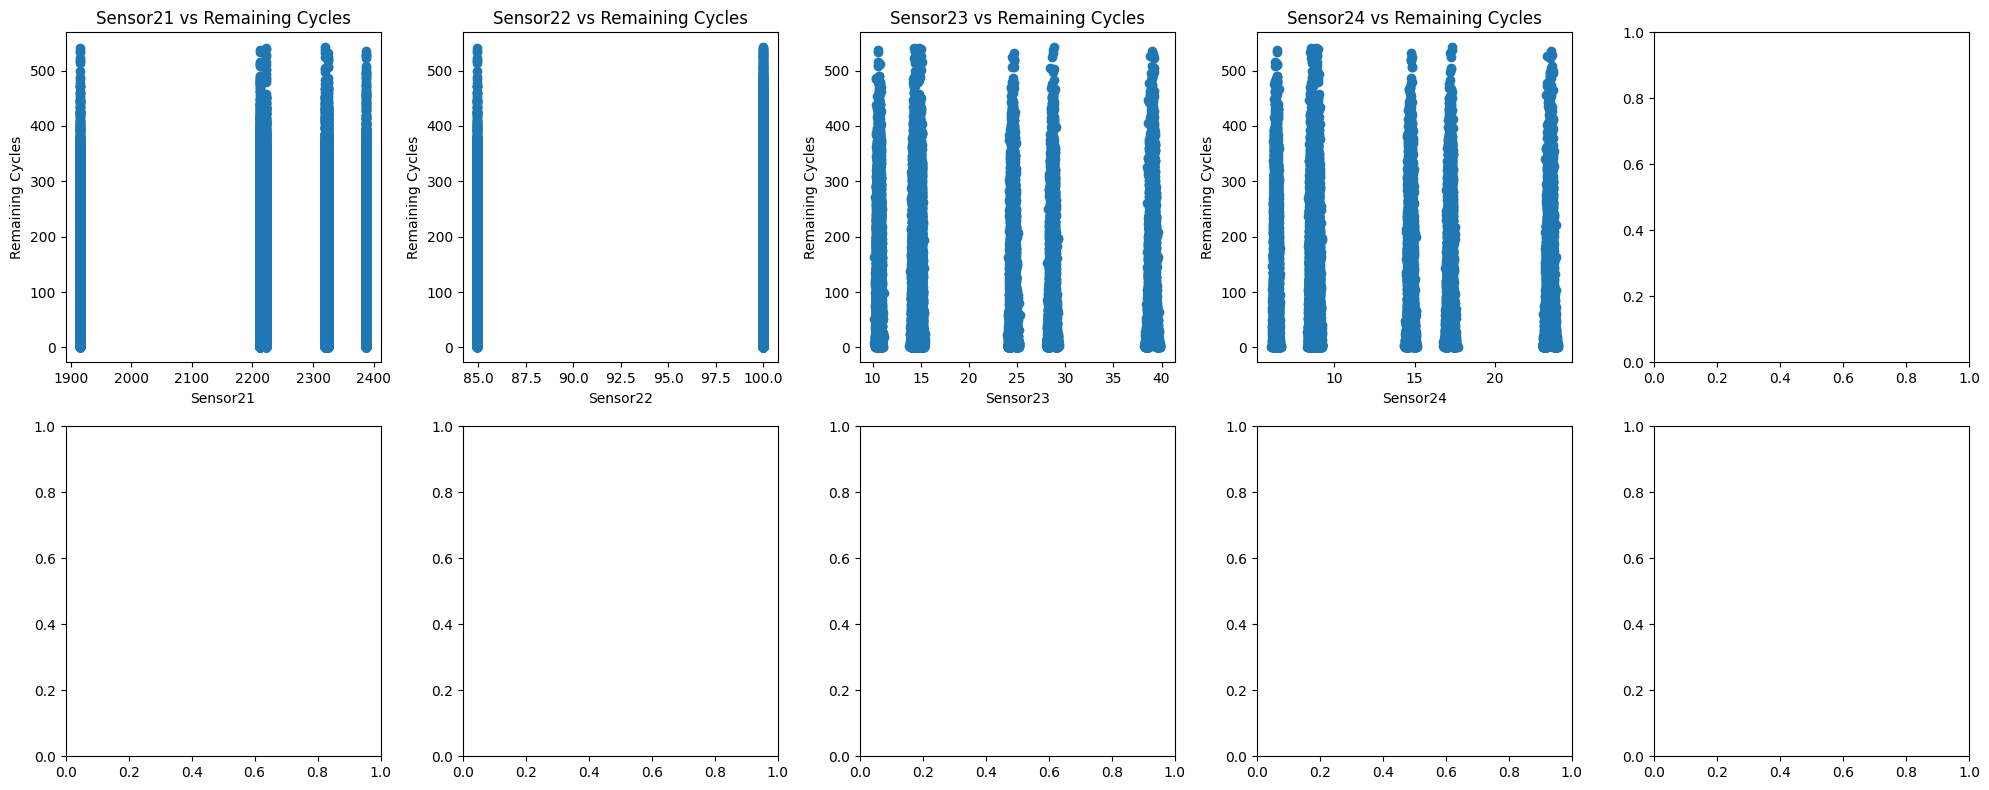

In [16]:
# Scatter plots for sensors vs remaining cycles
for j in range(0, len(sensors), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, sensor in enumerate(sensors[j:j+10]):
        axs[i].scatter(data[sensor], data['Remaining Cycles'])
        axs[i].set_title(f'{sensor} vs Remaining Cycles')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel('Remaining Cycles')
    plt.tight_layout()
    plt.show()

Group: Remaining Cycles = 0, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  245.97992   30.143352    0.636068   98.393574  463.433133   
std     72.024301   73.11080   16.301634    0.319993    7.869252   27.287849   
min      1.000000  128.00000    0.000100    0.000000   60.000000  445.000000   
25%     63.000000  190.00000   10.006100    0.251300  100.000000  445.000000   
50%    125.000000  234.00000   41.999100    0.840000  100.000000  445.000000   
75%    187.000000  290.00000   42.003800    0.840500  100.000000  489.050000   
max    249.000000  543.00000   42.007900    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   572.163333  1419.440080  1209.643173    6.664418  ...  2374.055221   
std     

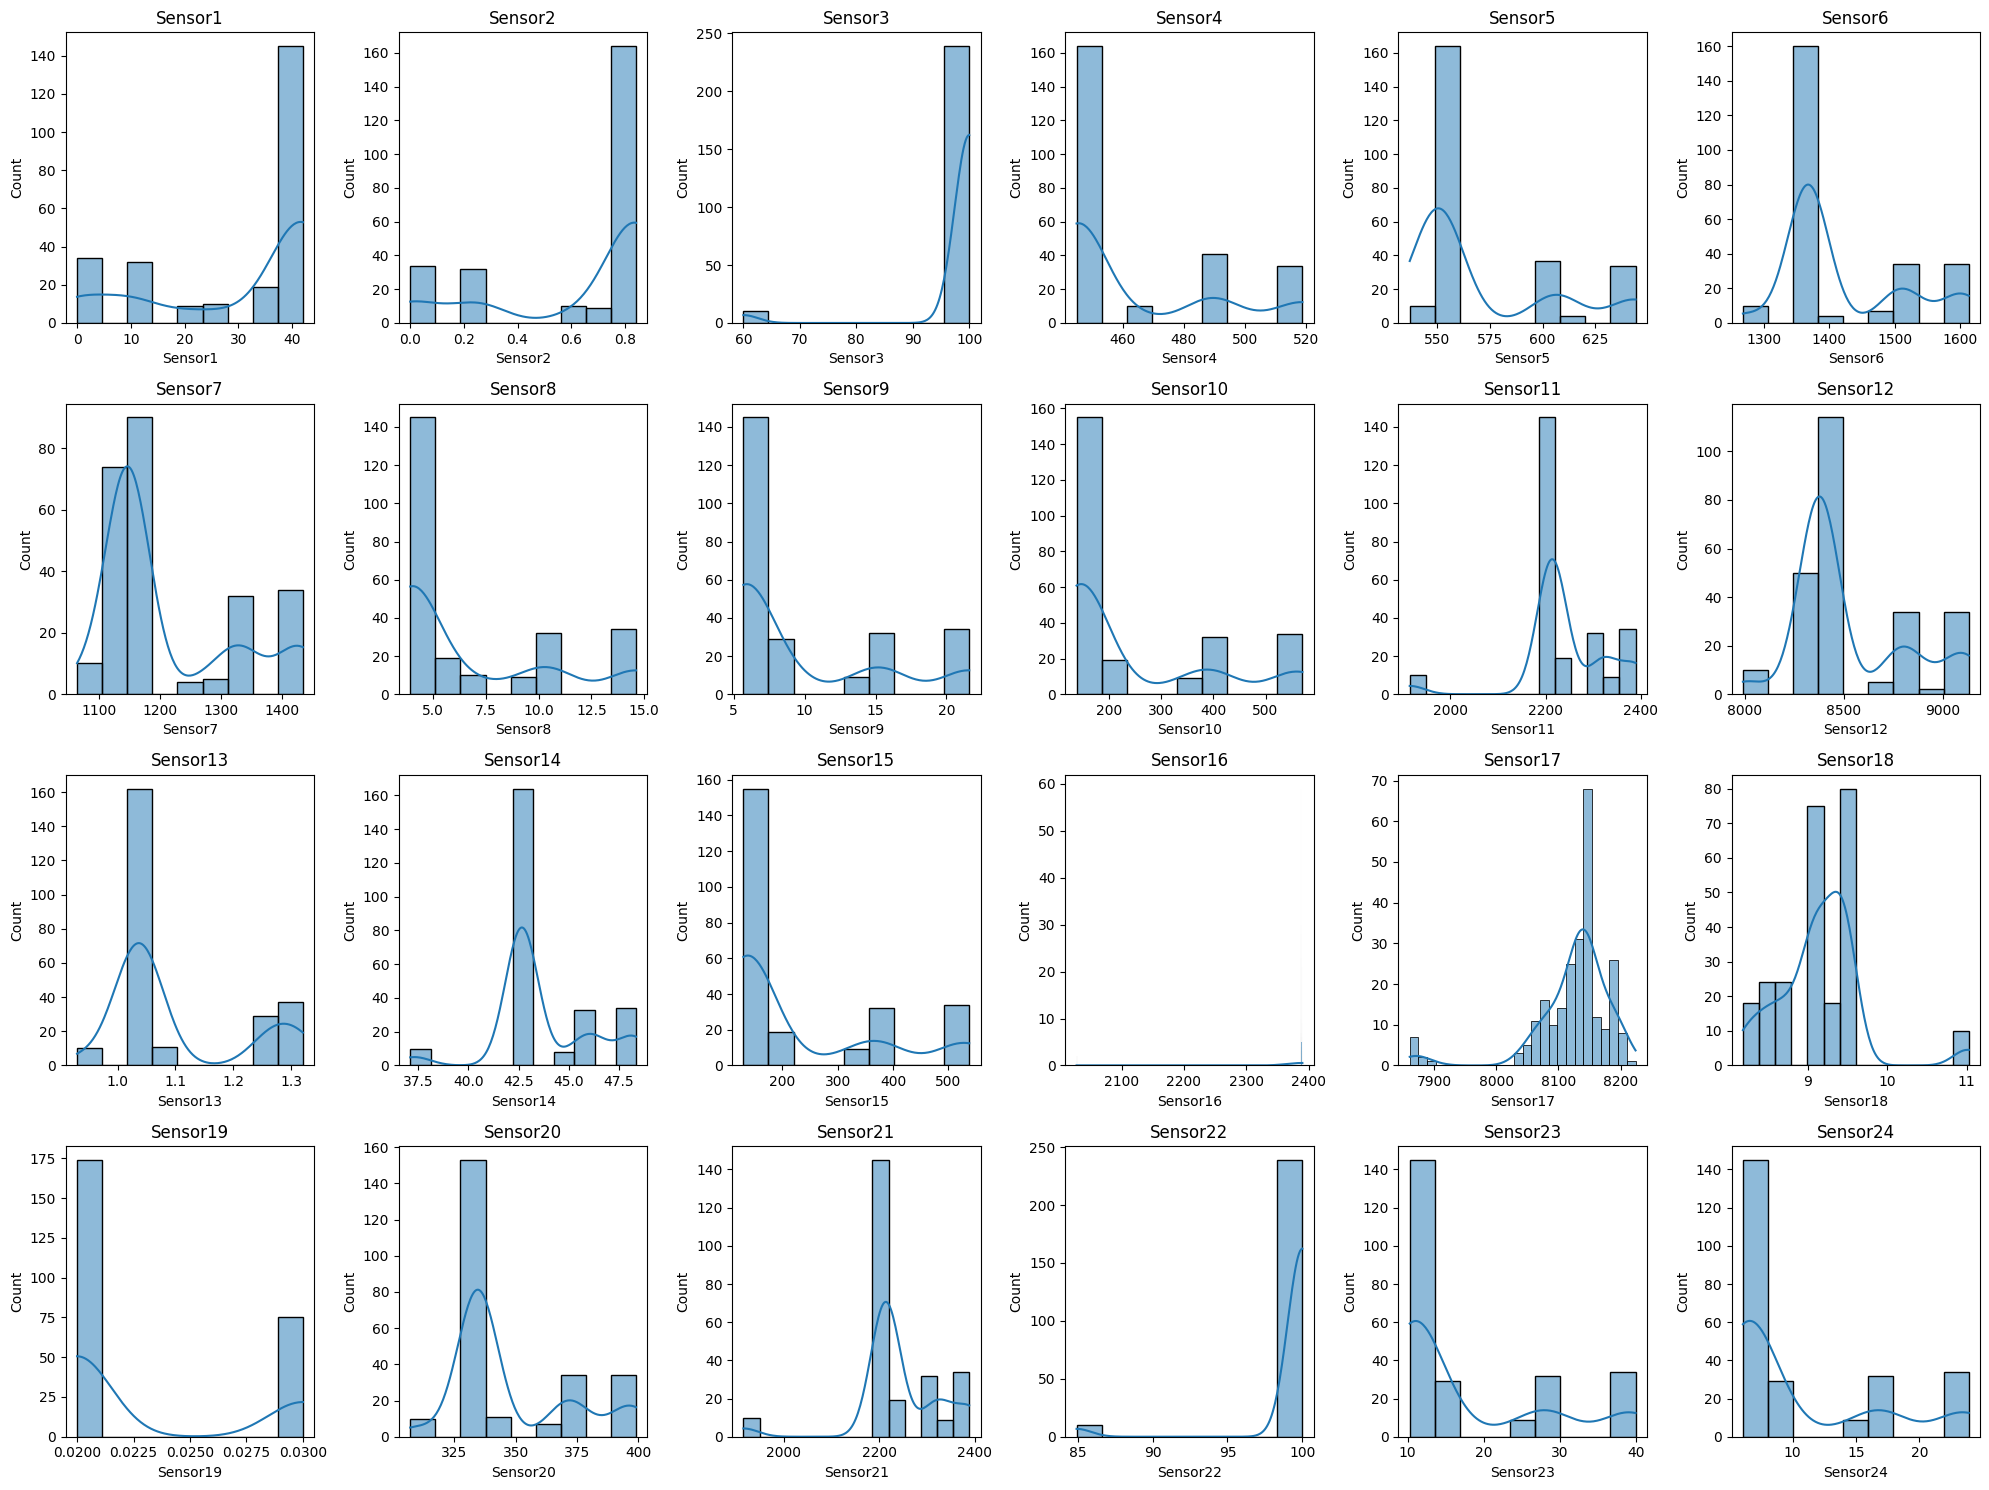

Enter 'c' to continue, 'q' to quit exploring group 0: c
Group: Remaining Cycles = 1, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  244.97992   21.898508    0.557467   93.574297  477.236104   
std     72.024301   73.11080   13.749343    0.308172   14.717621   25.889288   
min      1.000000  127.00000    0.000100    0.000000   60.000000  445.000000   
25%     63.000000  189.00000   10.004800    0.250900  100.000000  449.440000   
50%    125.000000  233.00000   20.006900    0.700000  100.000000  489.050000   
75%    187.000000  289.00000   35.001200    0.840000  100.000000  491.190000   
max    249.000000  542.00000   42.007500    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   585.330884  1441.39759

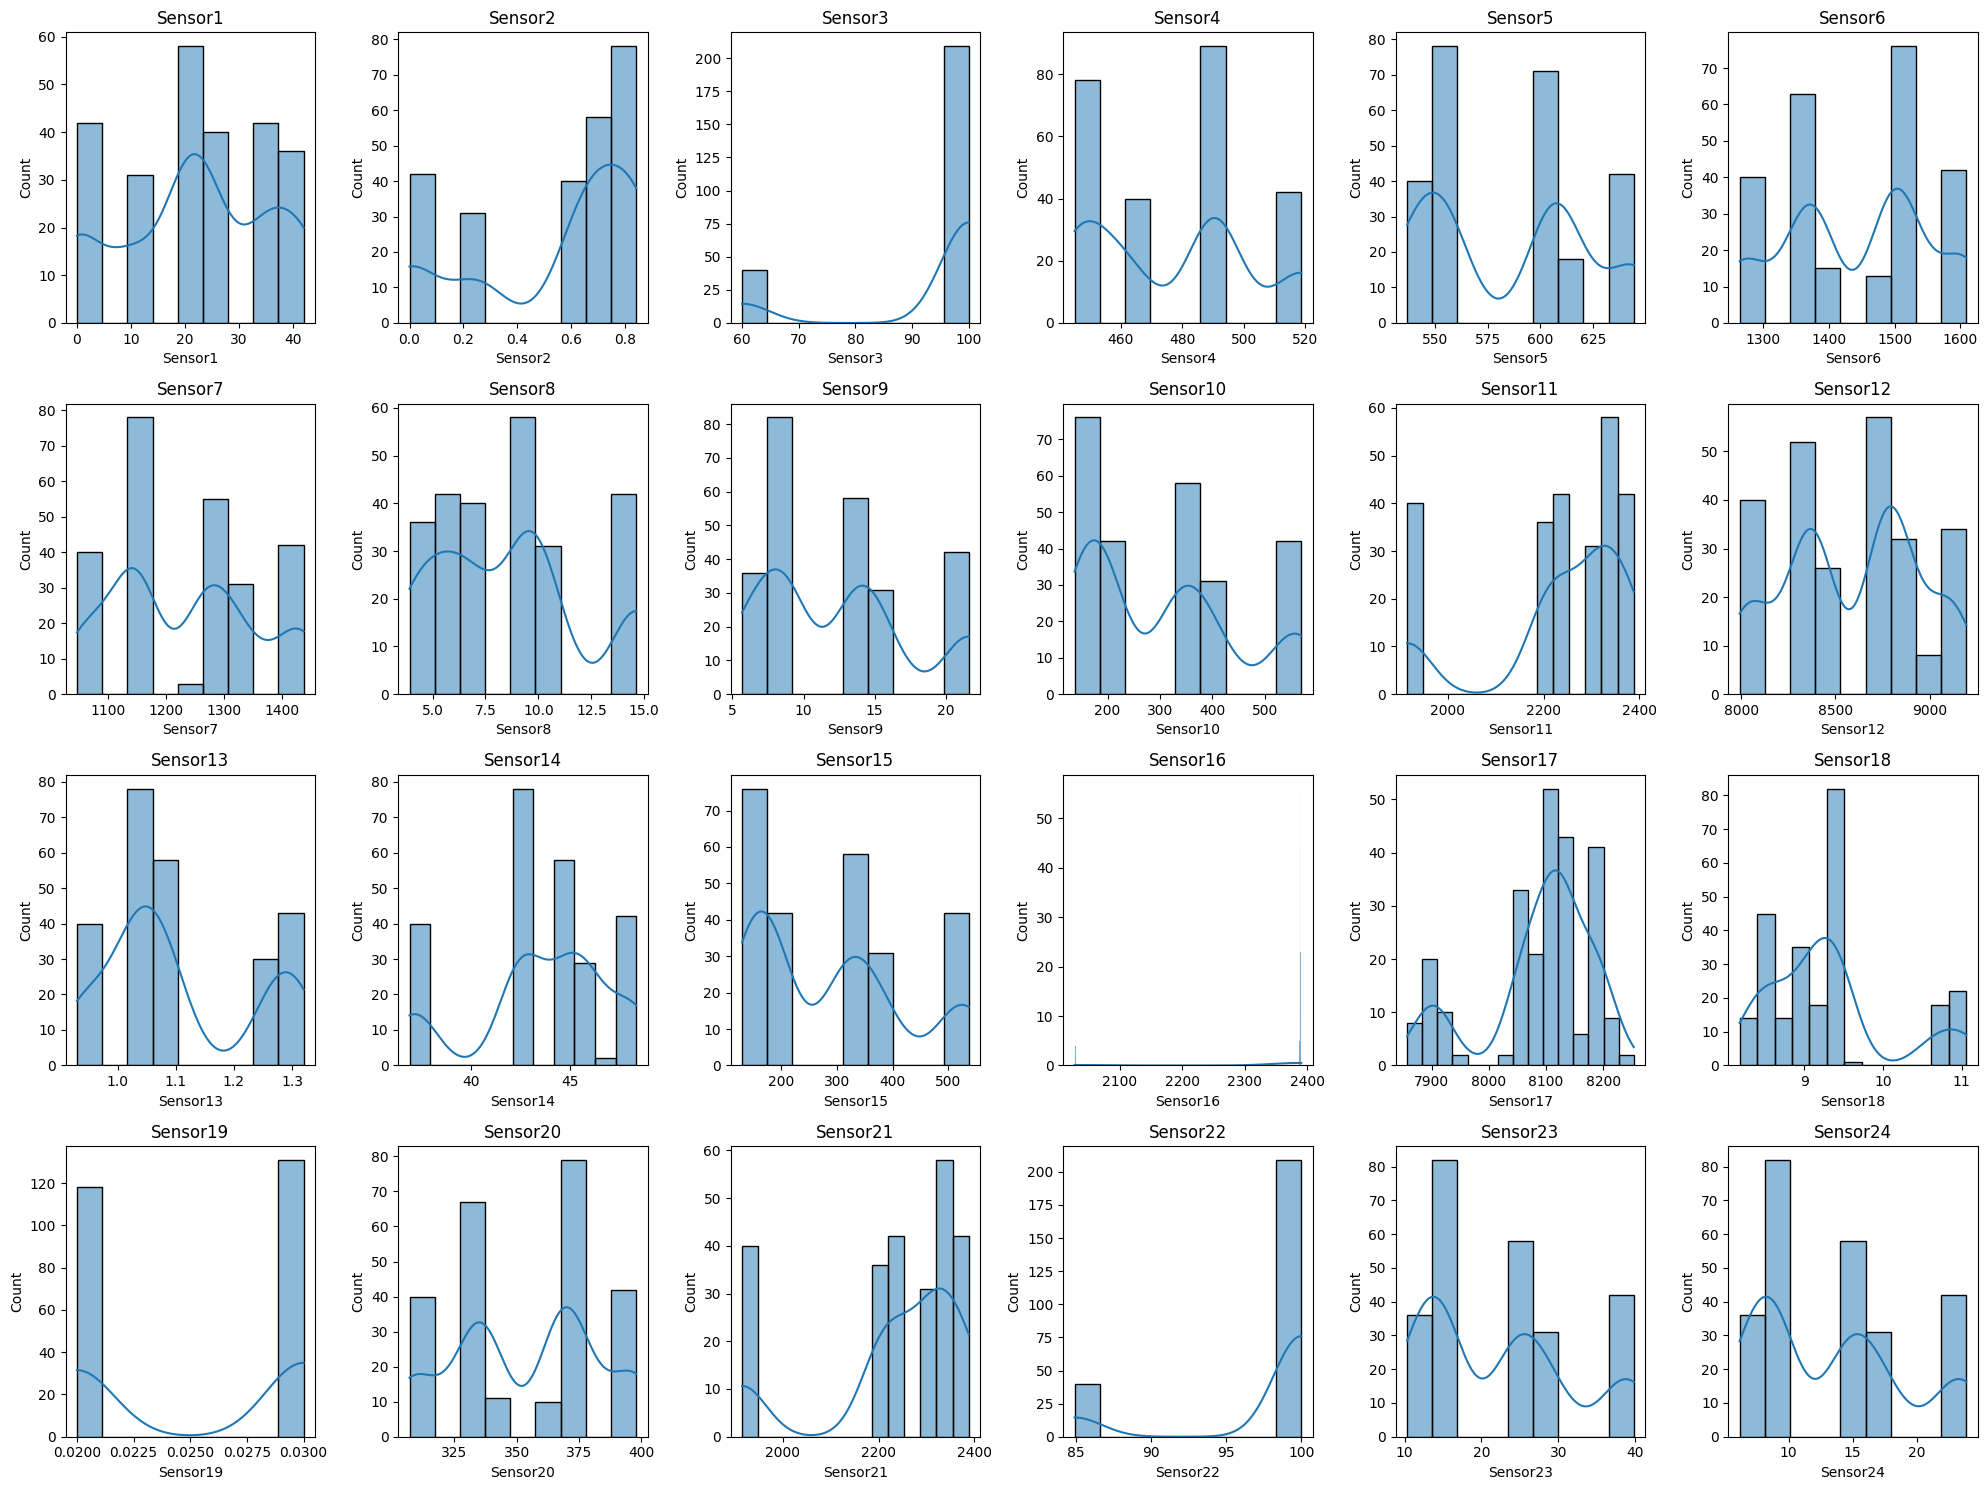

Enter 'c' to continue, 'q' to quit exploring group 1: c
Group: Remaining Cycles = 2, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  243.97992   23.151718    0.573243   92.128514  473.598434   
std     72.024301   73.11080   13.306645    0.287764   15.934833   24.228658   
min      1.000000  126.00000    0.000400    0.000000   60.000000  445.000000   
25%     63.000000  188.00000   10.007200    0.251400  100.000000  449.440000   
50%    125.000000  232.00000   24.999300    0.700000  100.000000  462.540000   
75%    187.000000  288.00000   35.003700    0.840000  100.000000  491.190000   
max    249.000000  541.00000   42.007900    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   579.453976  1425.17534

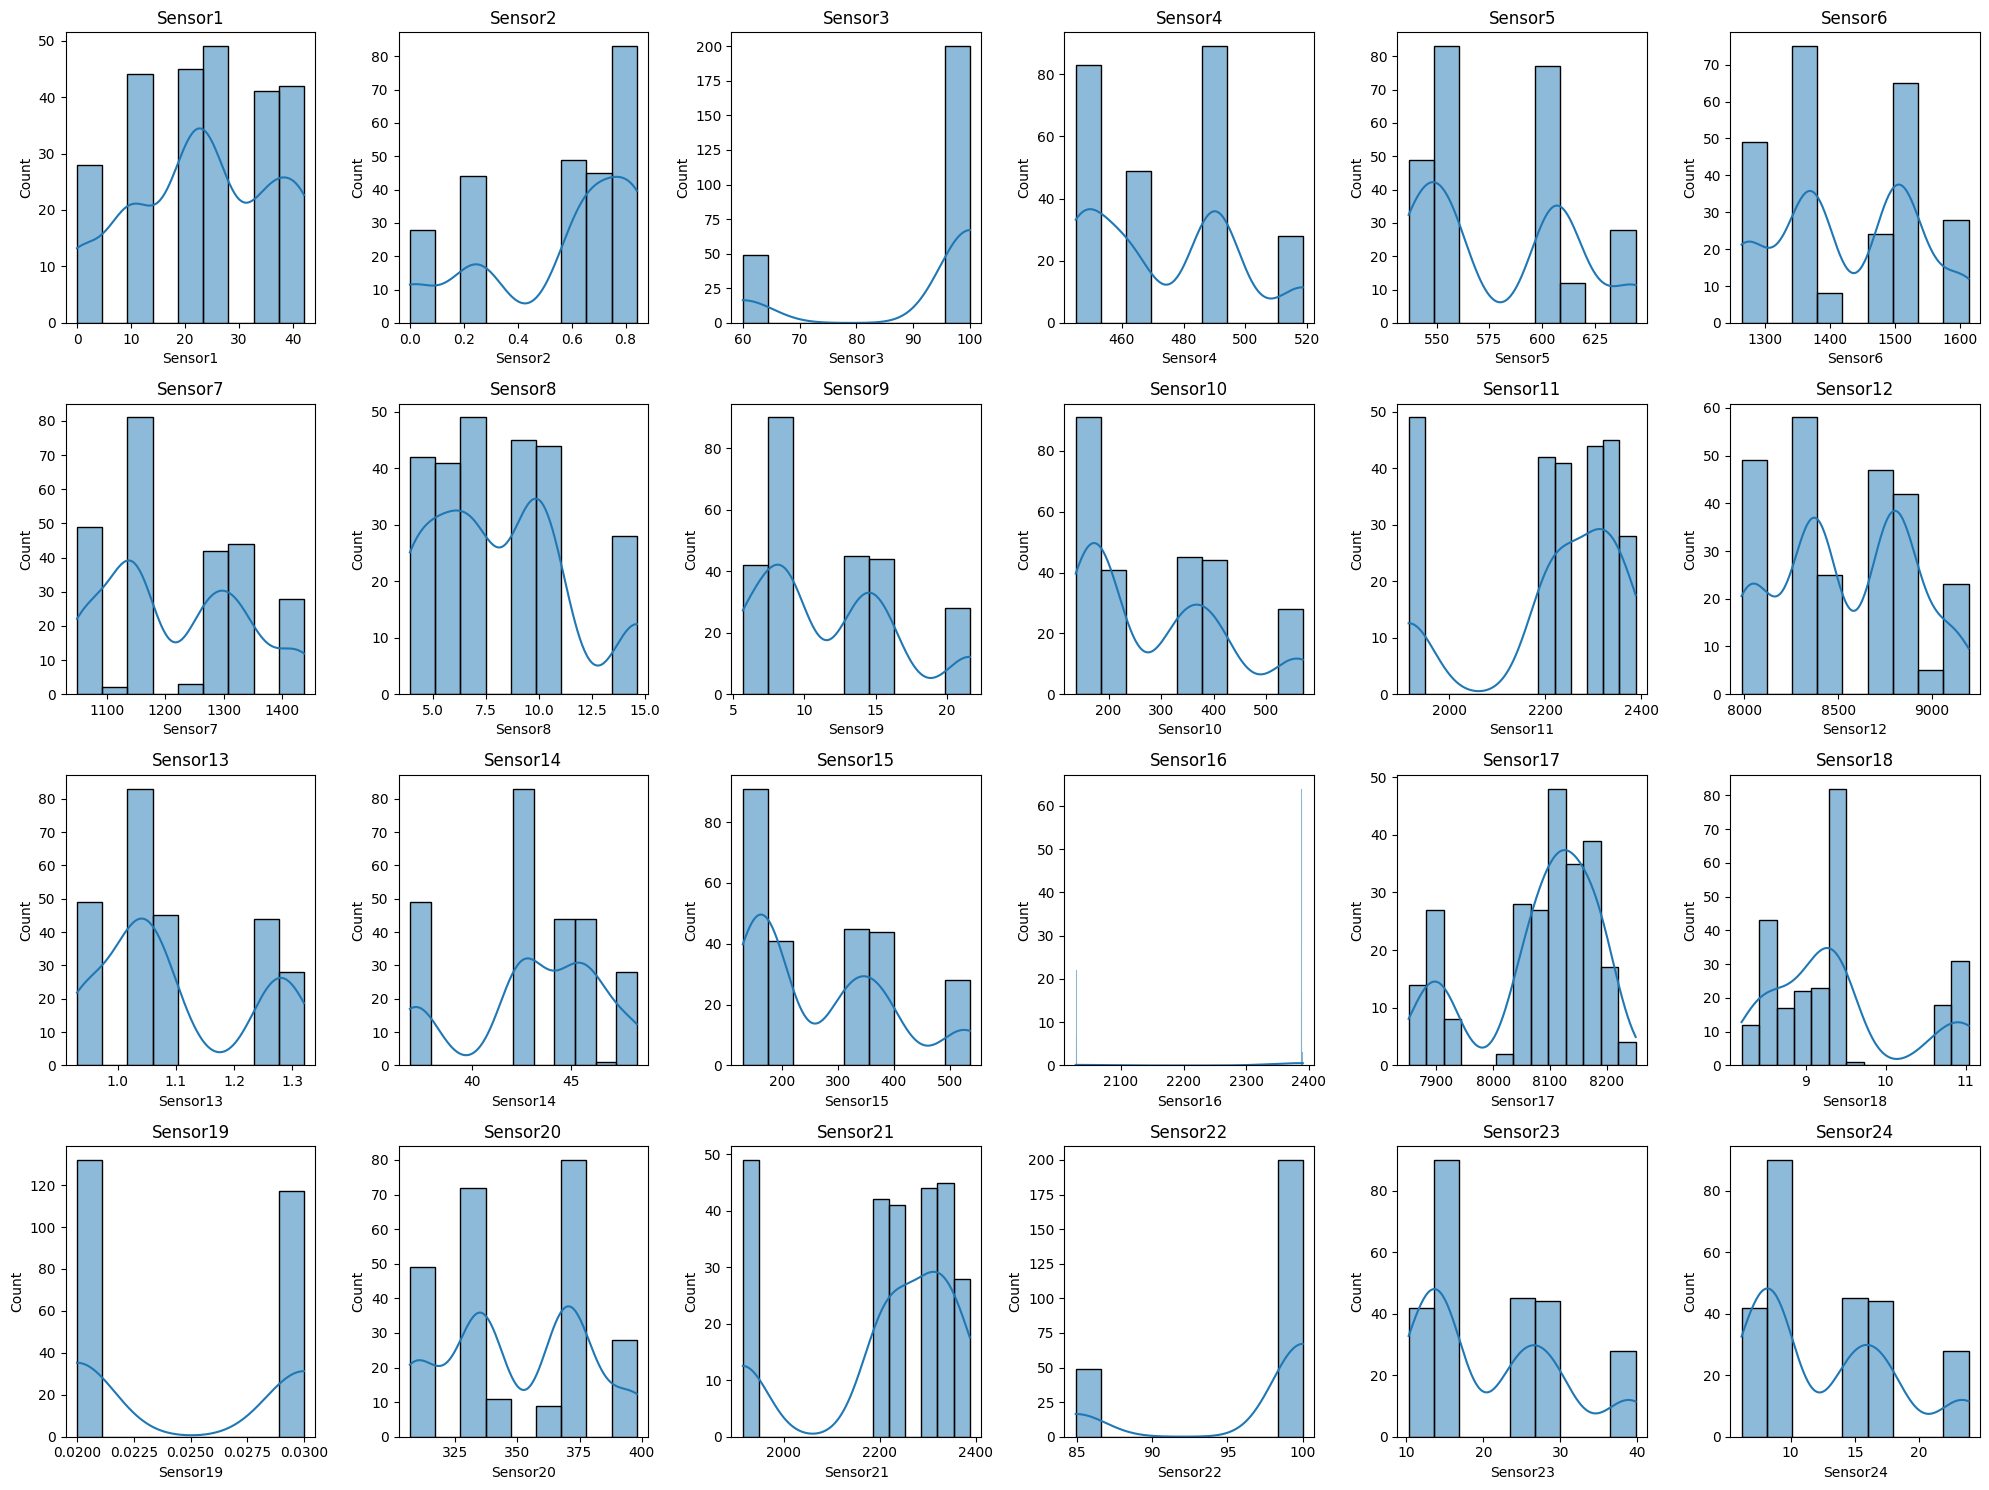

Enter 'c' to continue, 'q' to quit exploring group 2: c
Group: Remaining Cycles = 3, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  242.97992   22.006787    0.533959   93.574297  476.080964   
std     72.024301   73.11080   14.548963    0.312829   14.717621   26.020148   
min      1.000000  125.00000    0.000100    0.000000   60.000000  445.000000   
25%     63.000000  187.00000   10.002800    0.250000  100.000000  449.440000   
50%    125.000000  231.00000   20.006800    0.621400  100.000000  489.050000   
75%    187.000000  287.00000   35.004600    0.840000  100.000000  491.190000   
max    249.000000  540.00000   42.007600    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   583.833293  1438.78771

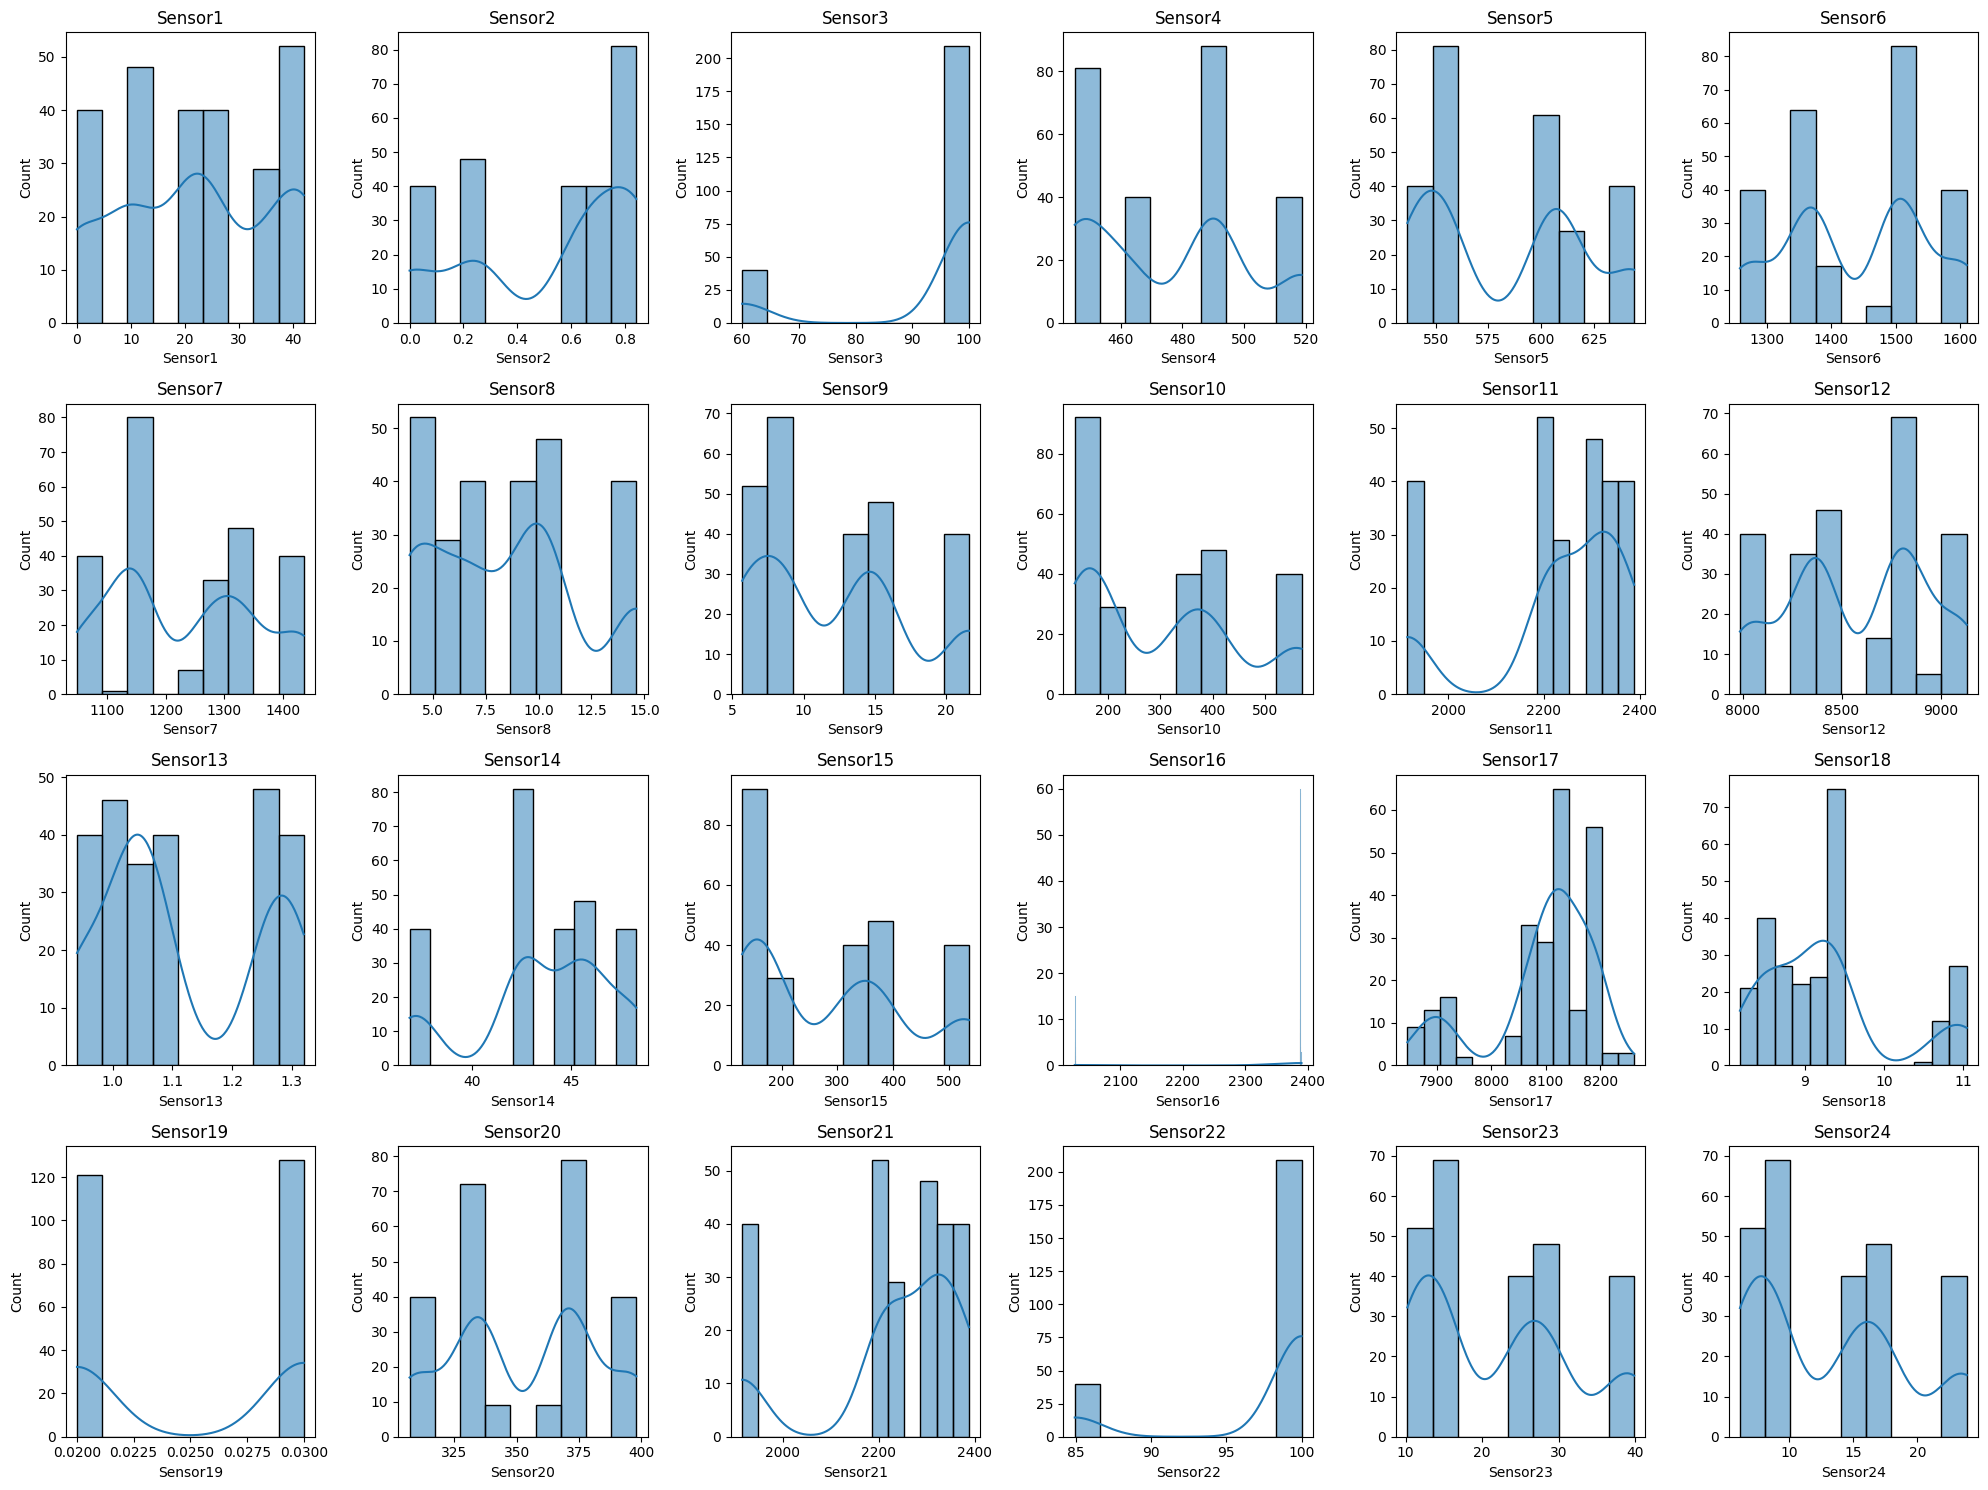

Enter 'c' to continue, 'q' to quit exploring group 3: c
Group: Remaining Cycles = 4, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3    Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.00000   
mean   125.000000  241.97992   22.685772    0.544386   92.771084  475.03008   
std     72.024301   73.11080   14.952602    0.321660   15.422537   27.22166   
min      1.000000  124.00000    0.000100    0.000000   60.000000  445.00000   
25%     63.000000  186.00000   10.003000    0.250500  100.000000  449.44000   
50%    125.000000  230.00000   24.999400    0.621800  100.000000  462.54000   
75%    187.000000  286.00000   35.005100    0.840000  100.000000  491.19000   
max    249.000000  539.00000   42.007800    0.841900  100.000000  518.67000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   581.786064  1431.906586  1223.6

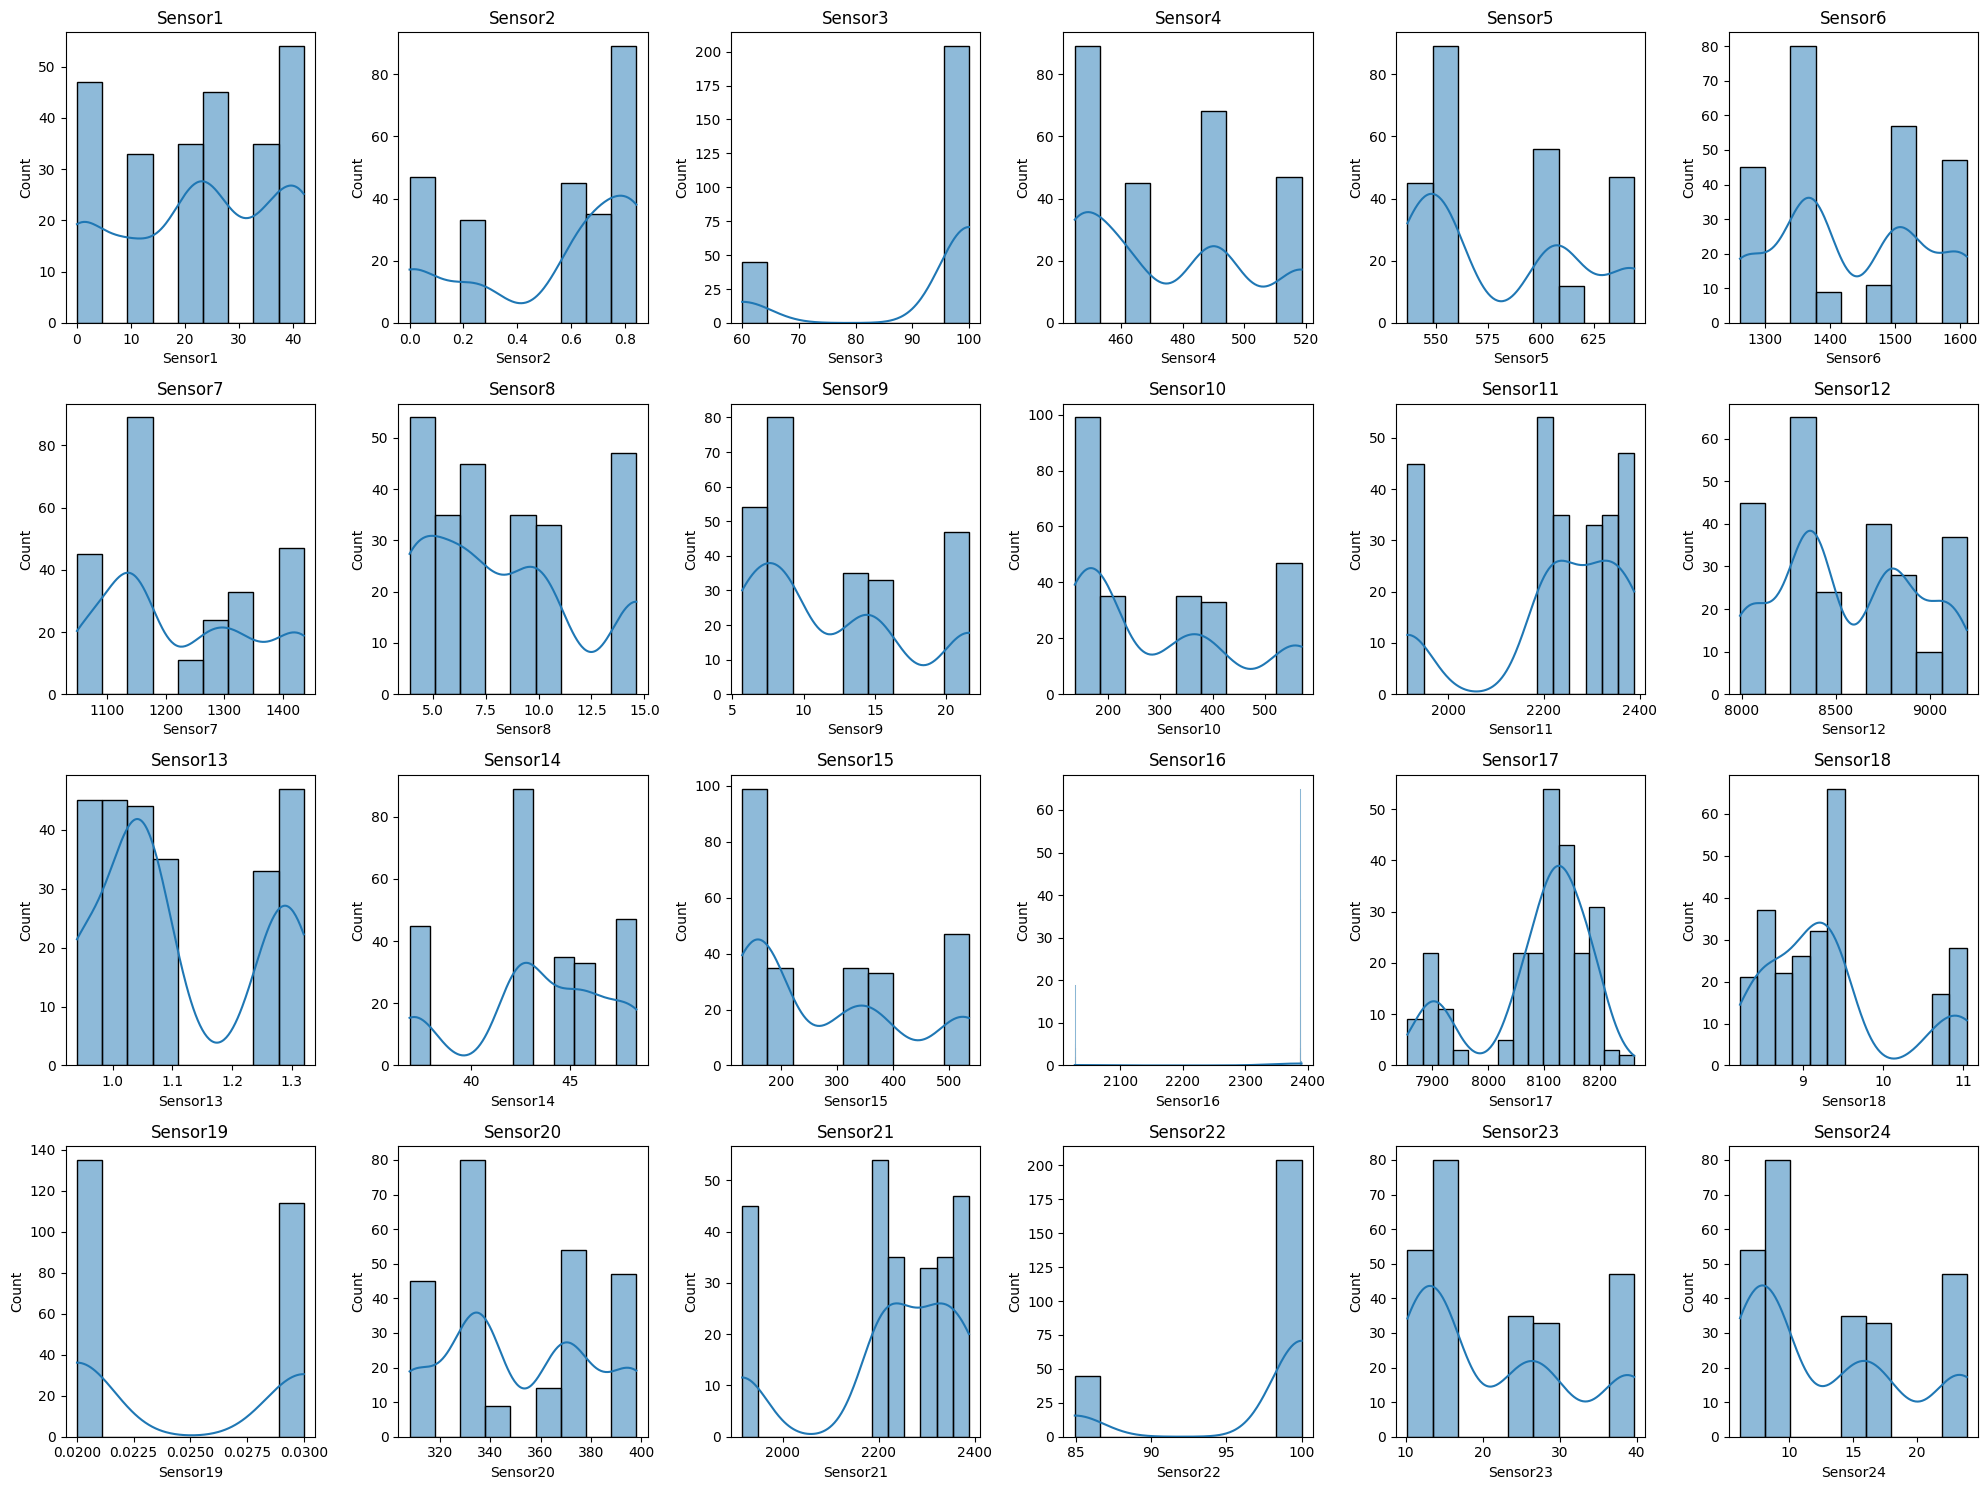

Enter 'c' to continue, 'q' to quit exploring group 4: c
Group: Remaining Cycles = 5, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  240.97992   23.528988    0.566387   92.449799  473.484297   
std     72.024301   73.11080   14.548732    0.311164   15.684082   26.549680   
min      1.000000  123.00000    0.000100    0.000000   60.000000  445.000000   
25%     63.000000  185.00000   10.005000    0.250700  100.000000  449.440000   
50%    125.000000  229.00000   25.001100    0.700000  100.000000  462.540000   
75%    187.000000  285.00000   35.005500    0.840000  100.000000  491.190000   
max    249.000000  538.00000   42.007900    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   579.575823  1424.62662

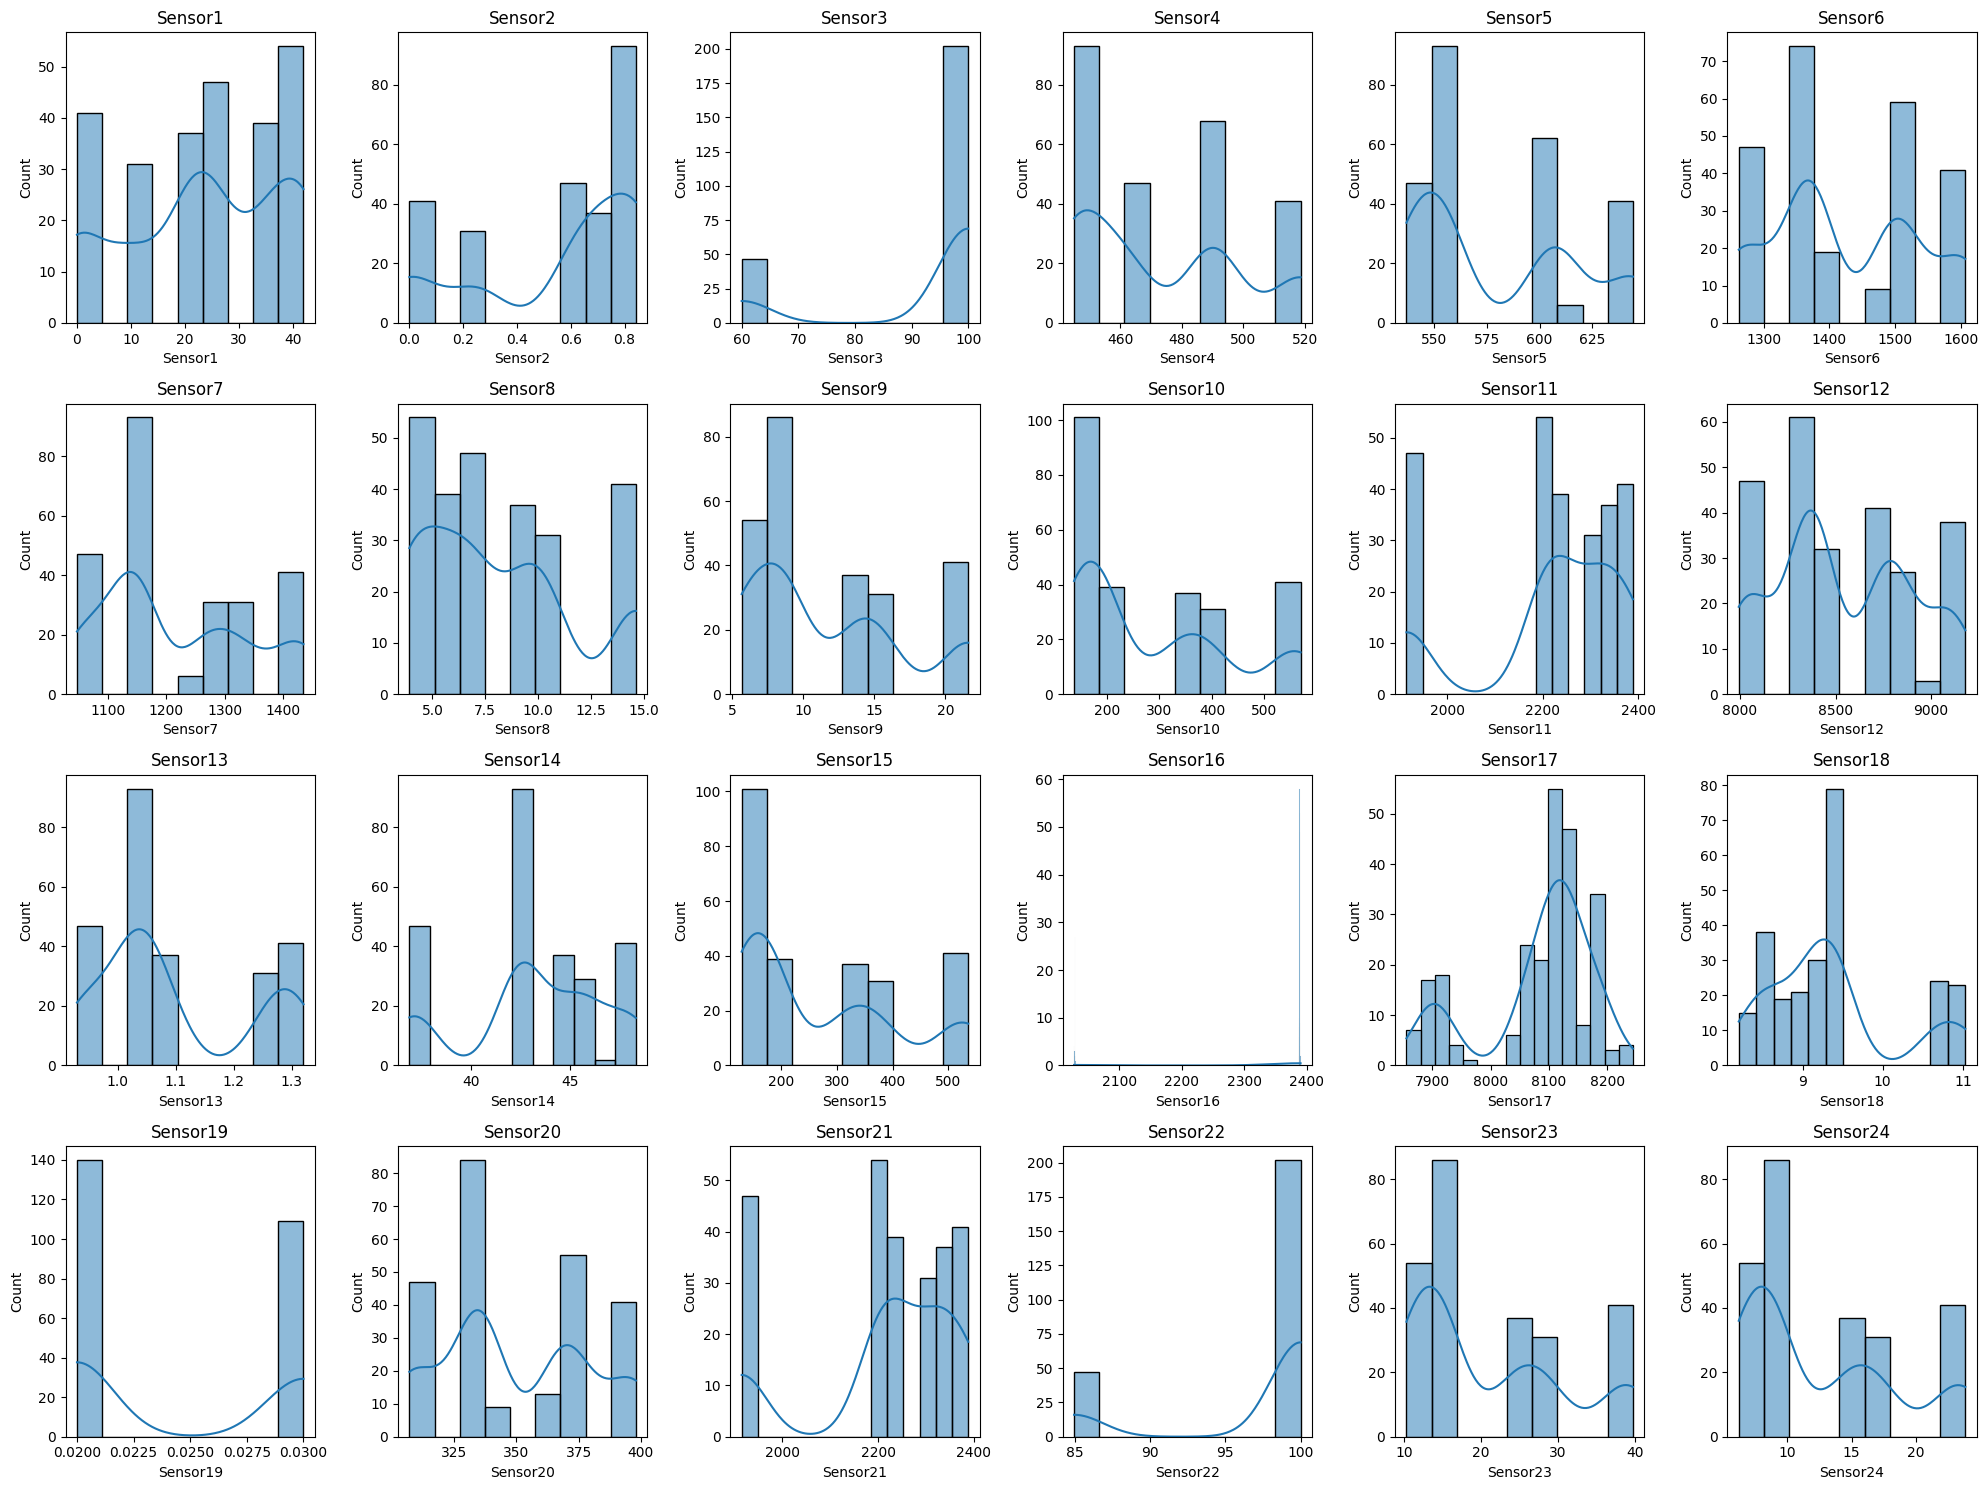

Enter 'c' to continue, 'q' to quit exploring group 5: c
Group: Remaining Cycles = 6, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  239.97992   22.552853    0.547068   95.180723  476.248072   
std     72.024301   73.11080   15.243819    0.329734   13.047195   27.842801   
min      1.000000  122.00000    0.000100    0.000000   60.000000  445.000000   
25%     63.000000  184.00000   10.000900    0.250000  100.000000  449.440000   
50%    125.000000  228.00000   20.008000    0.700000  100.000000  489.050000   
75%    187.000000  284.00000   35.006100    0.840000  100.000000  491.190000   
max    249.000000  537.00000   42.007800    0.841900  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   585.420683  1443.79080

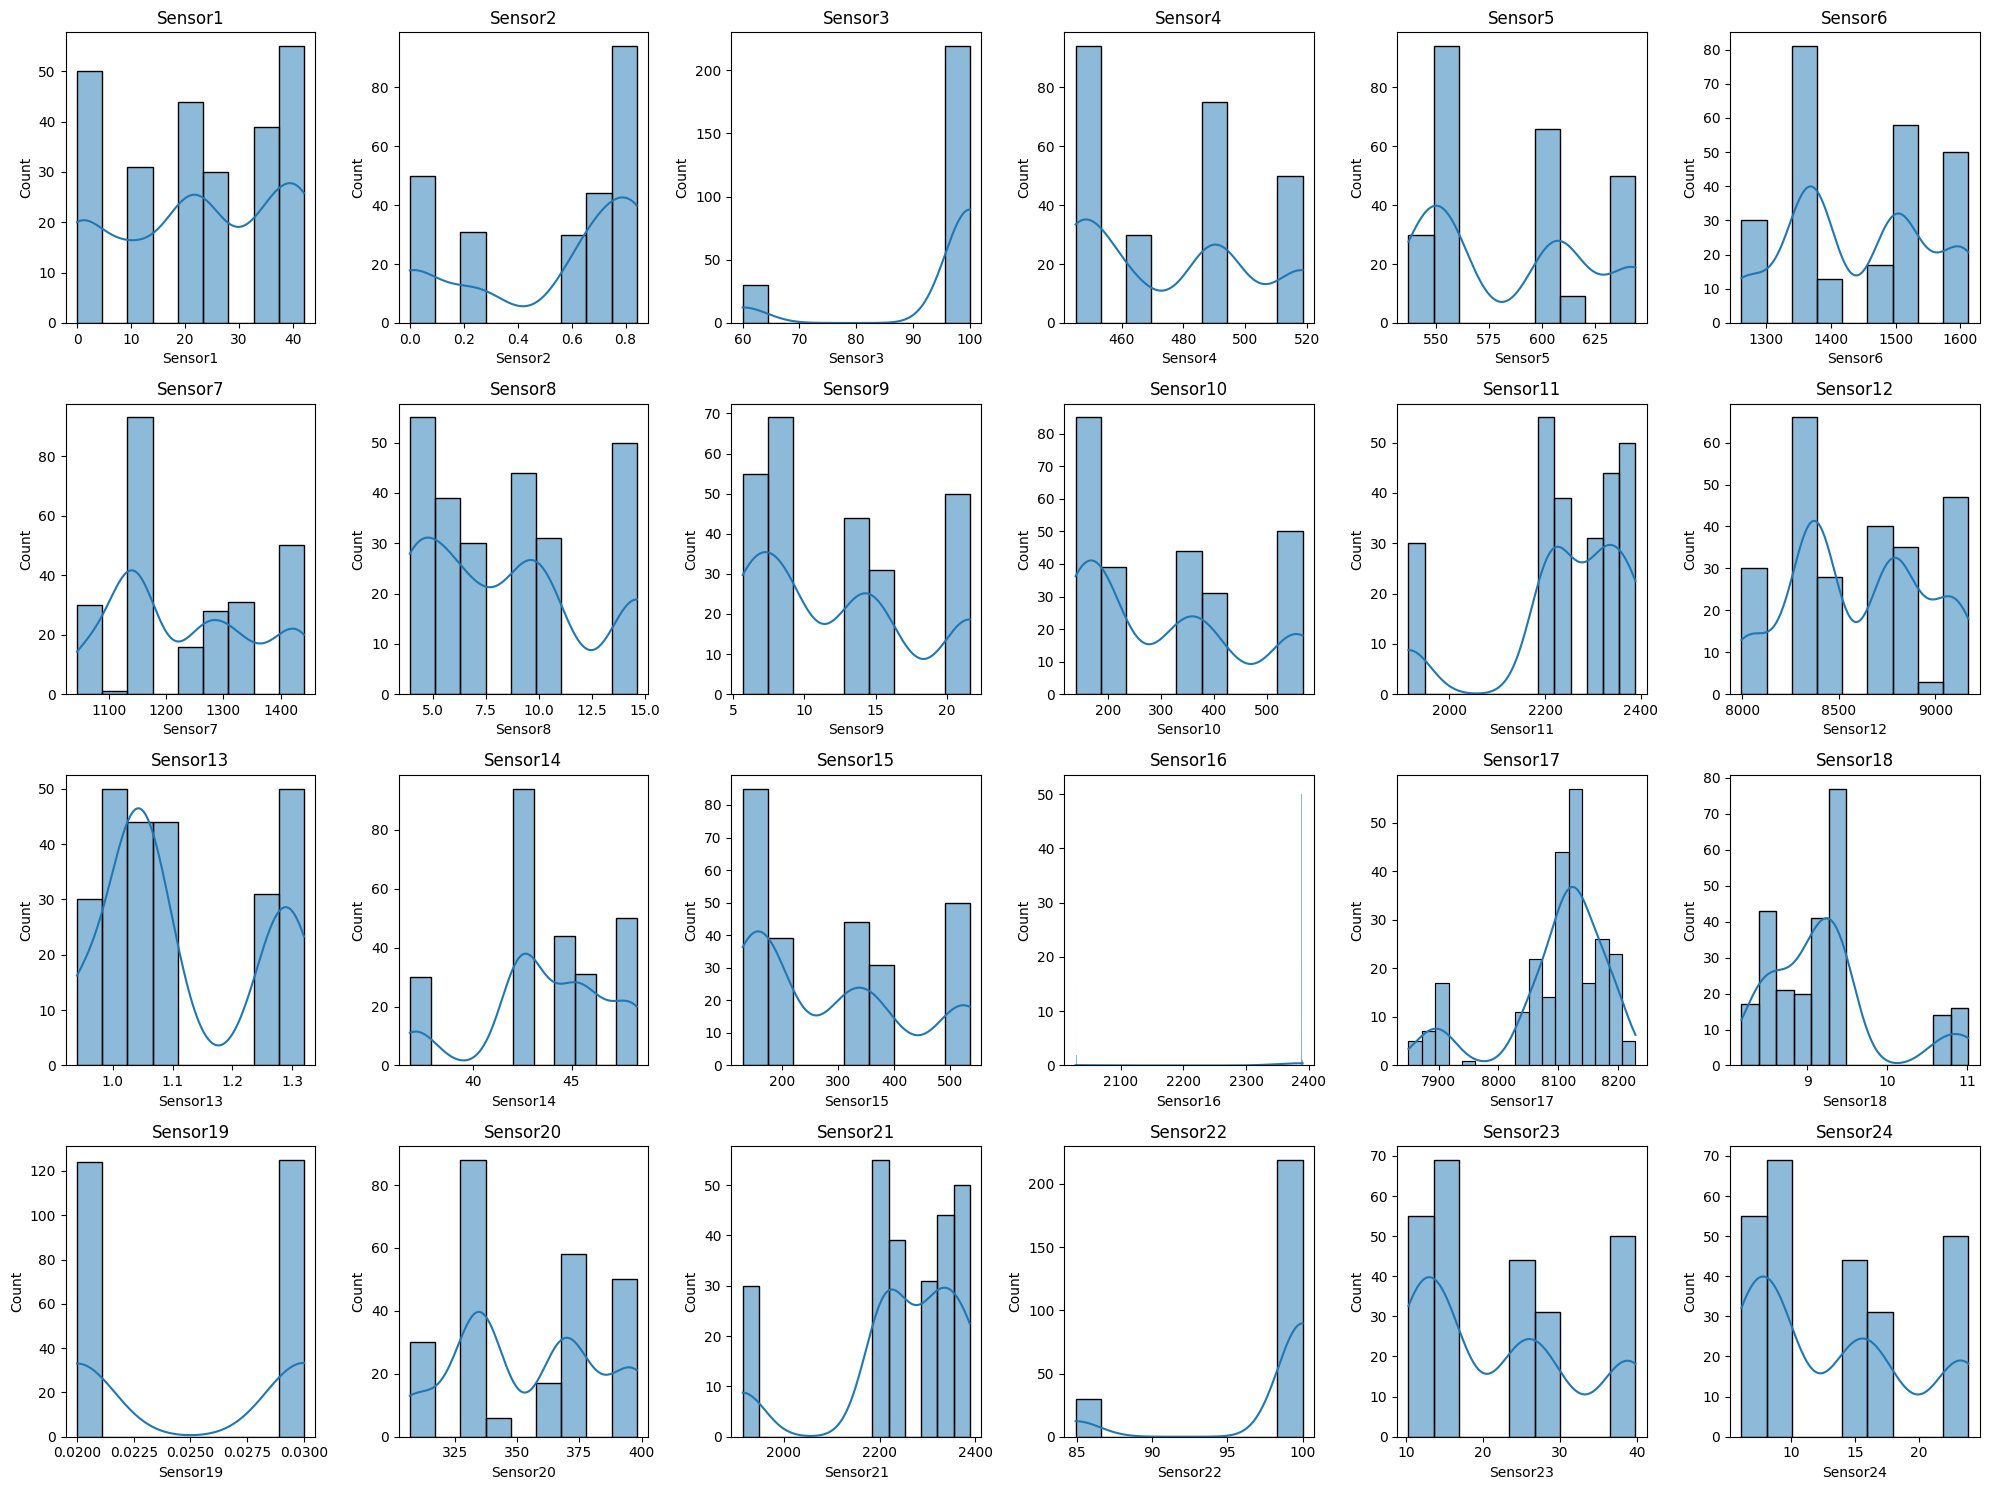

Enter 'c' to continue, 'q' to quit exploring group 6: c
Group: Remaining Cycles = 7, Size = 249
           Engine     Cycles     Sensor1    Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.00000  249.000000  249.000000   
mean   125.000000  238.97992   24.974629    0.58419   94.377510  471.899839   
std     72.024301   73.11080   15.218060    0.31128   13.930778   26.980133   
min      1.000000  121.00000    0.000100    0.00000   60.000000  445.000000   
25%     63.000000  183.00000   10.005200    0.25120  100.000000  445.000000   
50%    125.000000  227.00000   25.001900    0.70000  100.000000  462.540000   
75%    187.000000  283.00000   41.999800    0.84000  100.000000  491.190000   
max    249.000000  536.00000   42.008000    0.84200  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   579.164739  1427.065141  1216.1

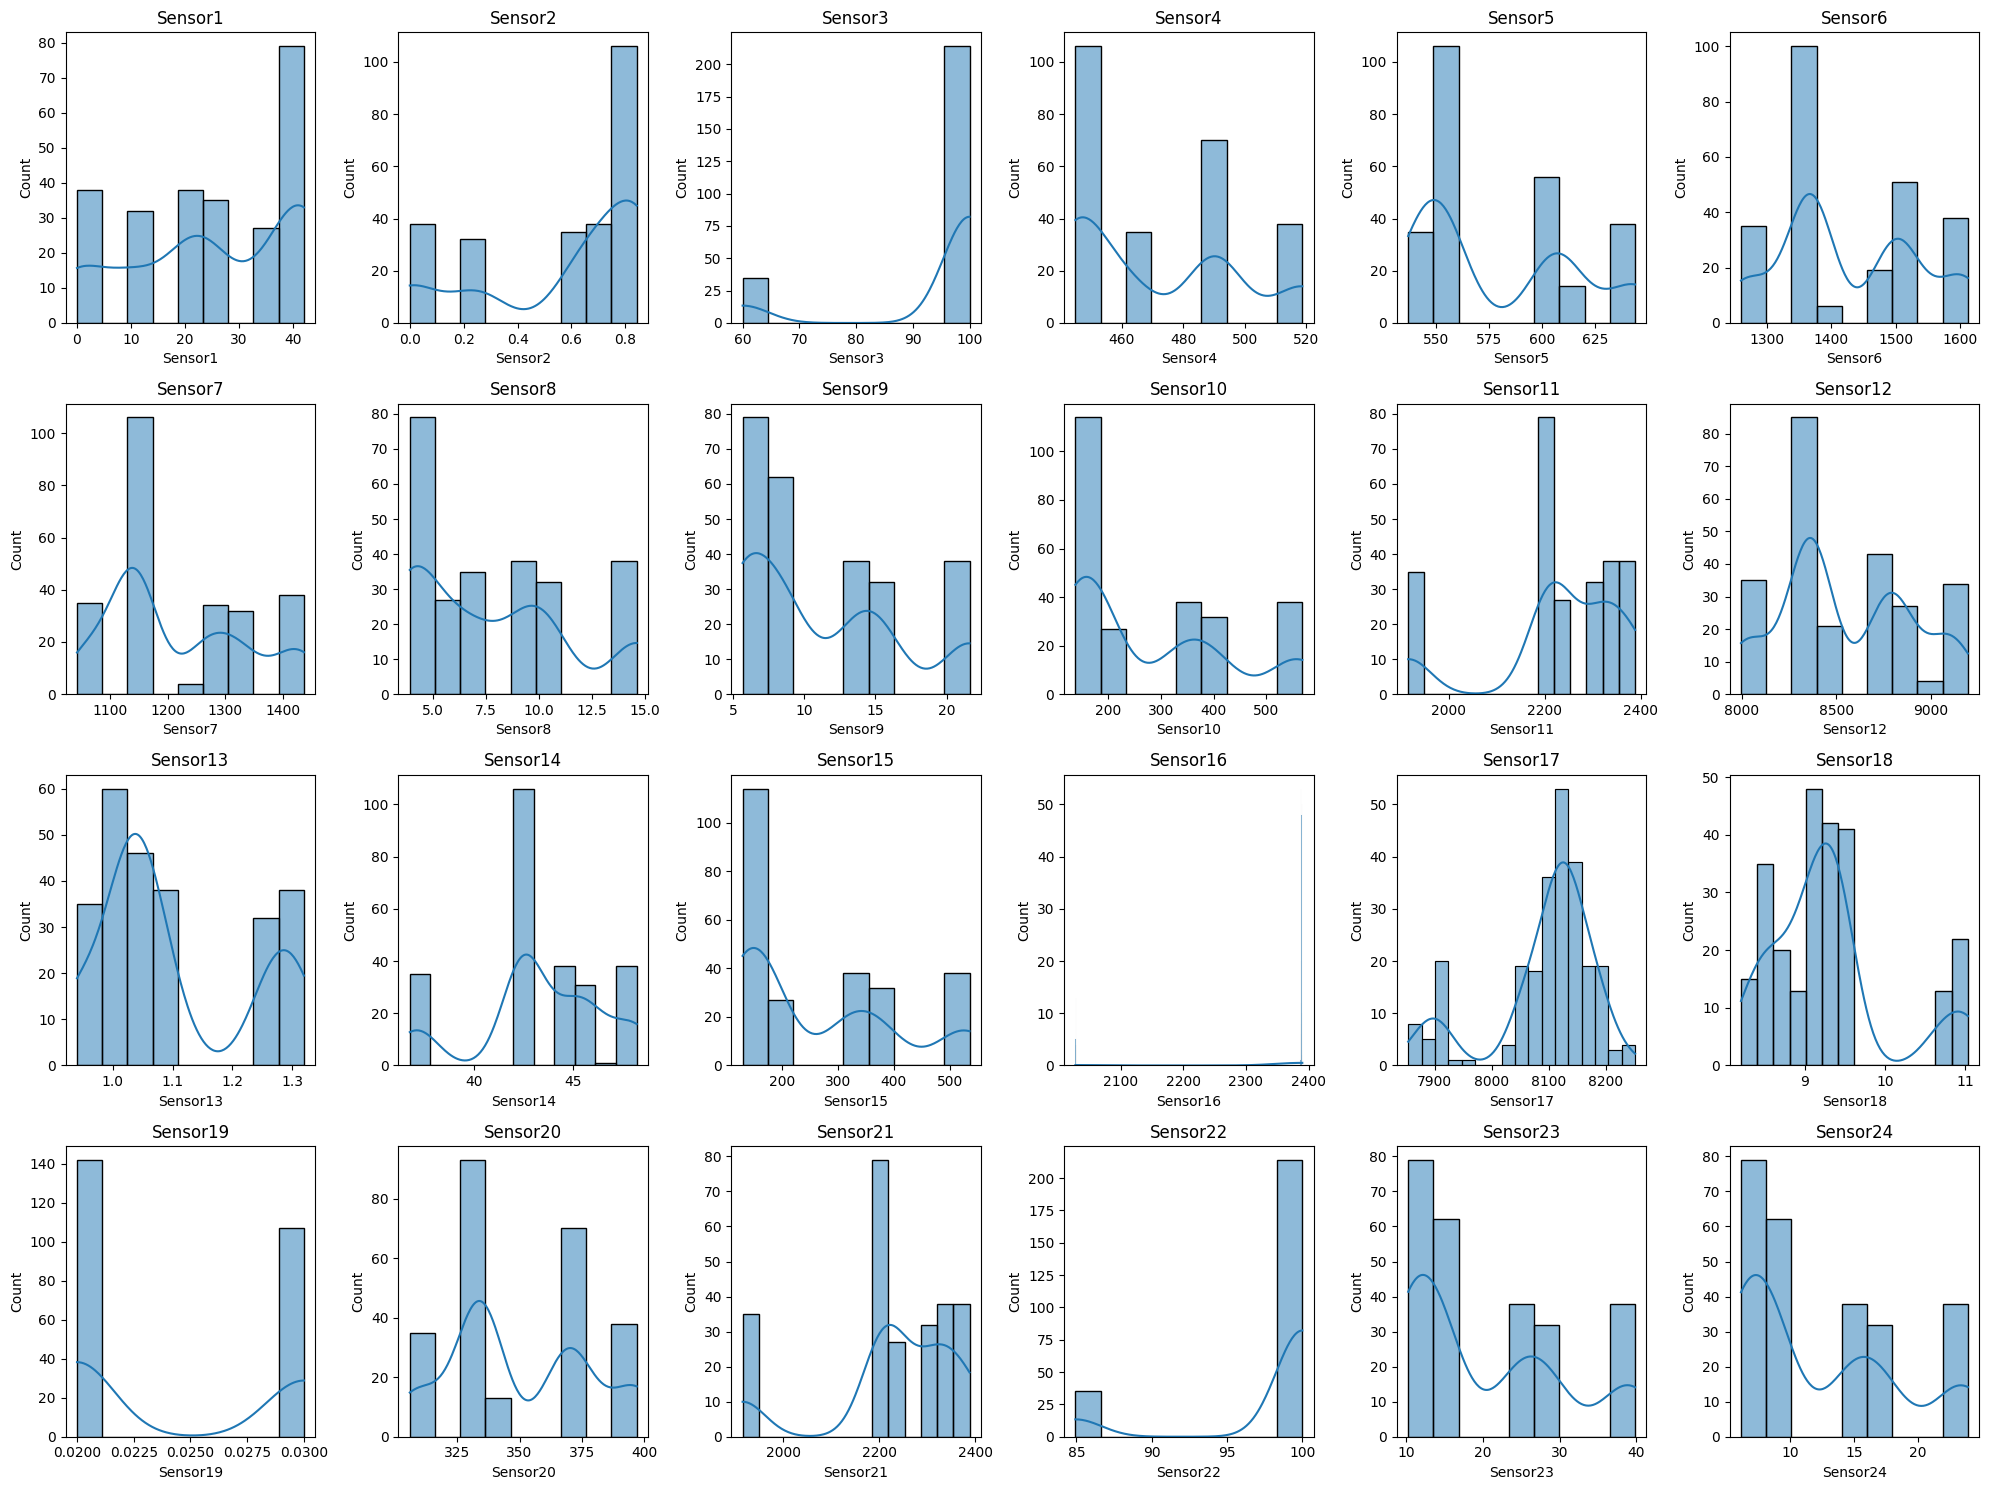

Enter 'c' to continue, 'q' to quit exploring group 7: c
Group: Remaining Cycles = 8, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  237.97992   24.986620    0.584390   94.216867  471.182369   
std     72.024301   73.11080   14.976378    0.308706   14.095339   26.429087   
min      1.000000  120.00000    0.000100    0.000000   60.000000  445.000000   
25%     63.000000  182.00000   10.006000    0.251100  100.000000  445.000000   
50%    125.000000  226.00000   25.002300    0.700000  100.000000  462.540000   
75%    187.000000  282.00000   41.999400    0.840000  100.000000  491.190000   
max    249.000000  535.00000   42.007800    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   578.107631  1424.09461

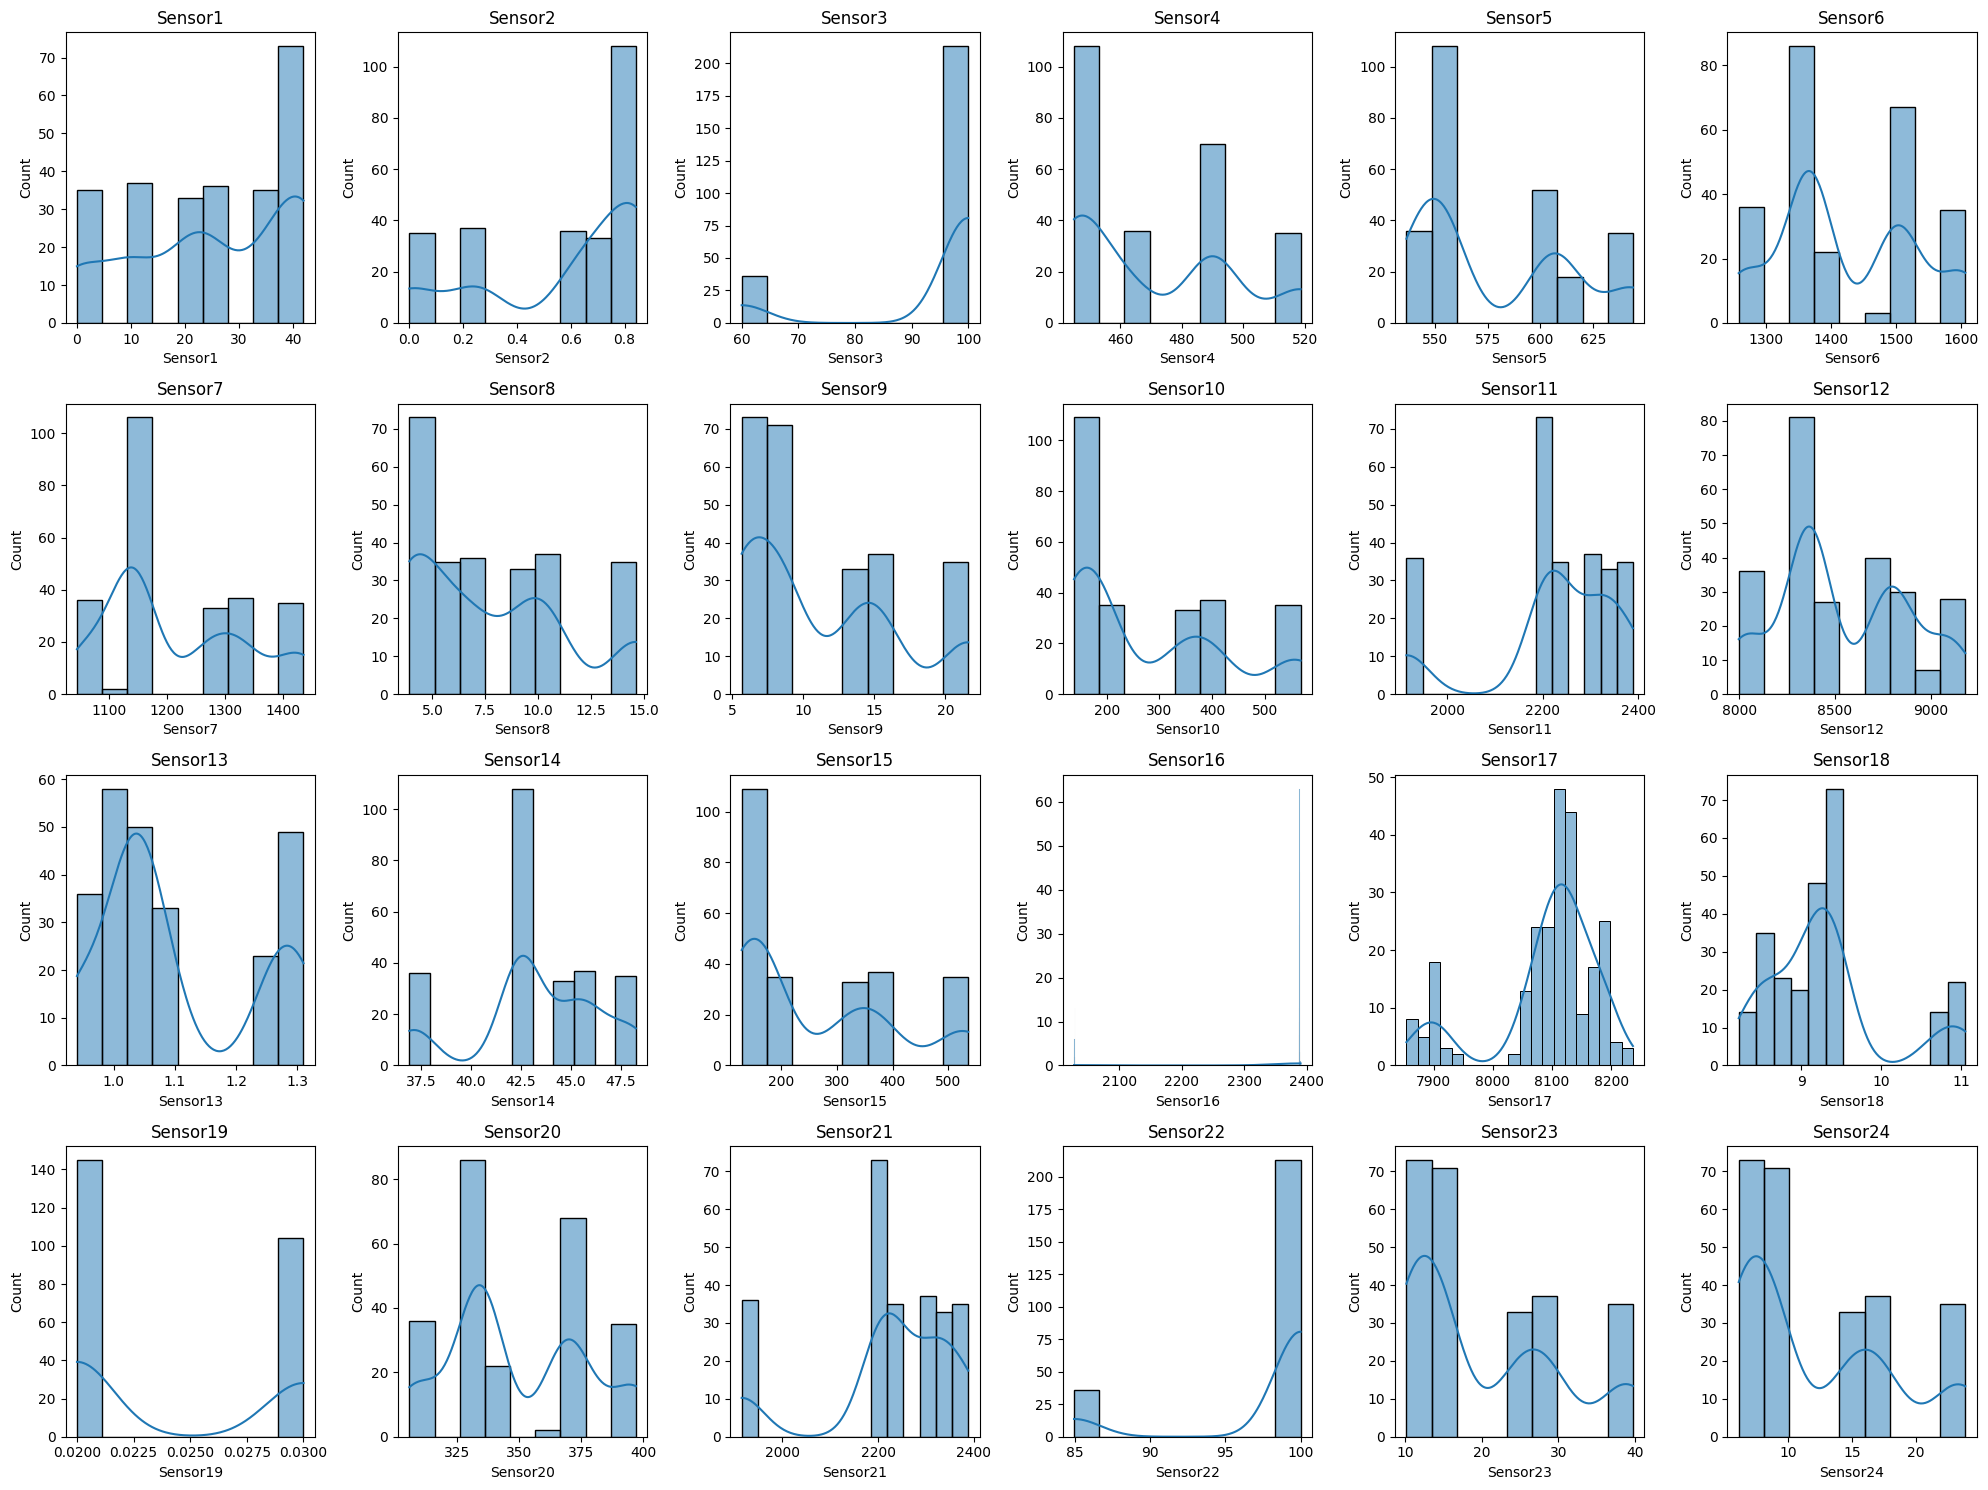

Enter 'c' to continue, 'q' to quit exploring group 8: c
Group: Remaining Cycles = 9, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  236.97992   25.111352    0.591088   94.538153  470.637309   
std     72.024301   73.11080   14.707890    0.306518   13.762368   26.090261   
min      1.000000  119.00000    0.000000    0.000000   60.000000  445.000000   
25%     63.000000  181.00000   10.005700    0.251100  100.000000  445.000000   
50%    125.000000  225.00000   25.005300    0.700800  100.000000  462.540000   
75%    187.000000  281.00000   41.999000    0.840000  100.000000  491.190000   
max    249.000000  534.00000   42.007800    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   577.733976  1422.94967

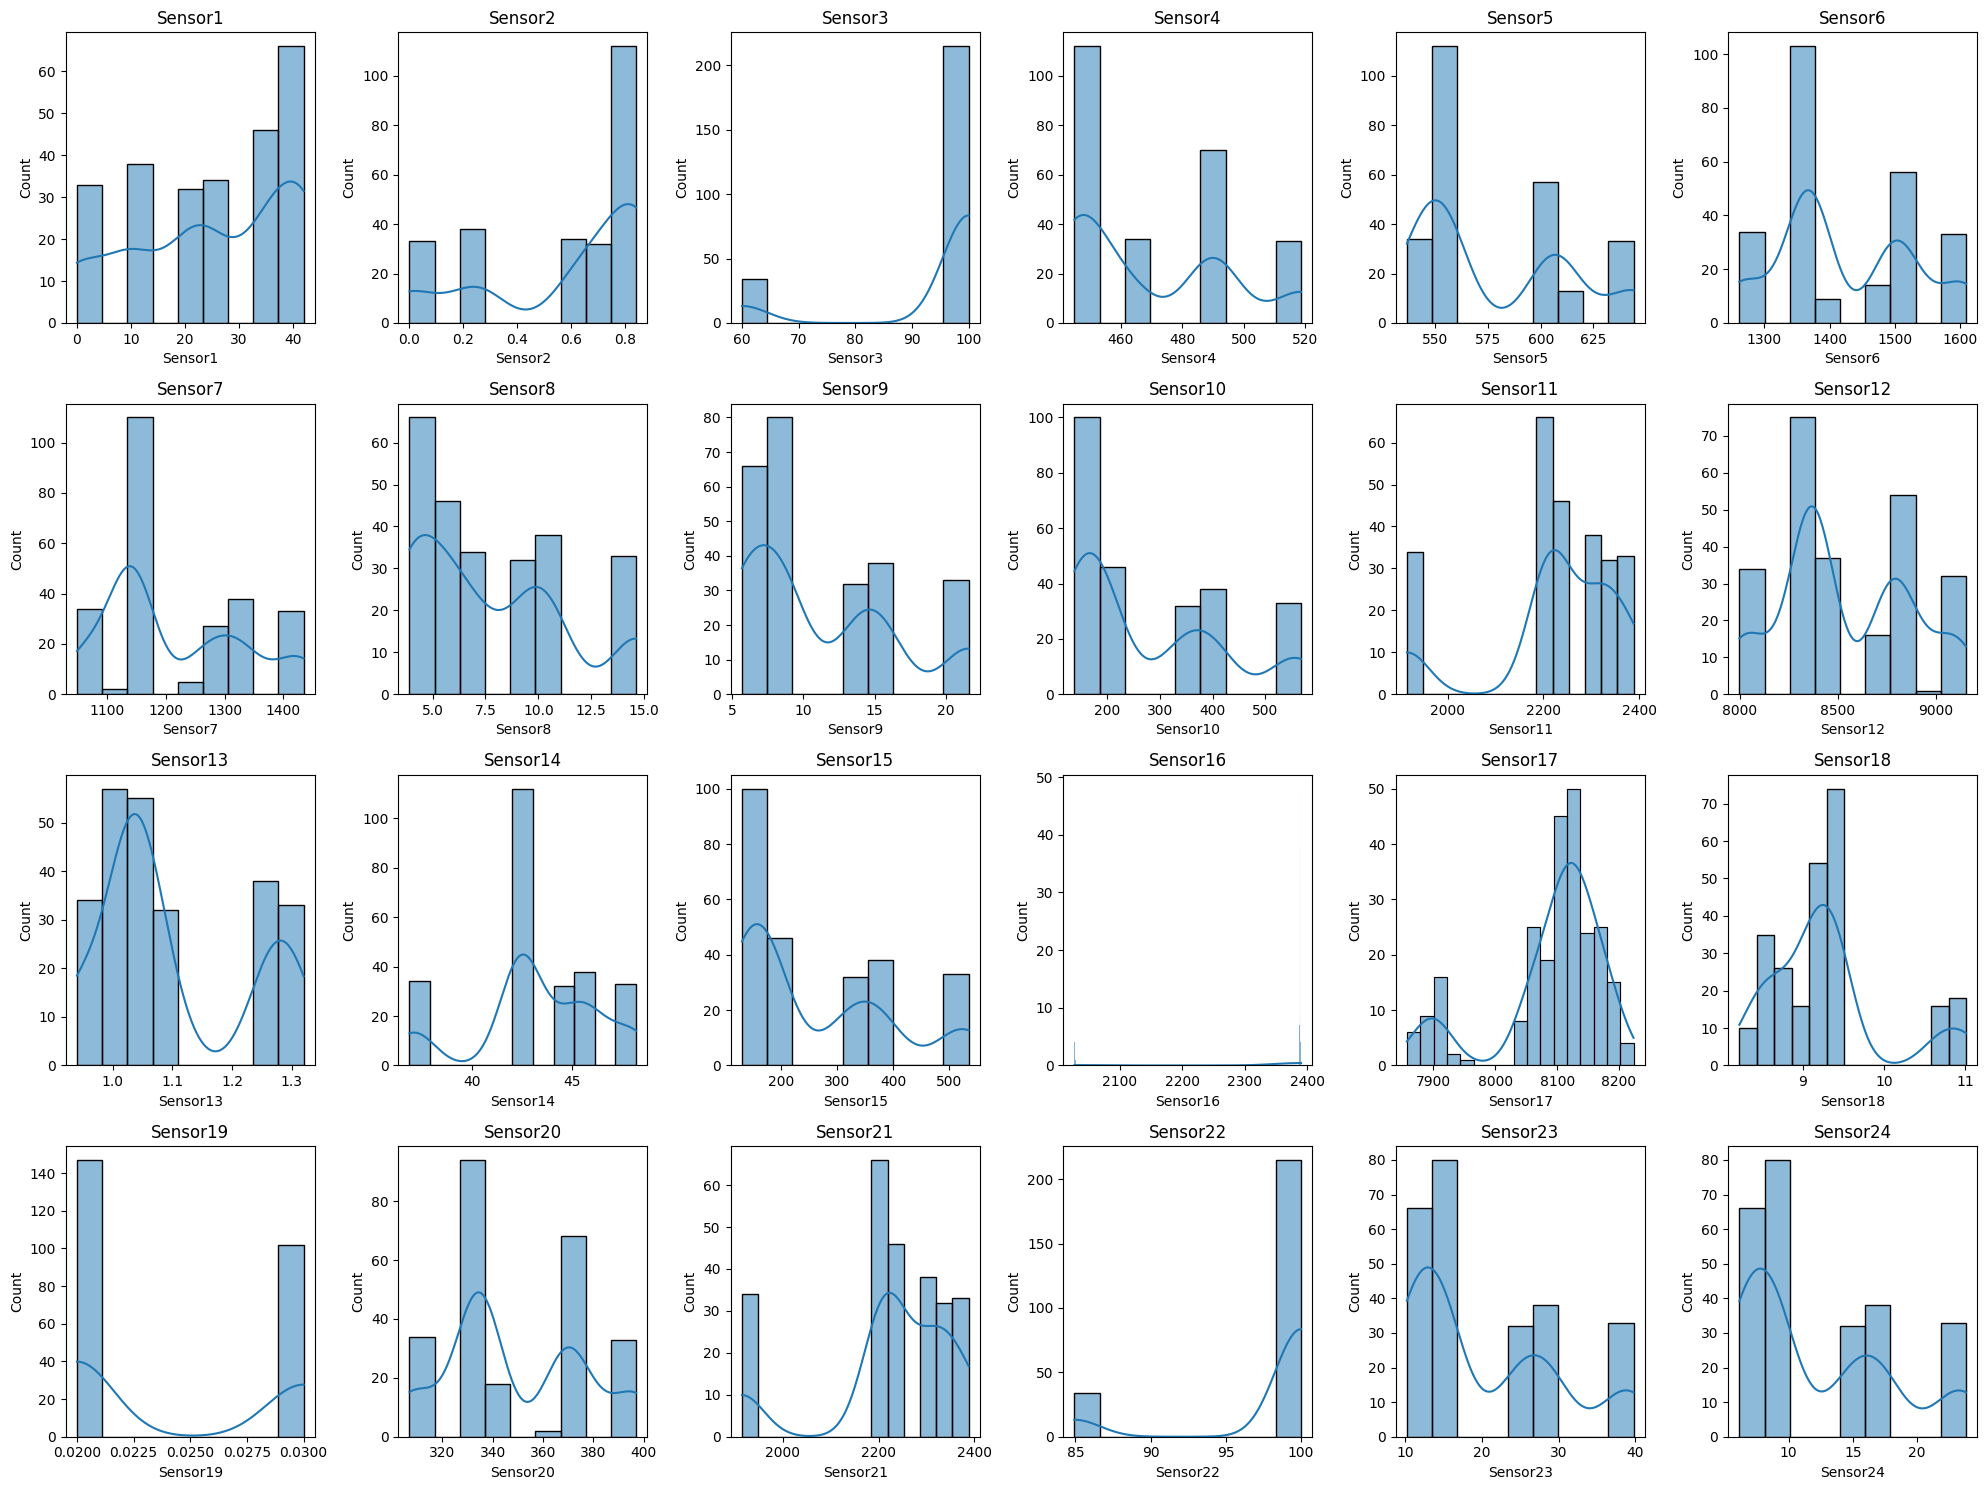

Enter 'c' to continue, 'q' to quit exploring group 9: c
Group: Remaining Cycles = 10, Size = 249
           Engine     Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  249.000000  249.00000  249.000000  249.000000  249.000000  249.000000   
mean   125.000000  235.97992   24.938517    0.574587   93.574297  470.981888   
std     72.024301   73.11080   15.303181    0.314557   14.717621   26.815540   
min      1.000000  118.00000    0.000200    0.000000   60.000000  445.000000   
25%     63.000000  180.00000   10.006200    0.250700  100.000000  445.000000   
50%    125.000000  224.00000   25.004500    0.700000  100.000000  462.540000   
75%    187.000000  280.00000   41.999700    0.840000  100.000000  491.190000   
max    249.000000  533.00000   42.007900    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  249.000000   249.000000   249.000000  249.000000  ...   249.000000   
mean   577.283012  1420.9193

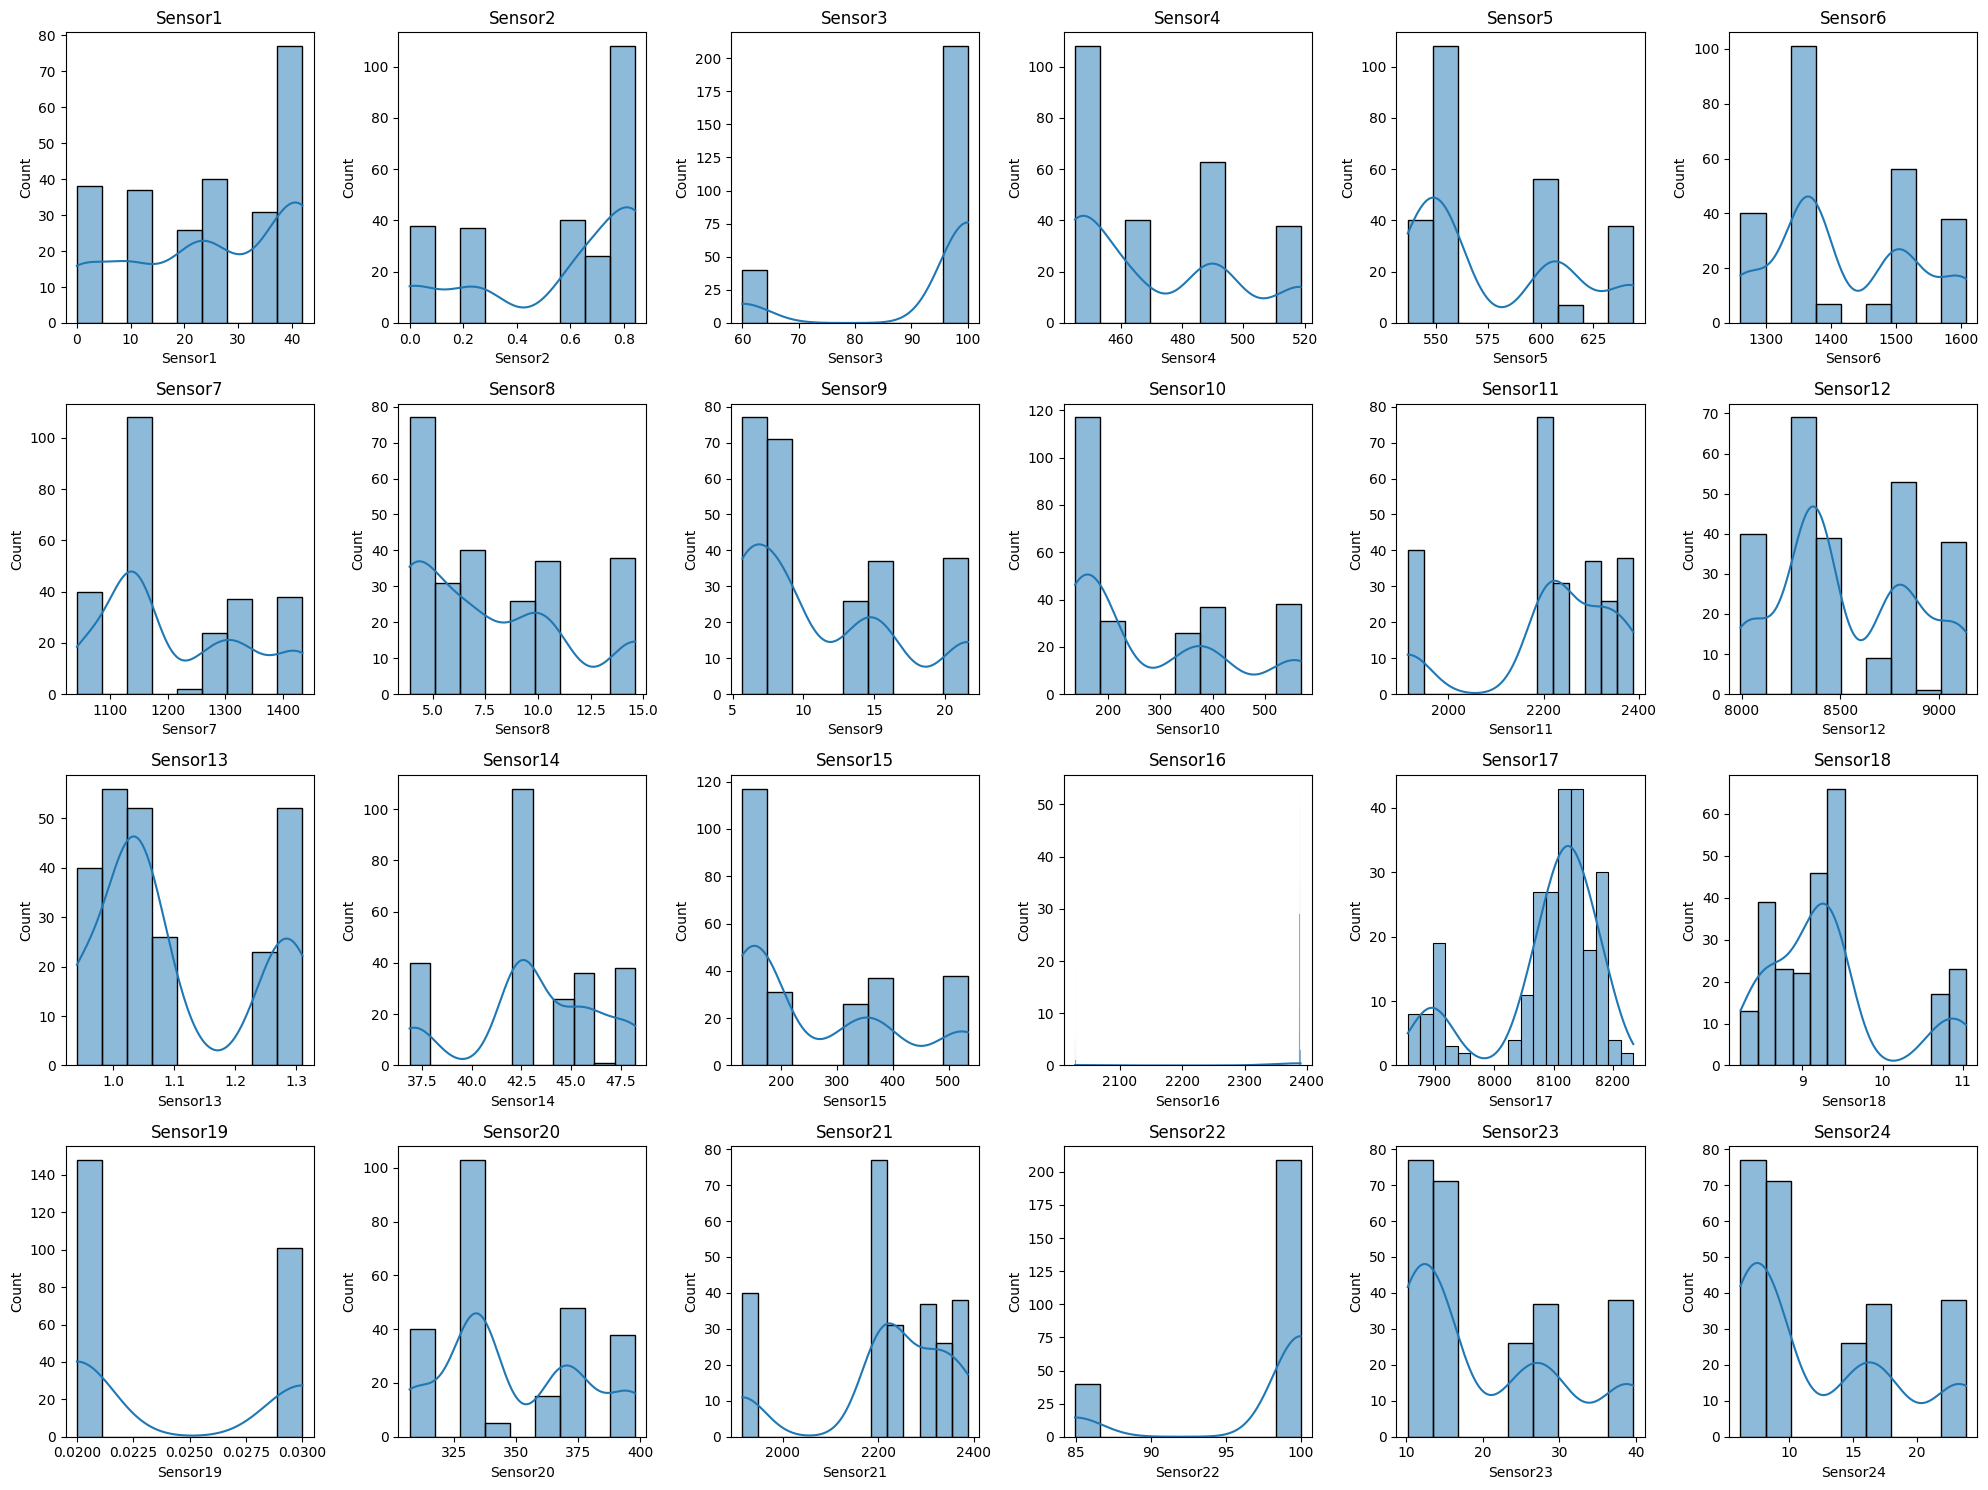

Enter 'c' to continue, 'q' to quit exploring group 10: q


In [17]:
# Group data by Remaining Cycles & explore sensor distributions
remaining_cycles_groups = data.groupby('Remaining Cycles')

# Threshold for selecting groups
threshold = 10 

# Filter groups based on the threshold
selected_groups = [(group_name, group_data) for group_name, group_data in remaining_cycles_groups if len(group_data) >= threshold]

# Explore the selected groups
for group_name, group_data in selected_groups:
    print(f"Group: Remaining Cycles = {group_name}, Size = {len(group_data)}")
    print(group_data.describe())

    plt.figure(figsize=(20, 15))
    for i, col in enumerate(group_data.columns[2:-1]):
        plt.subplot(4, 6, i+1)
        sns.histplot(group_data[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

    user_input = input(f"Enter 'c' to continue, 'q' to quit exploring group {group_name}: ")
    if user_input.lower() == 'q':
        break